In [65]:
!pip install yfinance

In [66]:
# Data and computation
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# Yahoo Finance data import
import yfinance as yf

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV

# Misc
import warnings
warnings.filterwarnings('ignore')


In [86]:
# Select stocks and date range
symbols = ['ADANIENT.NS',
           'ADANIPORTS.NS', 'APOLLOHOSP.NS', 'ASIANPAINT.NS',
           'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BEL.NS', 'BHARTIARTL.NS', 'CIPLA.NS',
           'COALINDIA.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFCBANK.NS',
           'HDFCLIFE.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS',
           'INFY.NS', 'ITC.NS', 'JIOFIN.NS', 'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LT.NS', 'M&M.NS', 'MARUTI.NS',
           'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS', 'RELIANCE.NS', 'SBILIFE.NS', 'SHRIRAMFIN.NS',
           'SBIN.NS', 'SUNPHARMA.NS', 'TATACONSUM.NS', 'TCS.NS',
           'TATAMOTORS.NS', 'TATASTEEL.NS', 'TECHM.NS',
           'TITAN.NS', 'TRENT.NS', 'ULTRACEMCO.NS',
           'WIPRO.NS',
           'ETERNAL.NS']

start_date = '2024-07-31'
end_date = '2025-07-31'

# Download daily close data for both stocks
raw_data = yf.download(symbols, start=start_date, end=end_date)

# Flatten MultiIndex columns
raw_data.columns = ['_'.join(col).strip() for col in raw_data.columns.values]

# For simplicity, stack to long format and process each stock similarly
data = raw_data.copy()


[*********************100%***********************]  50 of 50 completed


In [87]:
data

Close_ADANIENT.NS  Close_ADANIPORTS.NS  Close_APOLLOHOSP.NS  \
Date                                                                      
2024-07-31        3167.780273          1562.299194          6595.818359   
2024-08-01        3215.605713          1582.451172          6686.649902   
2024-08-02        3159.284424          1580.311523          6690.389160   
2024-08-05        3036.647217          1486.617310          6667.905273   
2024-08-06        3071.129639          1486.866089          6638.093750   
...                       ...                  ...                  ...   
2025-07-24        2608.399902          1411.599976          7363.500000   
2025-07-25        2550.100098          1396.300049          7468.500000   
2025-07-28        2522.300049          1376.000000          7356.500000   
2025-07-29        2547.899902          1395.900024          7456.000000   
2025-07-30        2532.899902          1394.000000          7450.000000   

            Close_ASIANPAINT.NS  Close_AXISBANK.NS  Close_BAJAJ-AUTO.NS  \
Date                                                                      
2024-07-31          3051.022705        1165.104248          9425.325195   
2024-08-01          3065.761230        1171.299072          9489.986328   
2024-08-02          3073.031494        1159.858765          9378.511719   
2024-08-05          3059.875732        1132.532104          9250.602539   
2024-08-06          3068.135254        1125.138428          9194.378906   
...                         ...                ...                  ...   
2025-07-24          2352.100098        1095.099976          8288.500000   
2025-07-25          2336.199951        1086.099976          8075.500000   
2025-07-28          2359.600098        1073.599976          8089.500000   
2025-07-29          2401.500000        1064.199951          8127.500000   
2025-07-30          2415.800049        1073.300049          8043.500000   

            Close_BAJAJFINSV.NS  Close_BAJFINANCE.NS  Close_BEL.NS  \
Date                                                                 
2024-07-31          1650.845703           677.440918    313.460114   
2024-08-01          1634.003906           673.927795    308.600281   
2024-08-02          1622.659424           669.285095    300.467499   
2024-08-05          1566.936523           656.516418    287.871552   
2024-08-06          1563.338257           650.709351    284.896118   
...                         ...                  ...           ...   
2025-07-24          2032.300049           958.950012    398.250000   
2025-07-25          1985.800049           913.750000    395.200012   
2025-07-28          1977.800049           880.500000    389.250000   
2025-07-29          1972.599976           886.549988    388.250000   
2025-07-30          1959.800049           884.849976    386.500000   

            Close_BHARTIARTL.NS  ...  Volume_SUNPHARMA.NS  \
Date                             ...                        
2024-07-31          1470.986816  ...              1594881   
2024-08-01          1484.744263  ...              5258291   
2024-08-02          1473.205688  ...              2992406   
2024-08-05          1445.492920  ...              5165558   
2024-08-06          1423.648438  ...              1710278   
...                         ...  ...                  ...   
2025-07-24          1936.099976  ...              1079045   
2025-07-25          1937.900024  ...              1088592   
2025-07-28          1890.300049  ...              2168507   
2025-07-29          1918.300049  ...              1325544   
2025-07-30          1932.599976  ...              2318723   

            Volume_TATACONSUM.NS  Volume_TATAMOTORS.NS  Volume_TATASTEEL.NS  \
Date                                                                          
2024-07-31               2994289              10860623             52769925   
2024-08-01               1675363              14375948            118341338   
2024-08-02               1262150       

In [89]:
# Helper functions

def SMA(series, period):
    return series.rolling(window=period).mean()

def EMA(series, period):
    return series.ewm(span=period, adjust=False).mean()

def MACD(series, fast=12, slow=26, signal=9):
    ema_fast = EMA(series, fast)
    ema_slow = EMA(series, slow)
    macd = ema_fast - ema_slow
    macd_signal = EMA(macd, signal)
    macd_hist = macd - macd_signal
    return macd, macd_signal, macd_hist

def RSI(series, period=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).ewm(alpha=1/period, min_periods=period).mean()
    loss = (-delta.where(delta < 0, 0)).ewm(alpha=1/period, min_periods=period).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))

def create_volatility_features(df):

    # Calculate returns if not exists
    if 'return_1d' not in df.columns:
        df['return_1d'] = df['Close'].pct_change()

    # Volatility features (crucial for logistic regression)
    for period in [5, 10, 20, 30]:
        df[f'volatility_{period}d'] = df['return_1d'].rolling(period).std()

    # Volatility ratios
    df['vol_ratio_5_20'] = df['volatility_5d'] / df['volatility_20d']
    df['vol_ratio_10_20'] = df['volatility_10d'] / df['volatility_20d']

    # Volatility rank (where current vol sits in historical range)
    df['vol_rank_20'] = df['volatility_5d'].rolling(20).rank(pct=True)
    df['vol_rank_50'] = df['volatility_5d'].rolling(50).rank(pct=True)

    return df

def create_enhanced_lag_features(df):
    """Add comprehensive lag features - Critical for time series"""
    #print("Adding enhanced lag features...")

    # Price momentum lags
    for lag in [1, 2, 3, 5, 10]:
        df[f'return_lag_{lag}'] = df['return_1d'].shift(lag)

    # Technical indicator lags
    for lag in [1, 2, 3]:
        if 'RSI14' in df.columns:
            df[f'rsi_lag_{lag}'] = df['RSI14'].shift(lag)
        if 'MACD' in df.columns:
            df[f'macd_lag_{lag}'] = df['MACD'].shift(lag)

    # Volume lags
    if 'volume_ratio_20' in df.columns:
        for lag in [1, 2]:
            df[f'volume_ratio_lag_{lag}'] = df['volume_ratio_20'].shift(lag)

    return df

def create_volume_features(df):
    """Enhanced volume features"""
    #print("Adding volume features...")

    # Volume moving averages
    df['volume_sma_10'] = df['Volume'].rolling(10).mean()
    df['volume_sma_20'] = df['Volume'].rolling(20).mean()
    df['volume_sma_50'] = df['Volume'].rolling(50).mean()

    # Volume ratios
    df['volume_ratio_10'] = df['Volume'] / df['volume_sma_10']
    df['volume_ratio_20'] = df['Volume'] / df['volume_sma_20']
    df['volume_ratio_50'] = df['Volume'] / df['volume_sma_50']

    # Price-volume features
    df['price_volume'] = df['Close'] * df['Volume']
    df['pv_sma_5'] = df['price_volume'].rolling(5).mean()

    # Volume momentum
    df['volume_momentum_5'] = df['Volume'] / df['Volume'].shift(5)

    return df

def create_momentum_features(df):
    """Add momentum features"""
    #print("Adding momentum features...")

    # Price momentum
    for period in [3, 5, 10, 20]:
        df[f'momentum_{period}d'] = df['Close'] / df['Close'].shift(period) - 1

    # Rate of change
    for period in [5, 10]:
        df[f'roc_{period}d'] = (df['Close'] - df['Close'].shift(period)) / df['Close'].shift(period)

    return df

def create_position_features(df):
    """Add price position features"""
    #print("Adding position features...")

    # Price position in recent range
    for period in [10, 20, 50]:
        df[f'high_{period}d'] = df['High'].rolling(period).max()
        df[f'low_{period}d'] = df['Low'].rolling(period).min()
        df[f'price_position_{period}'] = (df['Close'] - df[f'low_{period}d']) / (df[f'high_{period}d'] - df[f'low_{period}d'])

    # Bollinger Band position (if BB exists)
    if 'SMA20' in df.columns:
        bb_std = df['Close'].rolling(20).std()
        df['bb_upper'] = df['SMA20'] + (bb_std * 2)
        df['bb_lower'] = df['SMA20'] - (bb_std * 2)
        df['bb_position'] = (df['Close'] - df['bb_lower']) / (df['bb_upper'] - df['bb_lower'])

    return df

def create_rolling_stats(df):
    """Add rolling statistical features"""
    #print("Adding rolling statistics...")

    # Rolling statistics of returns
    for period in [5, 10]:
        df[f'return_mean_{period}d'] = df['return_1d'].rolling(period).mean()
        df[f'return_std_{period}d'] = df['return_1d'].rolling(period).std()
        df[f'return_skew_{period}d'] = df['return_1d'].rolling(period).skew()
        df[f'return_kurt_{period}d'] = df['return_1d'].rolling(period).kurt()

    # Rolling statistics of RSI
    if 'RSI14' in df.columns:
        df['rsi_mean_5d'] = df['RSI14'].rolling(5).mean()
        df['rsi_std_5d'] = df['RSI14'].rolling(5).std()

    return df

# Process each stock separately and then concatenate for ML
all_ml_data = []

for ticker in symbols:
    df = pd.DataFrame({
        'Open': data[f'Open_{ticker}'],
        'High': data[f'High_{ticker}'],
        'Low': data[f'Low_{ticker}'],
        'Close': data[f'Close_{ticker}'],
        'Volume': data[f'Volume_{ticker}']
    })

    df['SMA20']  = SMA(df['Close'], 20)
    df['SMA50']  = SMA(df['Close'], 50)
    df['EMA20']  = EMA(df['Close'], 20)
    df['EMA50']  = EMA(df['Close'], 50)
    df['RSI14']  = RSI(df['Close'], 14)
    df['RSI20']  = RSI(df['Close'], 20)
    df['MACD'], df['MACD_signal'], df['MACD_hist'] = MACD(df['Close'])
    df = create_volatility_features(df)
    df = create_enhanced_lag_features(df)
    df = create_volume_features(df)
    df = create_momentum_features(df)
    df = create_position_features(df)

    # Feature: SMA 20 above SMA 50 (bullish crossover)
    df['SMA_crossover'] = (df['SMA20'] > df['SMA50']).astype(int)
    # Feature: RSI oversold signal
    df['RSI_oversold'] = (df['RSI14'] < 30).astype(int)
    # Target: next-day up/down
    df['next_close'] = df['Close'].shift(-1)
    df['target'] = (df['next_close'] > df['Close']).astype(int)

    df['ticker'] = ticker

    # Drop rows with NaN (from indicator calculations)
    df = df.dropna().copy()
    all_ml_data.append(df)

# Concatenate all stocks
ml_data = pd.concat(all_ml_data)
ml_data.reset_index(inplace=True)


In [90]:
ml_data

Date         Open         High          Low        Close  \
0    2024-10-17  3088.370723  3098.415636  2991.470322  3012.209717   
1    2024-10-18  2988.471953  3030.150593  2966.583243  3000.465820   
2    2024-10-21  3003.614187  3013.409228  2915.459309  2936.148682   
3    2024-10-22  2936.498522  2953.489834  2816.559849  2822.356934   
4    2024-10-23  2839.398170  2877.528574  2818.658775  2834.100830   
...         ...          ...          ...          ...          ...   
9511 2025-07-23   298.000000   303.549988   296.299988   302.049988   
9512 2025-07-24   302.250000   314.450012   302.000000   313.149994   
9513 2025-07-25   309.950012   314.149994   306.299988   310.549988   
9514 2025-07-28   310.000000   312.250000   306.600006   307.299988   
9515 2025-07-29   305.000000   307.200012   300.000000   306.549988   

           Volume        SMA20        SMA50        EMA20        EMA50  ...  \
0       2655289.0  3095.689612  3066.288169  3087.489558  3084.215362  ...   
1        796339.0  3098.630615  3062.611050  3079.201583  3080.931066  ...   
2       1051690.0  3095.089929  3058.015400  3065.577497  3075.253325  ...   
3       1209732.0  3084.088062  3050.744116  3042.413634  3065.335820  ...   
4       1270530.0  3071.177161  3044.423345  3022.574319  3056.267781  ...   
...           ...          ...          ...          ...          ...  ...   
9511   68915200.0   266.839499   253.255998   268.374510   255.534279  ...   
9512  120603700.0   269.237999   254.667198   272.638842   257.793719  ...   
9513   50941170.0   271.672499   255.962998   276.249427   259.862592  ...   
9514   24882870.0   273.829999   257.348398   279.206623   261.722882  ...   
9515   23521230.0   276.107498   258.913798   281.810753   263.480808  ...   

          low_50d  price_position_50     bb_upper     bb_lower  bb_position  \
0     2888.872932           0.350269  3220.759259  2970.619965     0.166266   
1     2888.872932           0.316917  3210.520174  2986.741056     0.061332   
2     2888.872932           0.143791  3222.586585  2967.593273    -0.123315   
3     2816.559849           0.014758  3259.646581  2908.529542    -0.245424   
4     2816.559849           0.044656  3279.170487  2863.183834    -0.069913   
...           ...                ...          ...          ...          ...   
9511   221.100006           0.897948   291.233903   242.445095     1.221692   
9512   221.100006           0.986074   301.203490   237.272508     1.186866   
9513   221.100006           0.958221   308.342362   235.002637     1.030101   
9514   221.100006           0.923406   313.584133   234.075864     0.920962   
9515   221.100006           0.915372   317.931961   234.283036     0.863932   

      SMA_crossover  RSI_oversold   next_close  target       ticker  
0                 1             0  3000.465820       0  ADANIENT.NS  
1                 1             0  2936.148682       0  ADANIENT.NS  
2                 1             0  2822.356934       0  ADANIENT.NS  
3                 1             1  2834.100830       1  ADANIENT.NS  
4                 1             0  2828.753662       0  ADANIENT.NS  
...             ...           ...          ...     ...          ...  
9511              1             0   313.149994       1   ETERNAL.NS  
9512              1             0   310.549988       0   ETERNAL.NS  
9513              1             0   307.299988       0   ETERNAL.NS  
9514              1             0   306.549988       0   ETERNAL.NS  
9515              1             0   303.450012       0   ETERNAL.NS  

[9516 rows x 67 columns]

In [91]:
ml_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'SMA20', 'SMA50',
       'EMA20', 'EMA50', 'RSI14', 'RSI20', 'MACD', 'MACD_signal', 'MACD_hist',
       'return_1d', 'volatility_5d', 'volatility_10d', 'volatility_20d',
       'volatility_30d', 'vol_ratio_5_20', 'vol_ratio_10_20', 'vol_rank_20',
       'vol_rank_50', 'return_lag_1', 'return_lag_2', 'return_lag_3',
       'return_lag_5', 'return_lag_10', 'rsi_lag_1', 'macd_lag_1', 'rsi_lag_2',
       'macd_lag_2', 'rsi_lag_3', 'macd_lag_3', 'volume_sma_10',
       'volume_sma_20', 'volume_sma_50', 'volume_ratio_10', 'volume_ratio_20',
       'volume_ratio_50', 'price_volume', 'pv_sma_5', 'volume_momentum_5',
       'momentum_3d', 'momentum_5d', 'momentum_10d', 'momentum_20d', 'roc_5d',
       'roc_10d', 'high_10d', 'low_10d', 'price_position_10', 'high_20d',
       'low_20d', 'price_position_20', 'high_50d', 'low_50d',
       'price_position_50', 'bb_upper', 'bb_lower', 'bb_position',
       'SMA_crossover', 'RSI_oversold', 'next

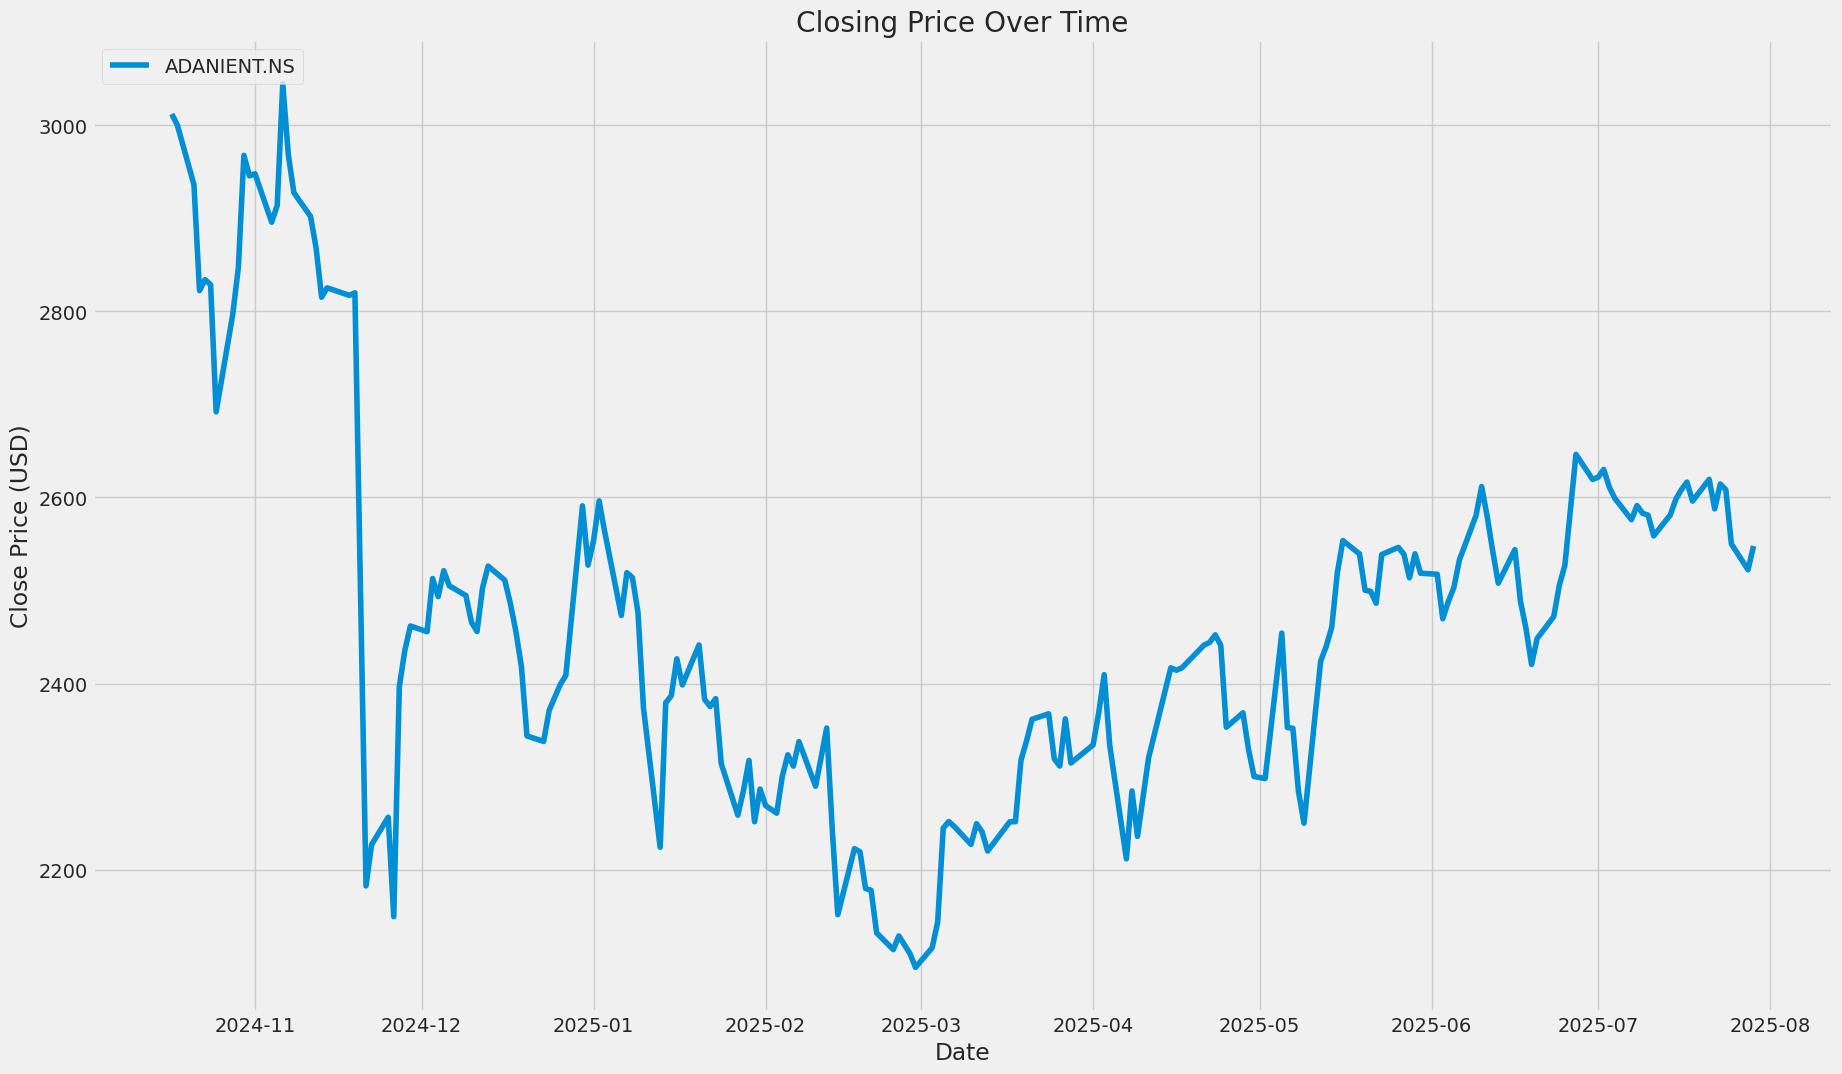

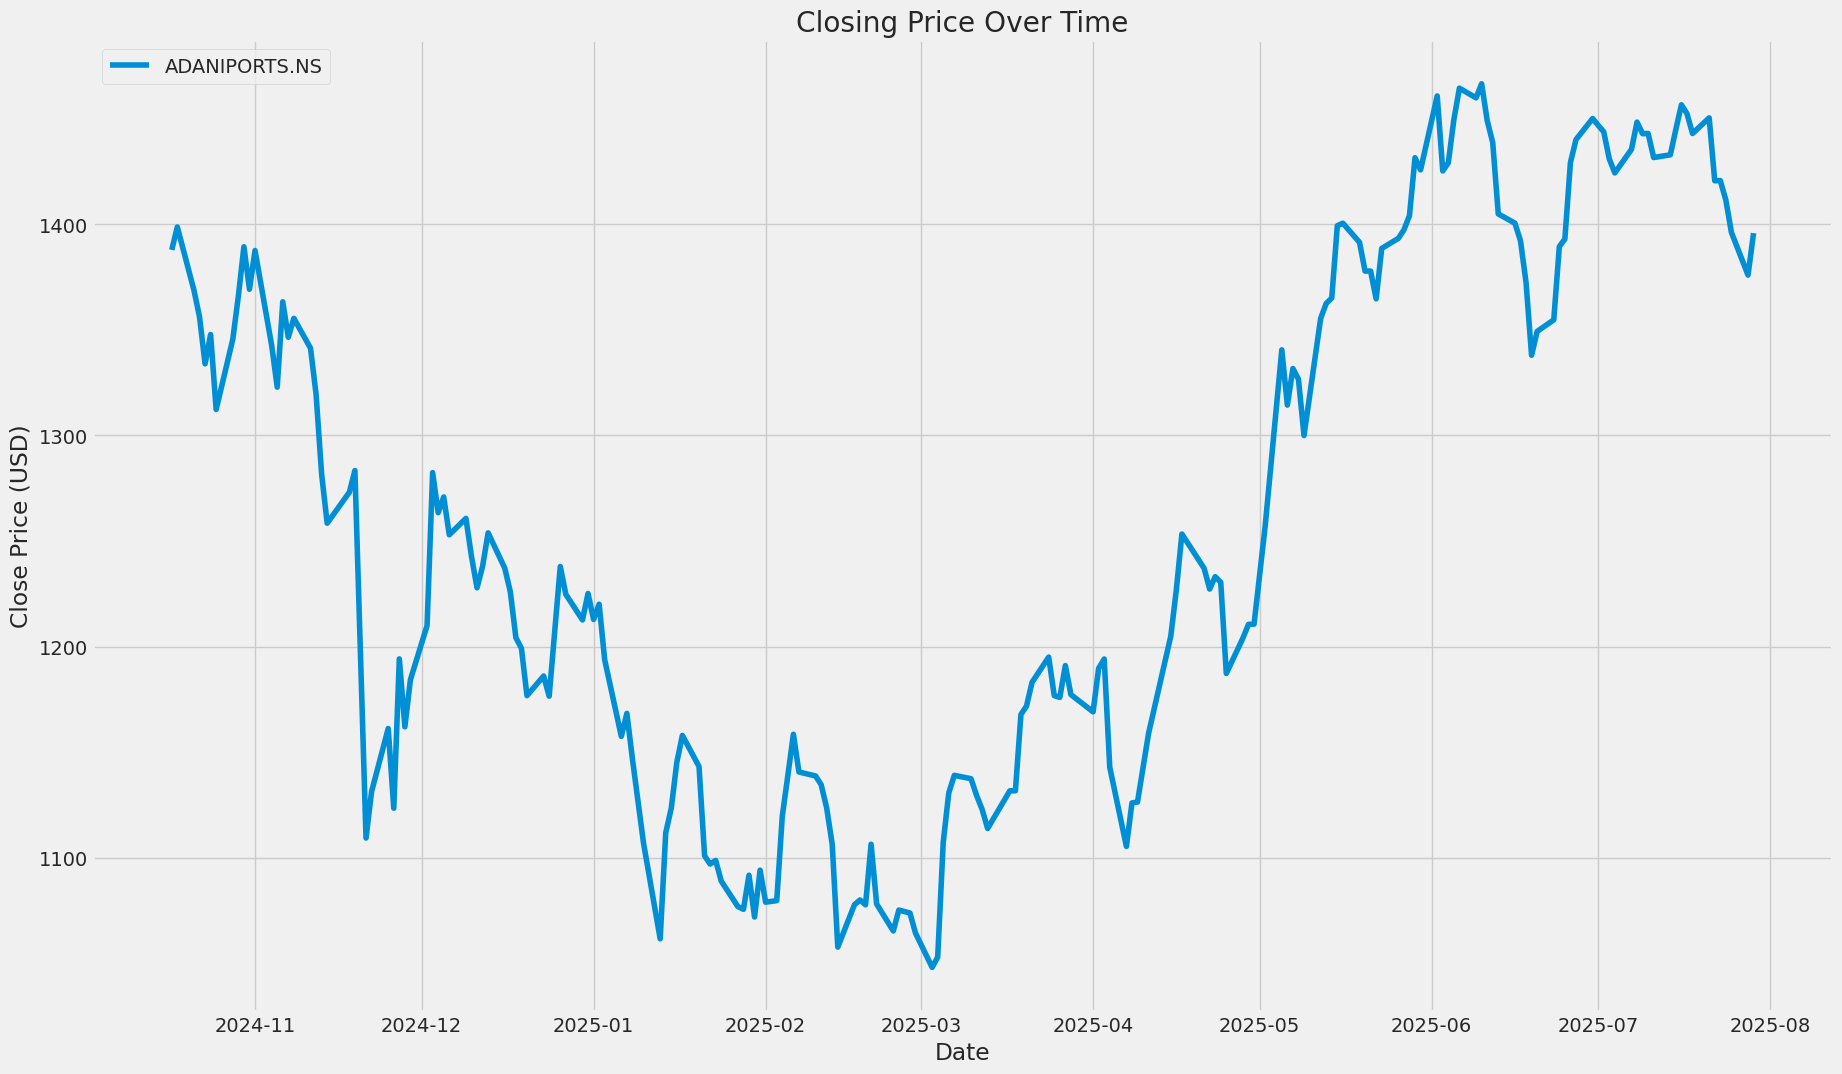

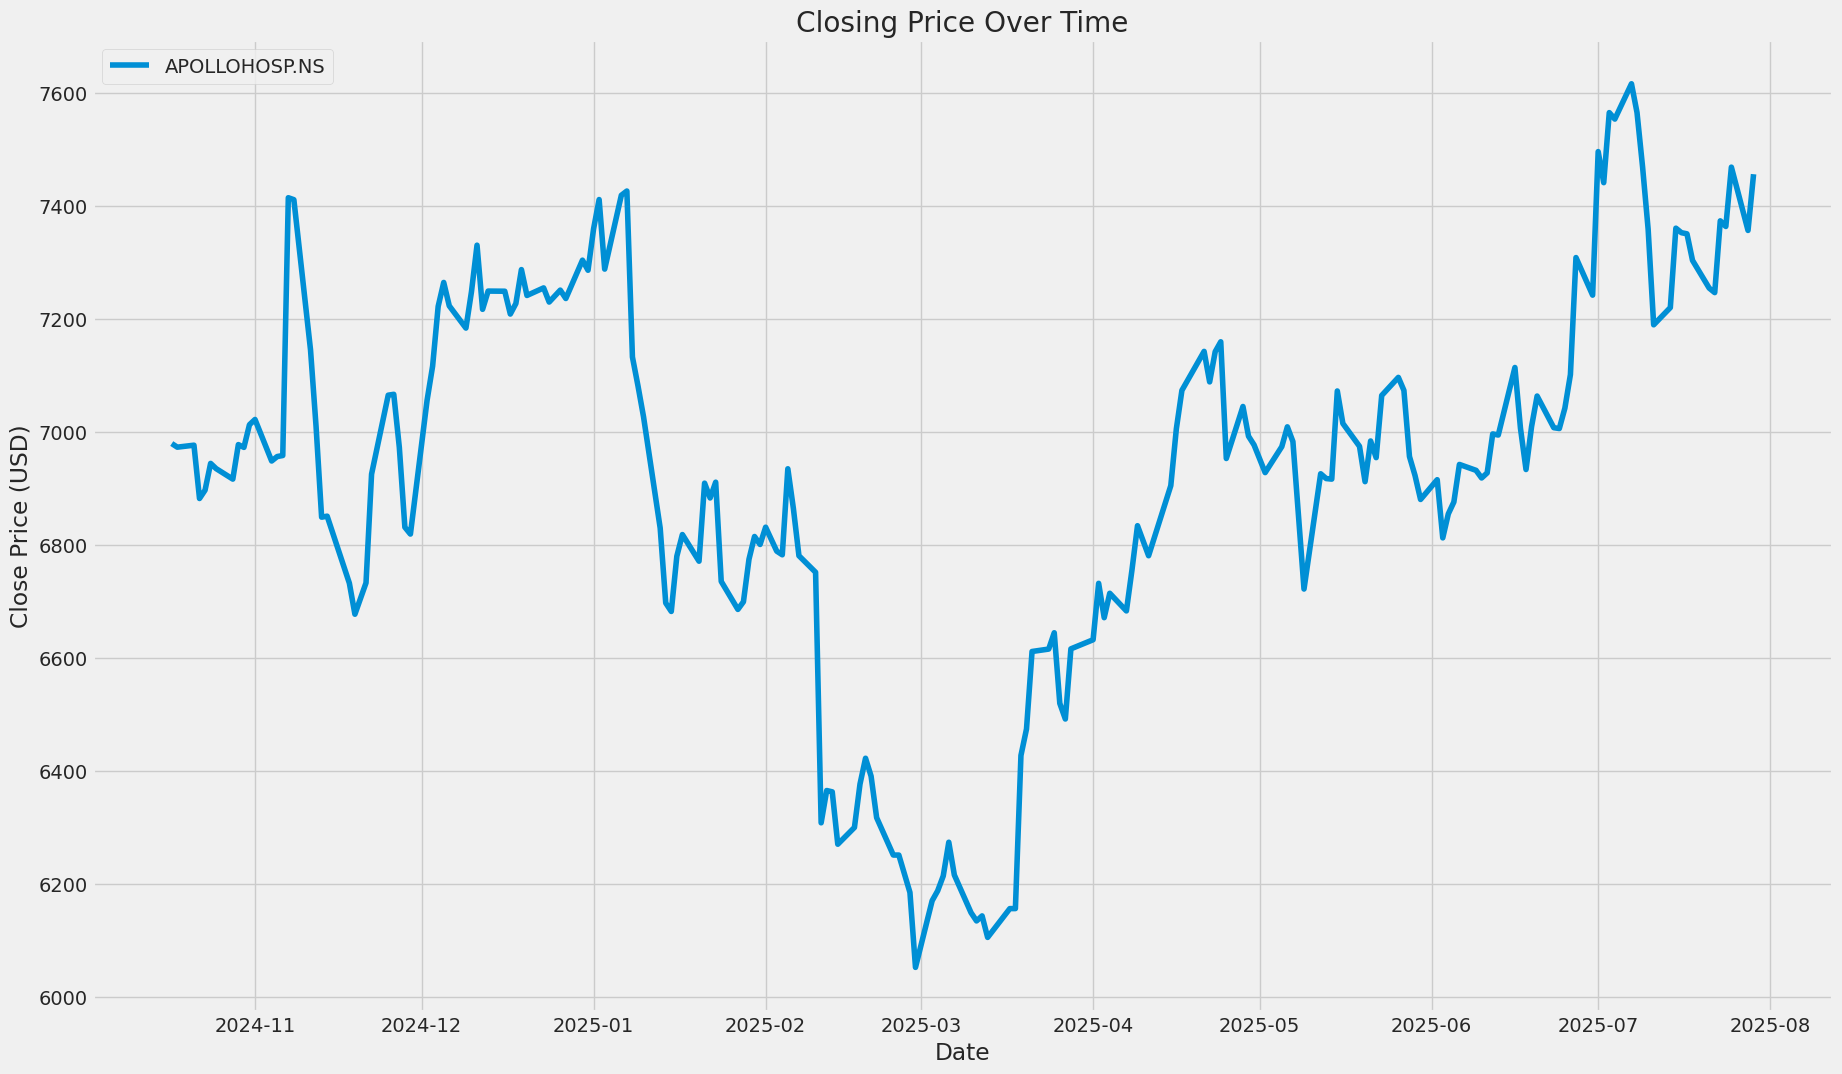

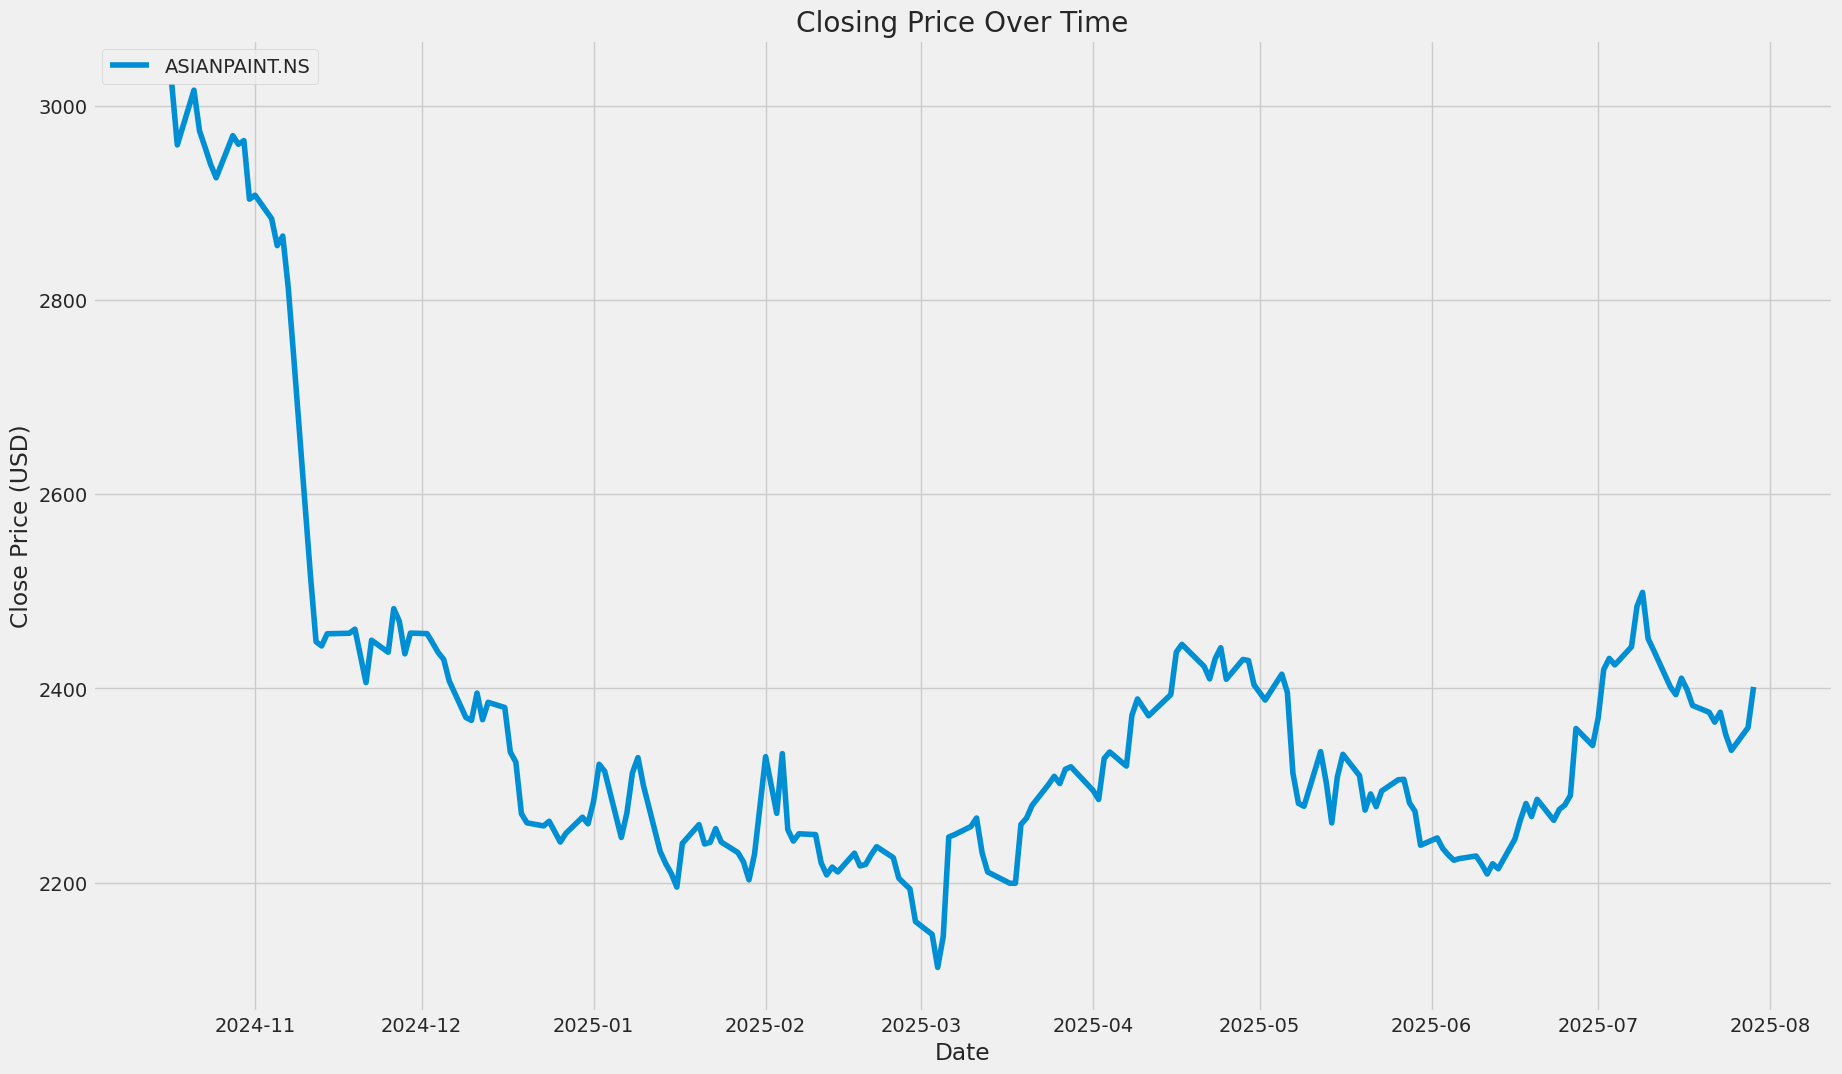

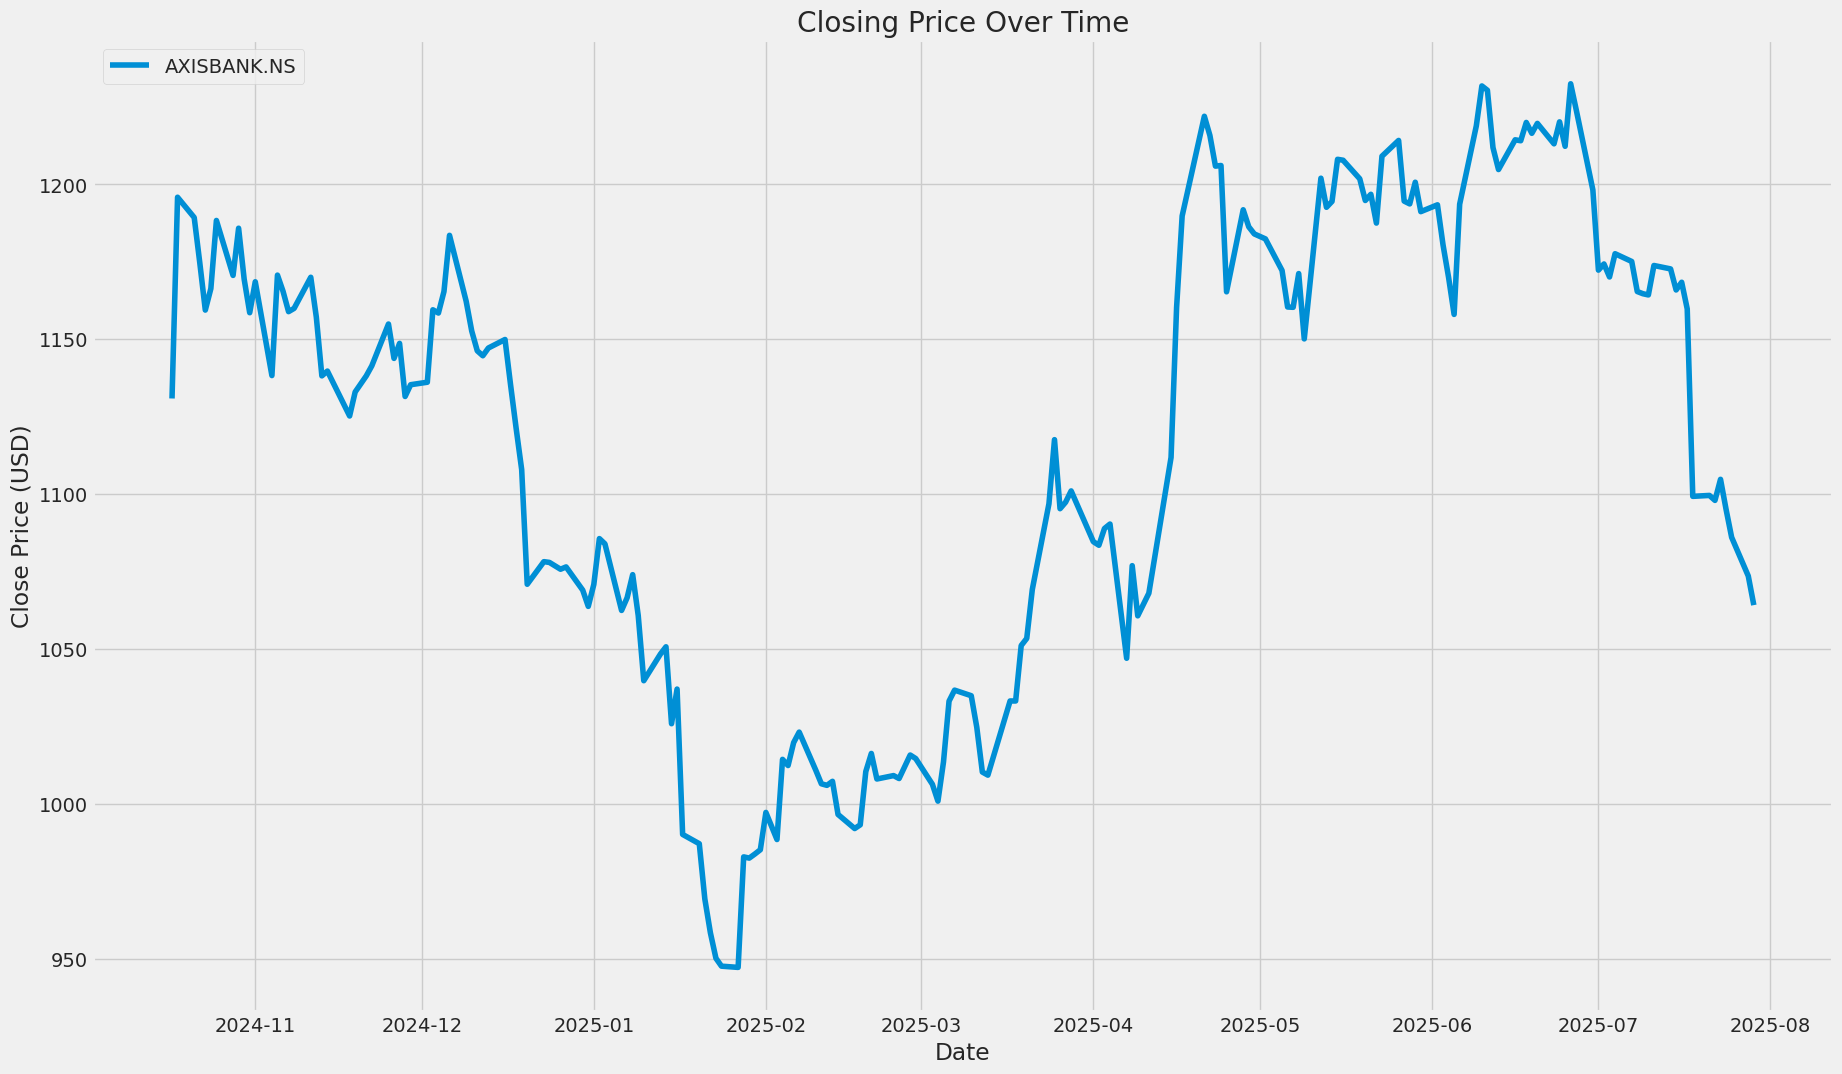

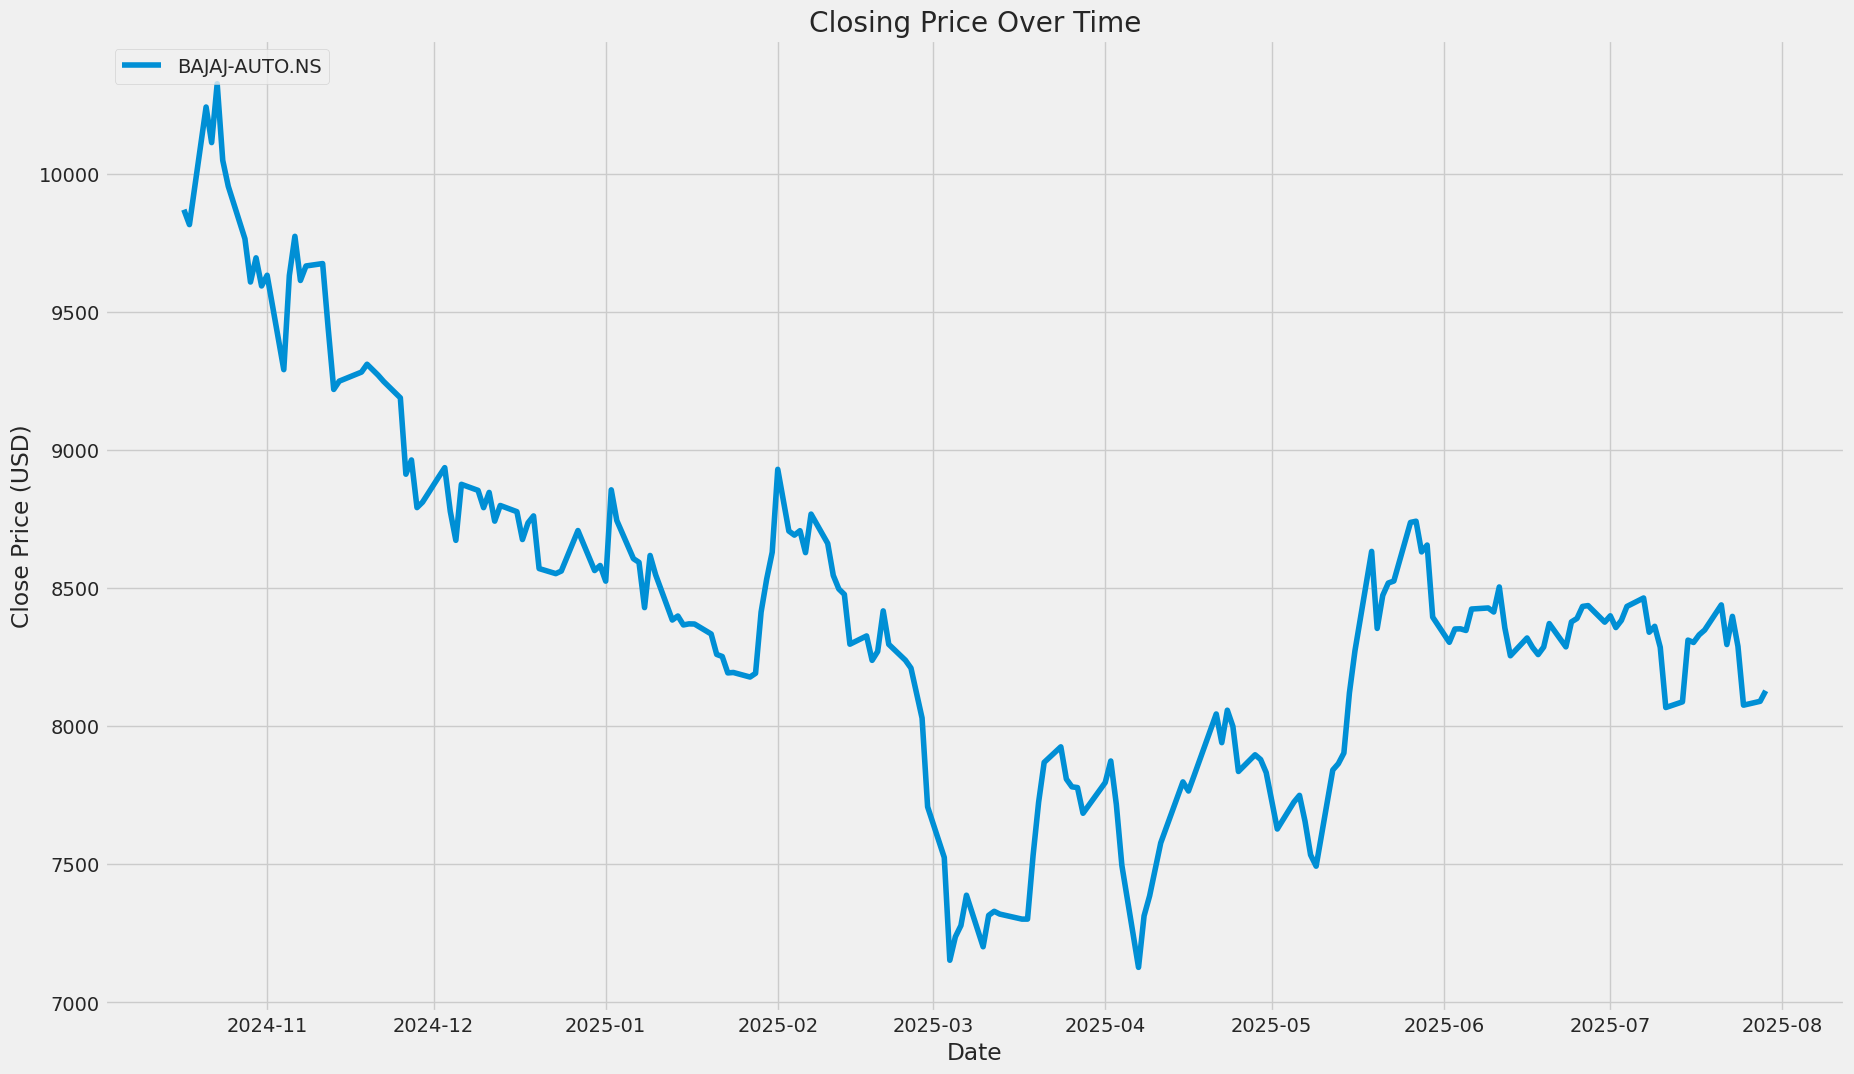

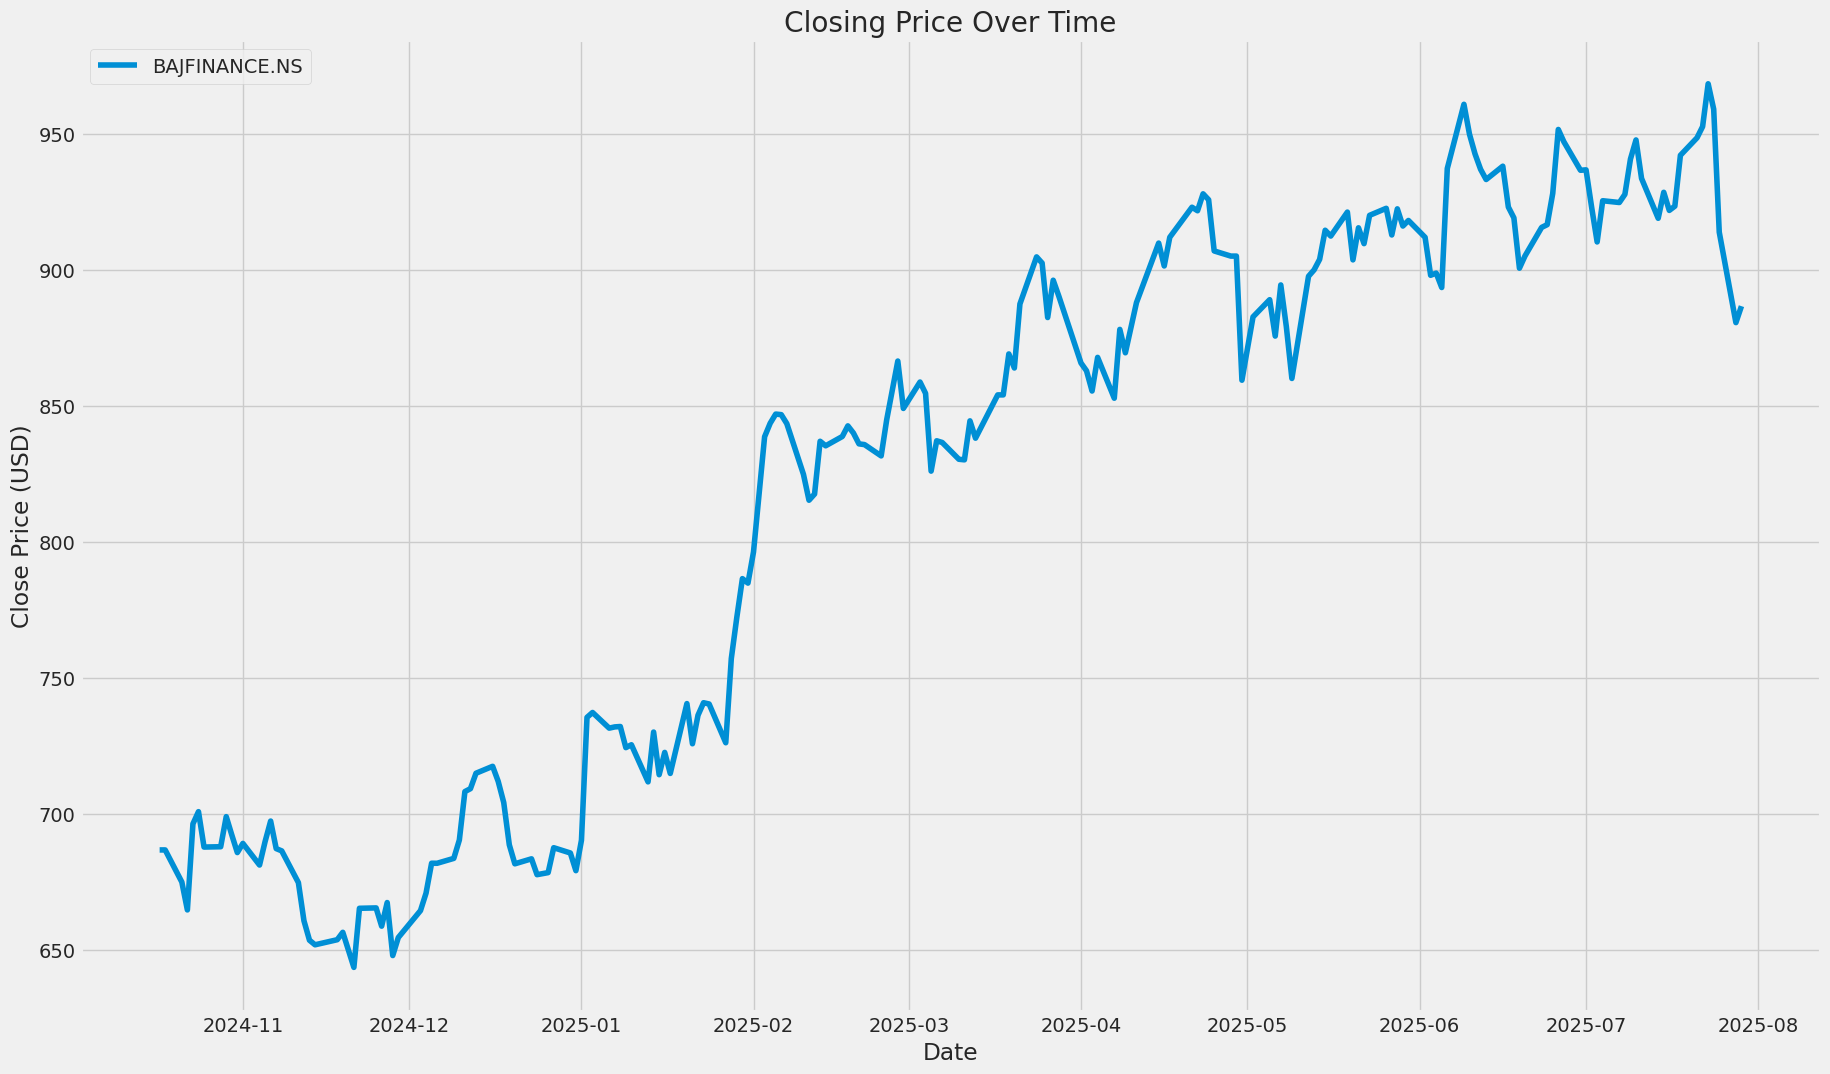

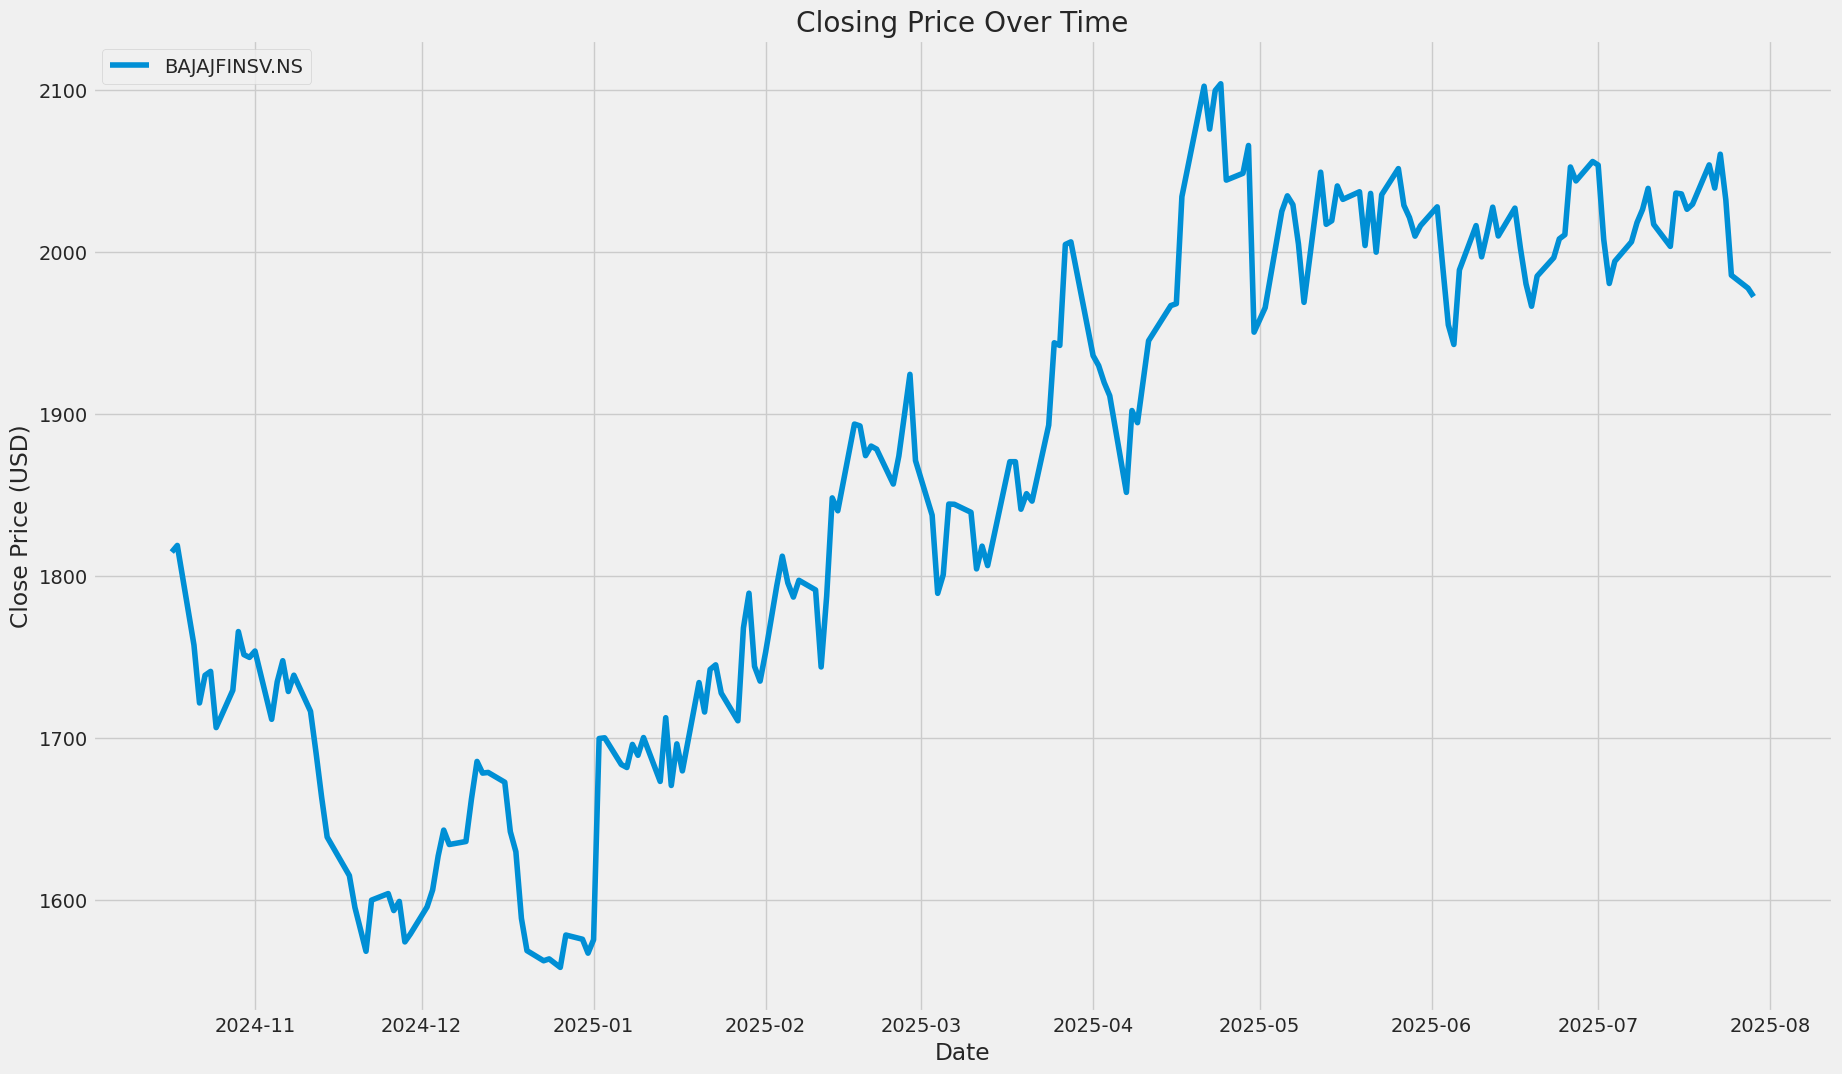

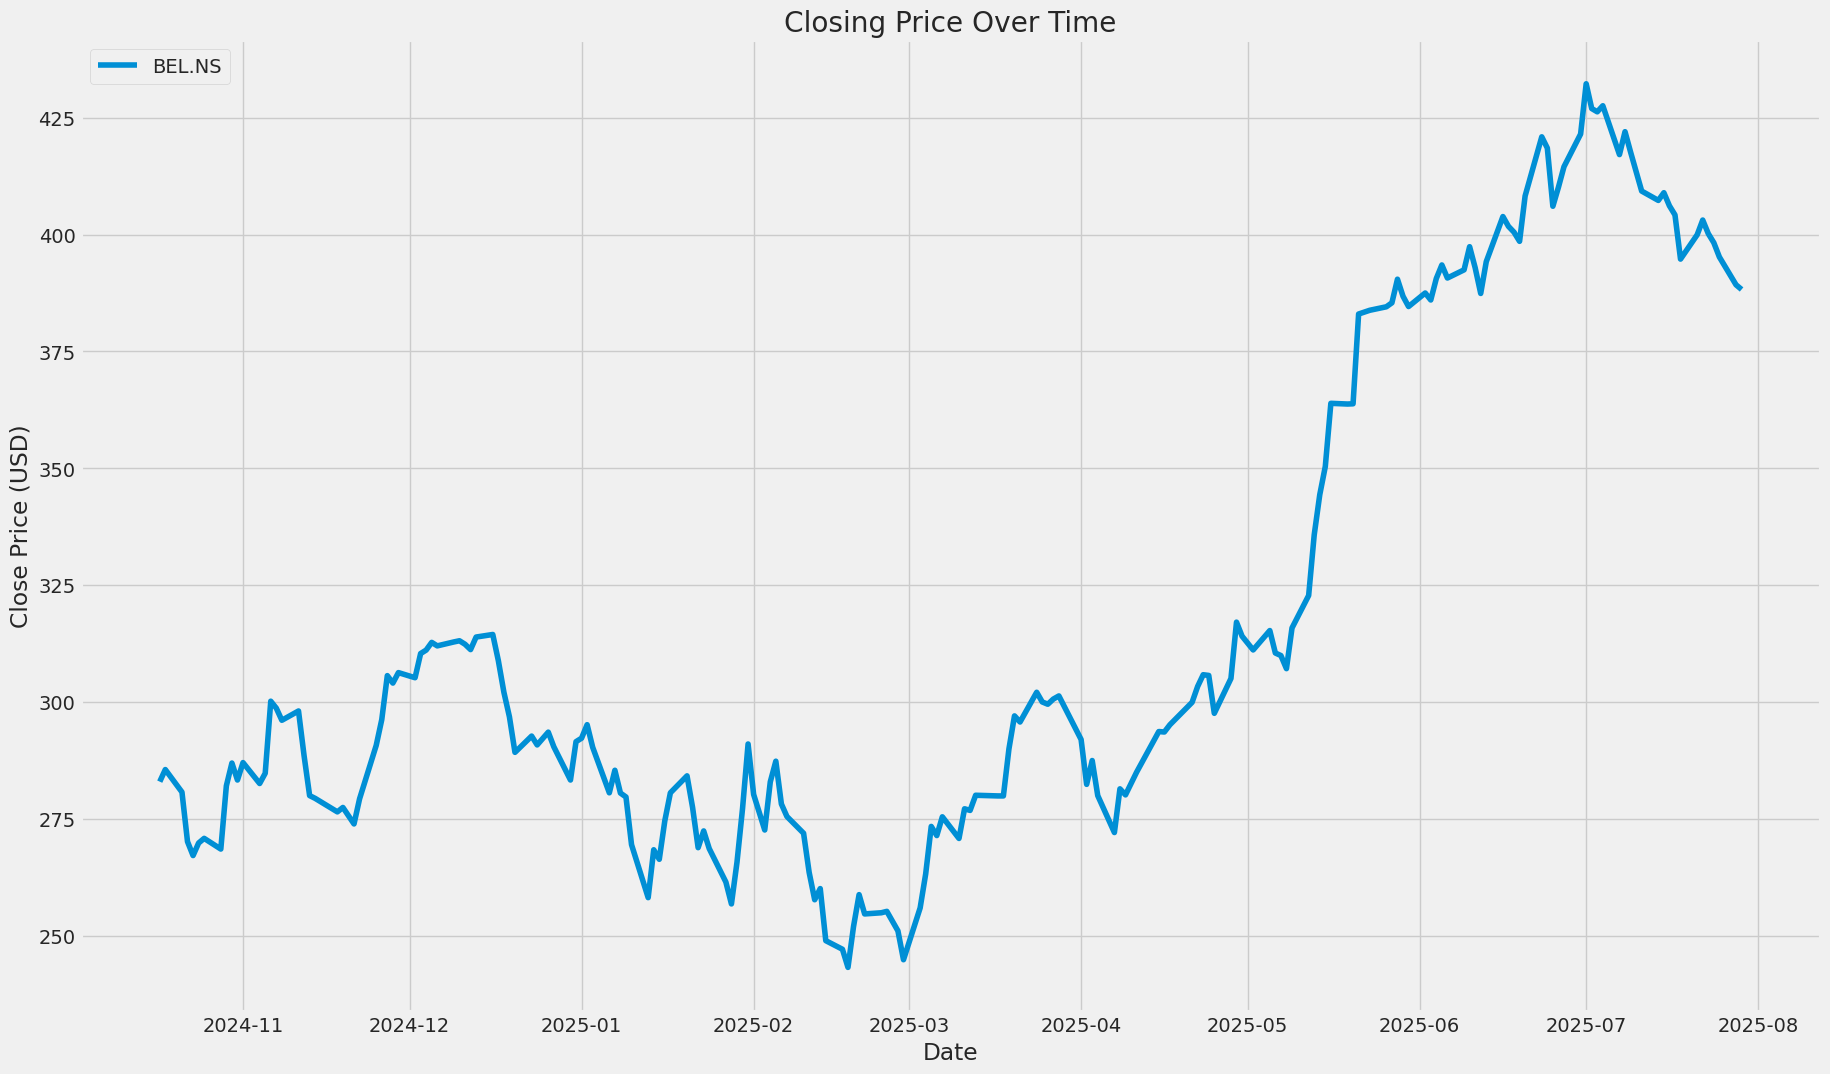

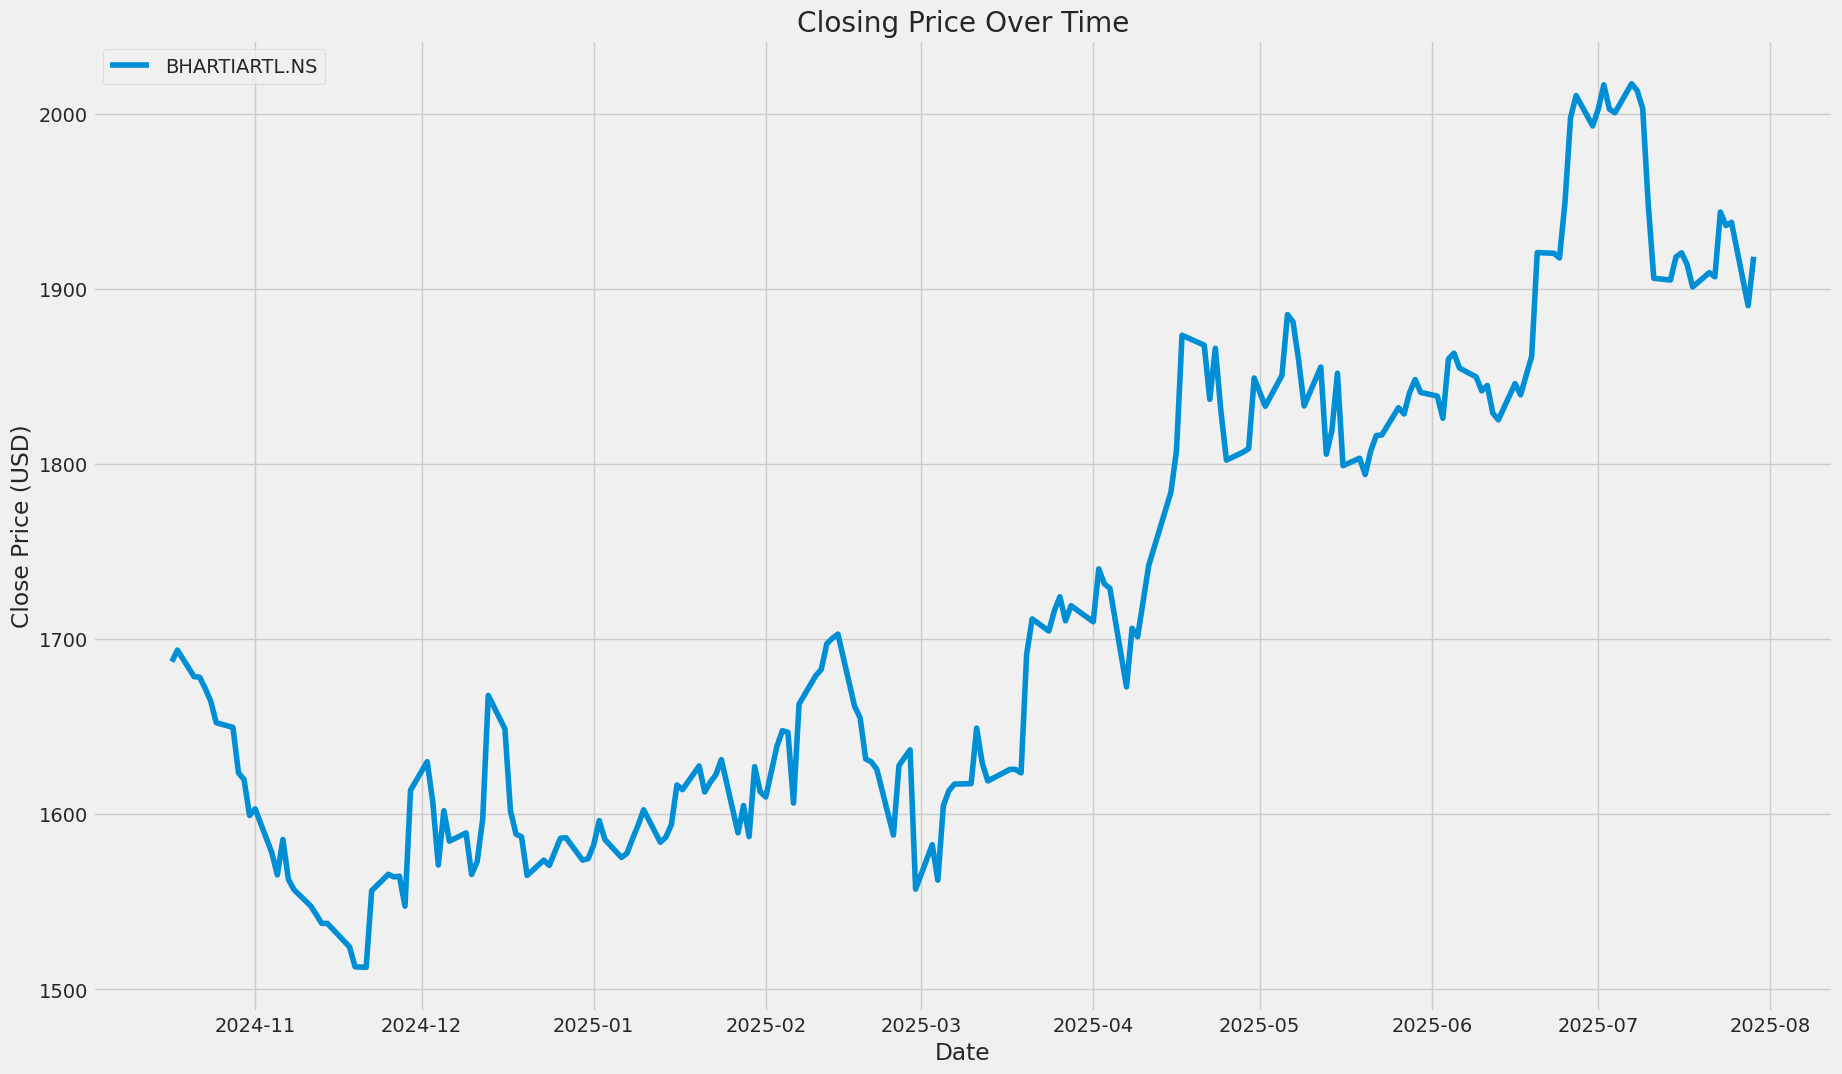

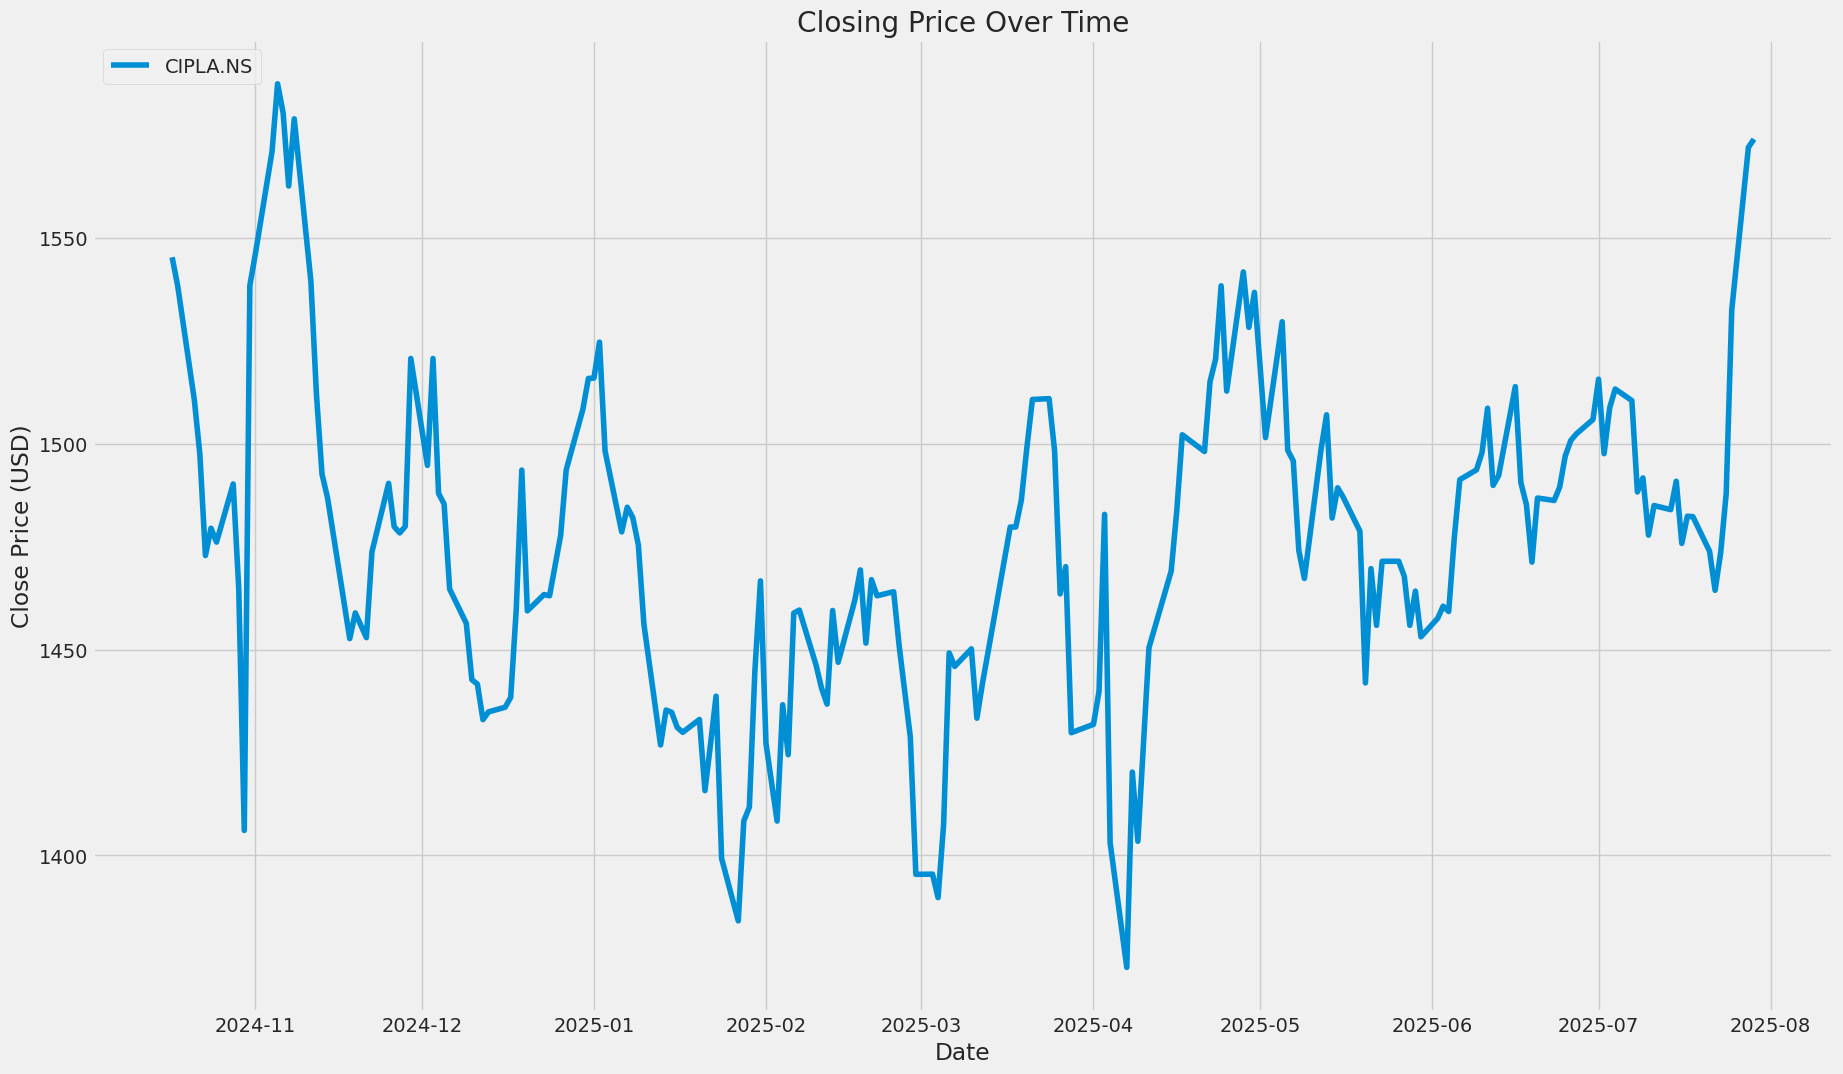

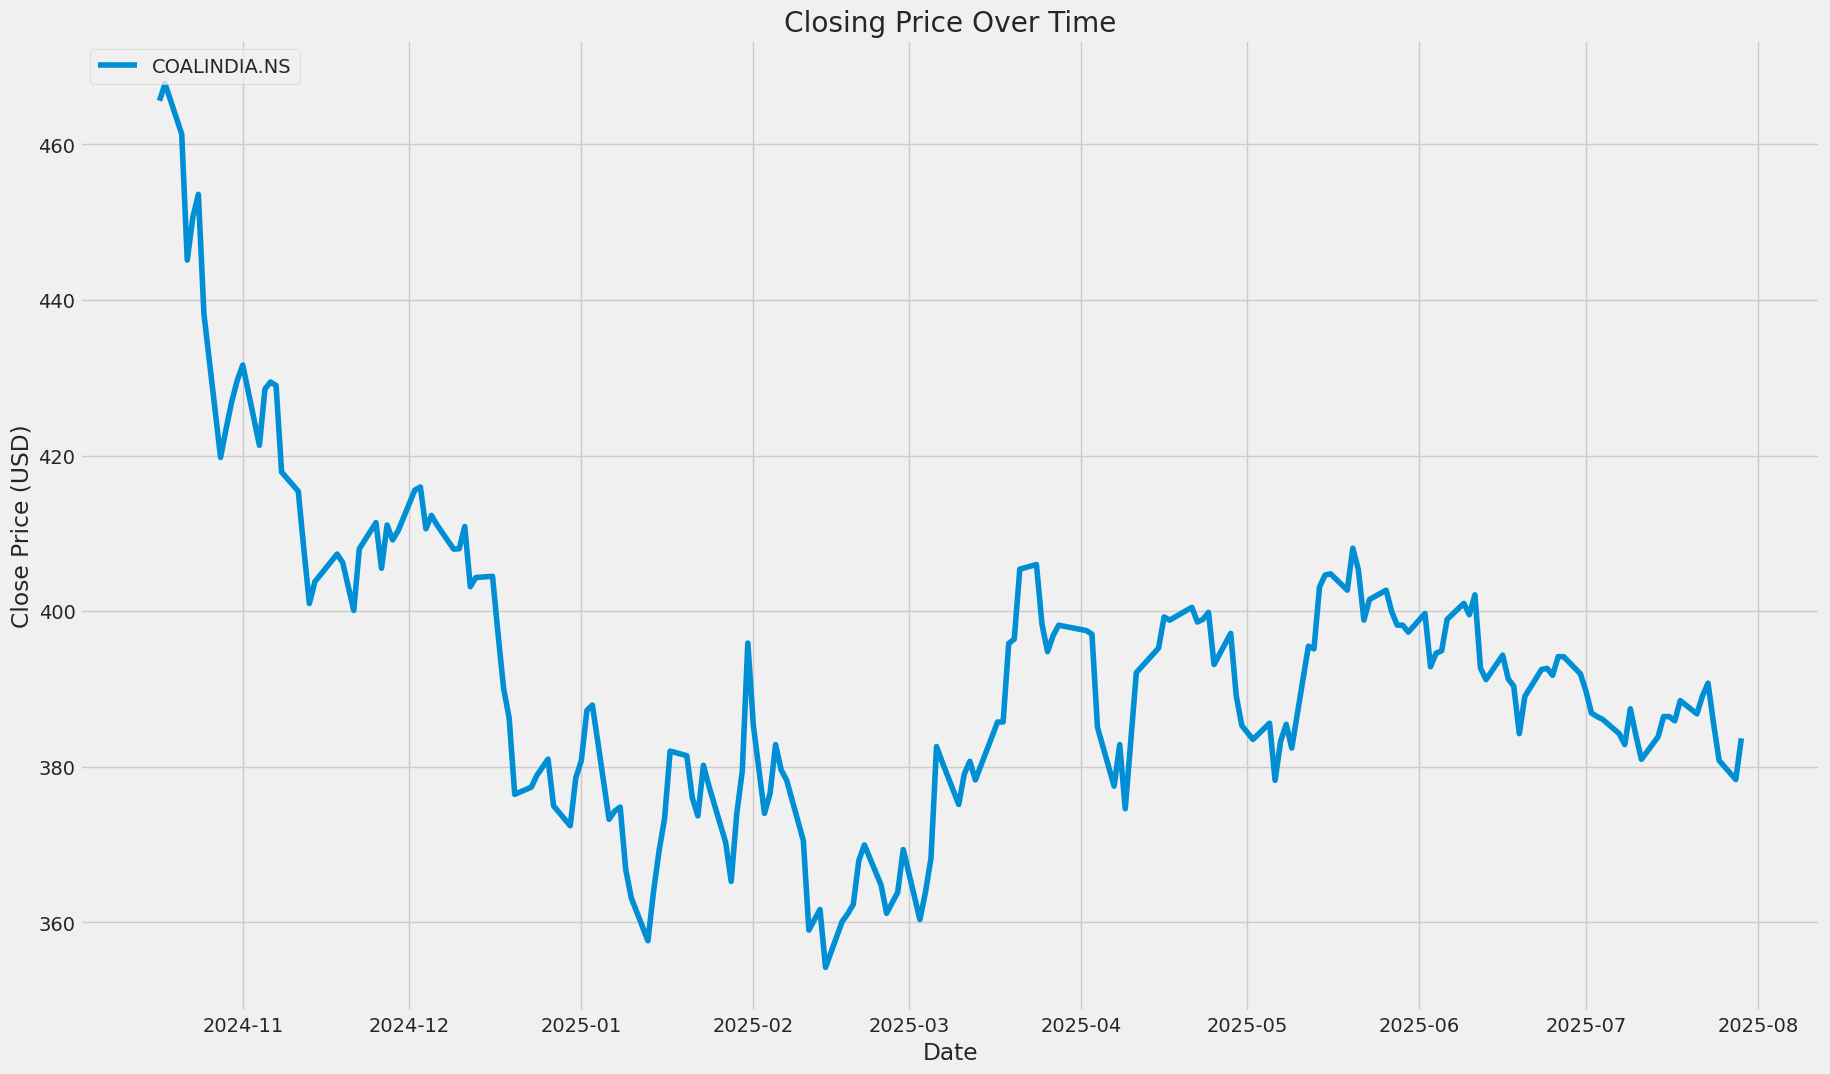

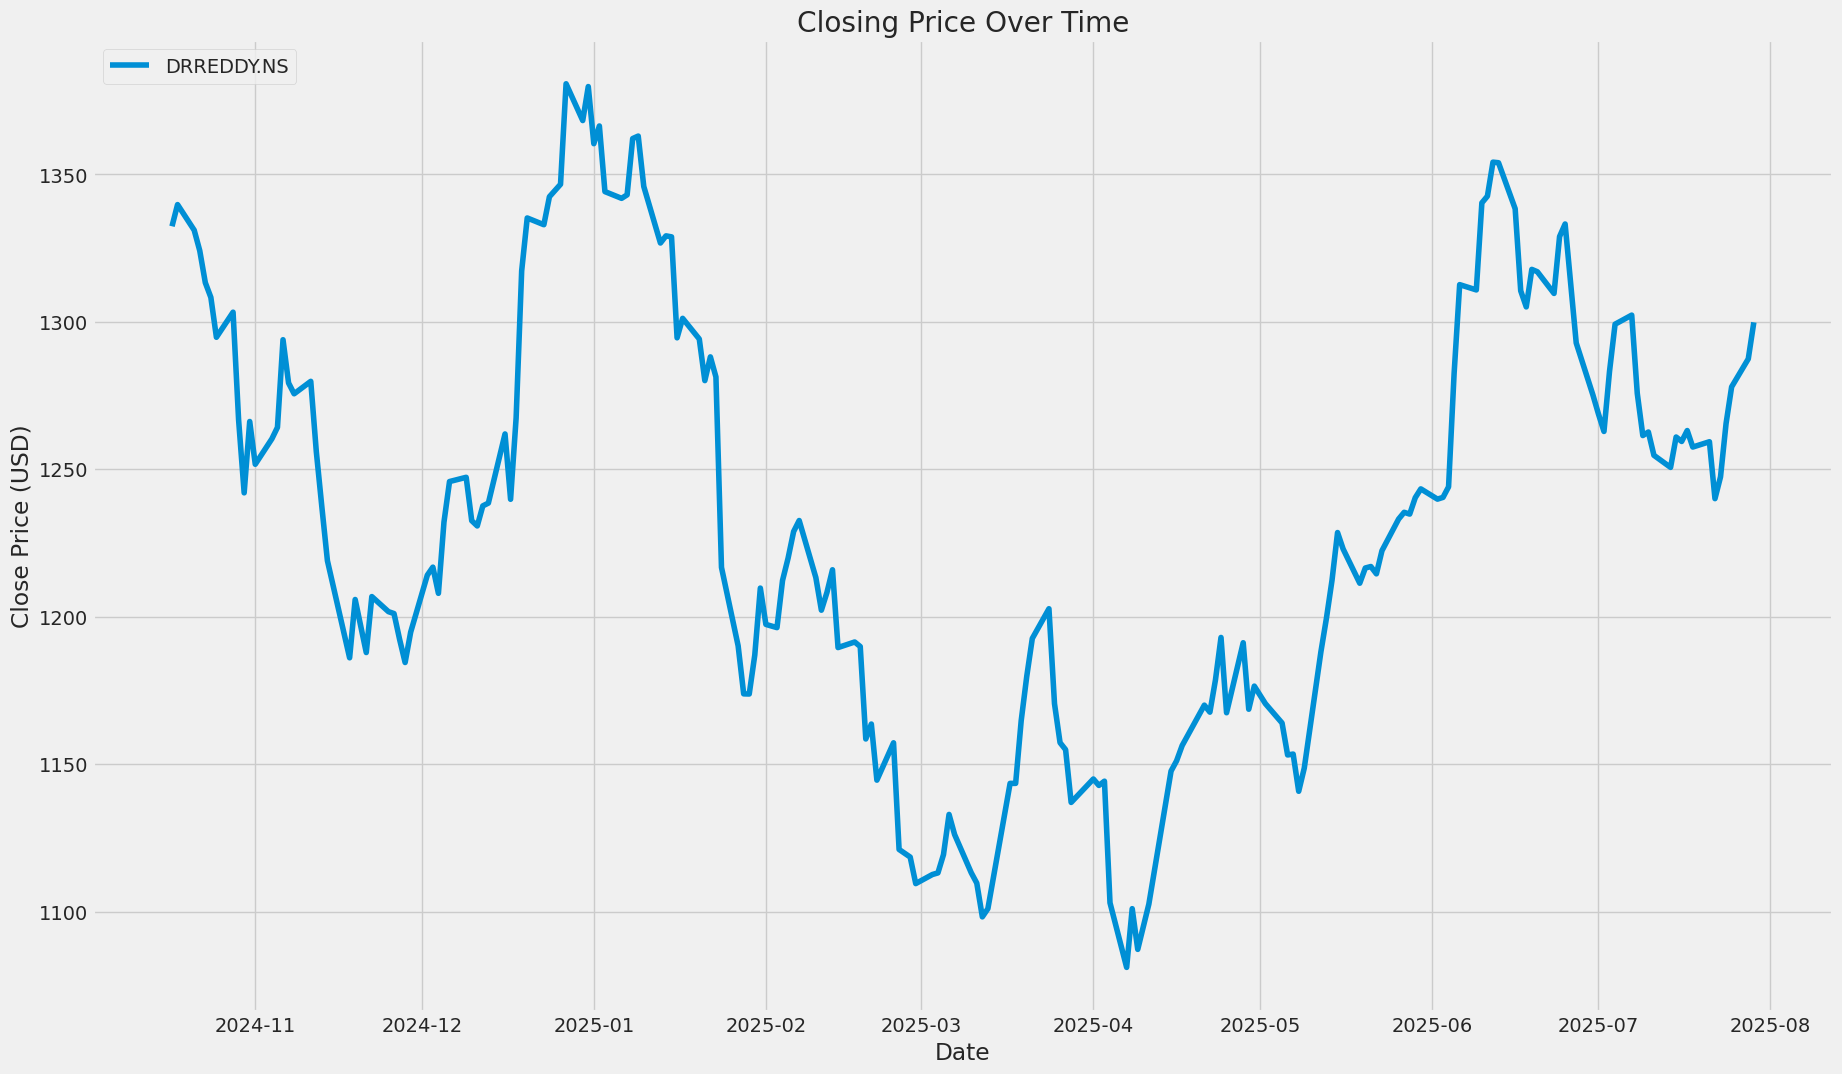

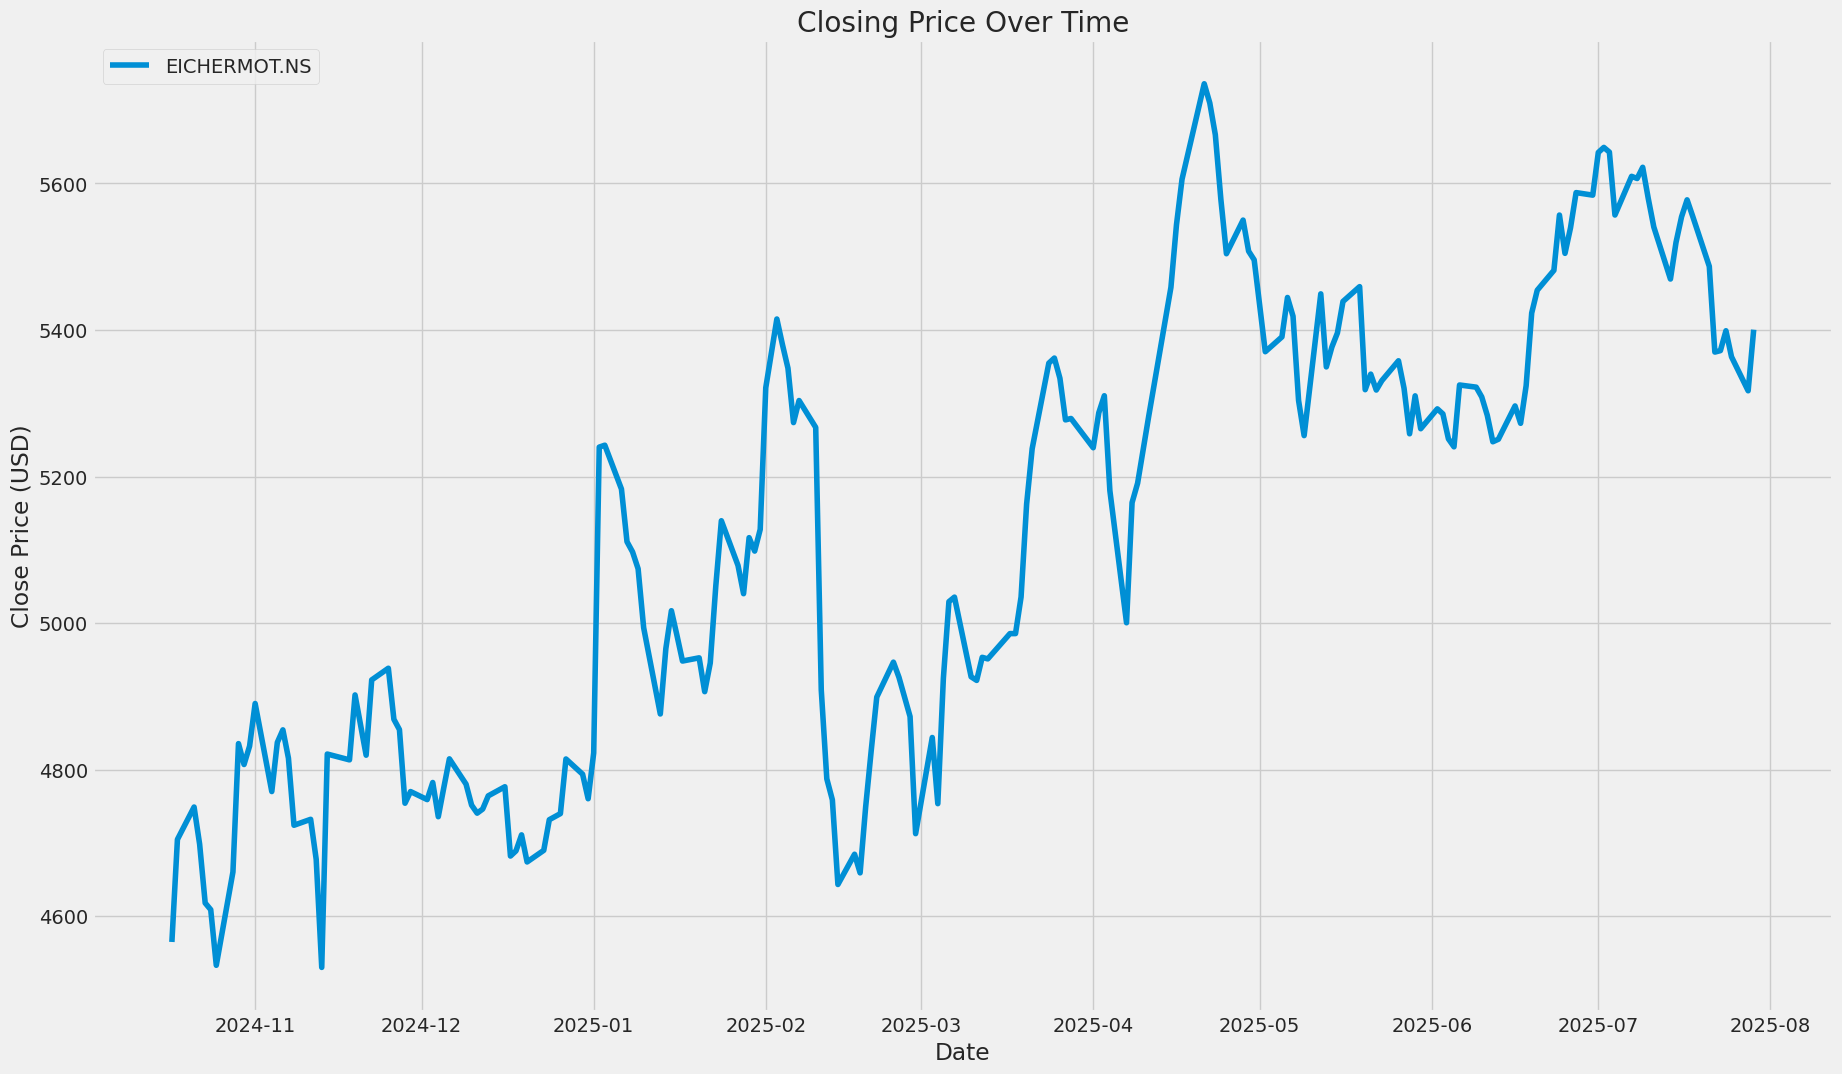

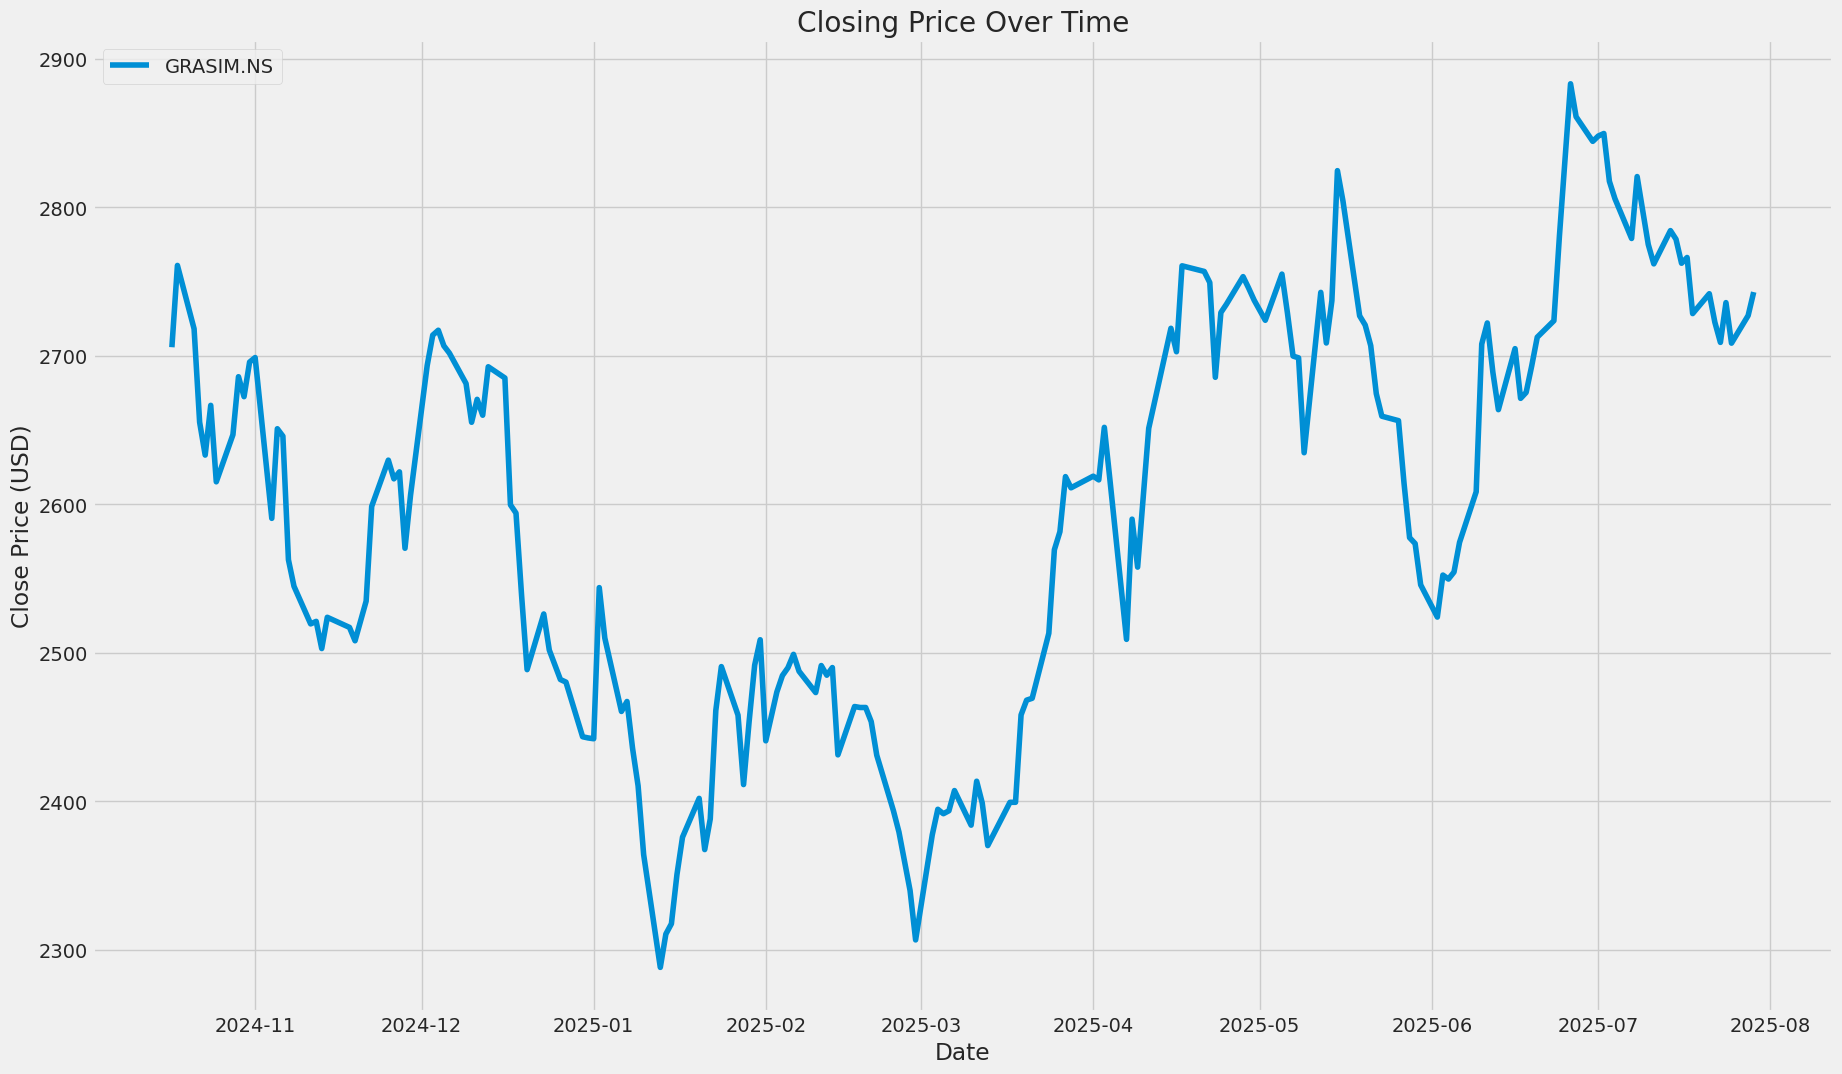

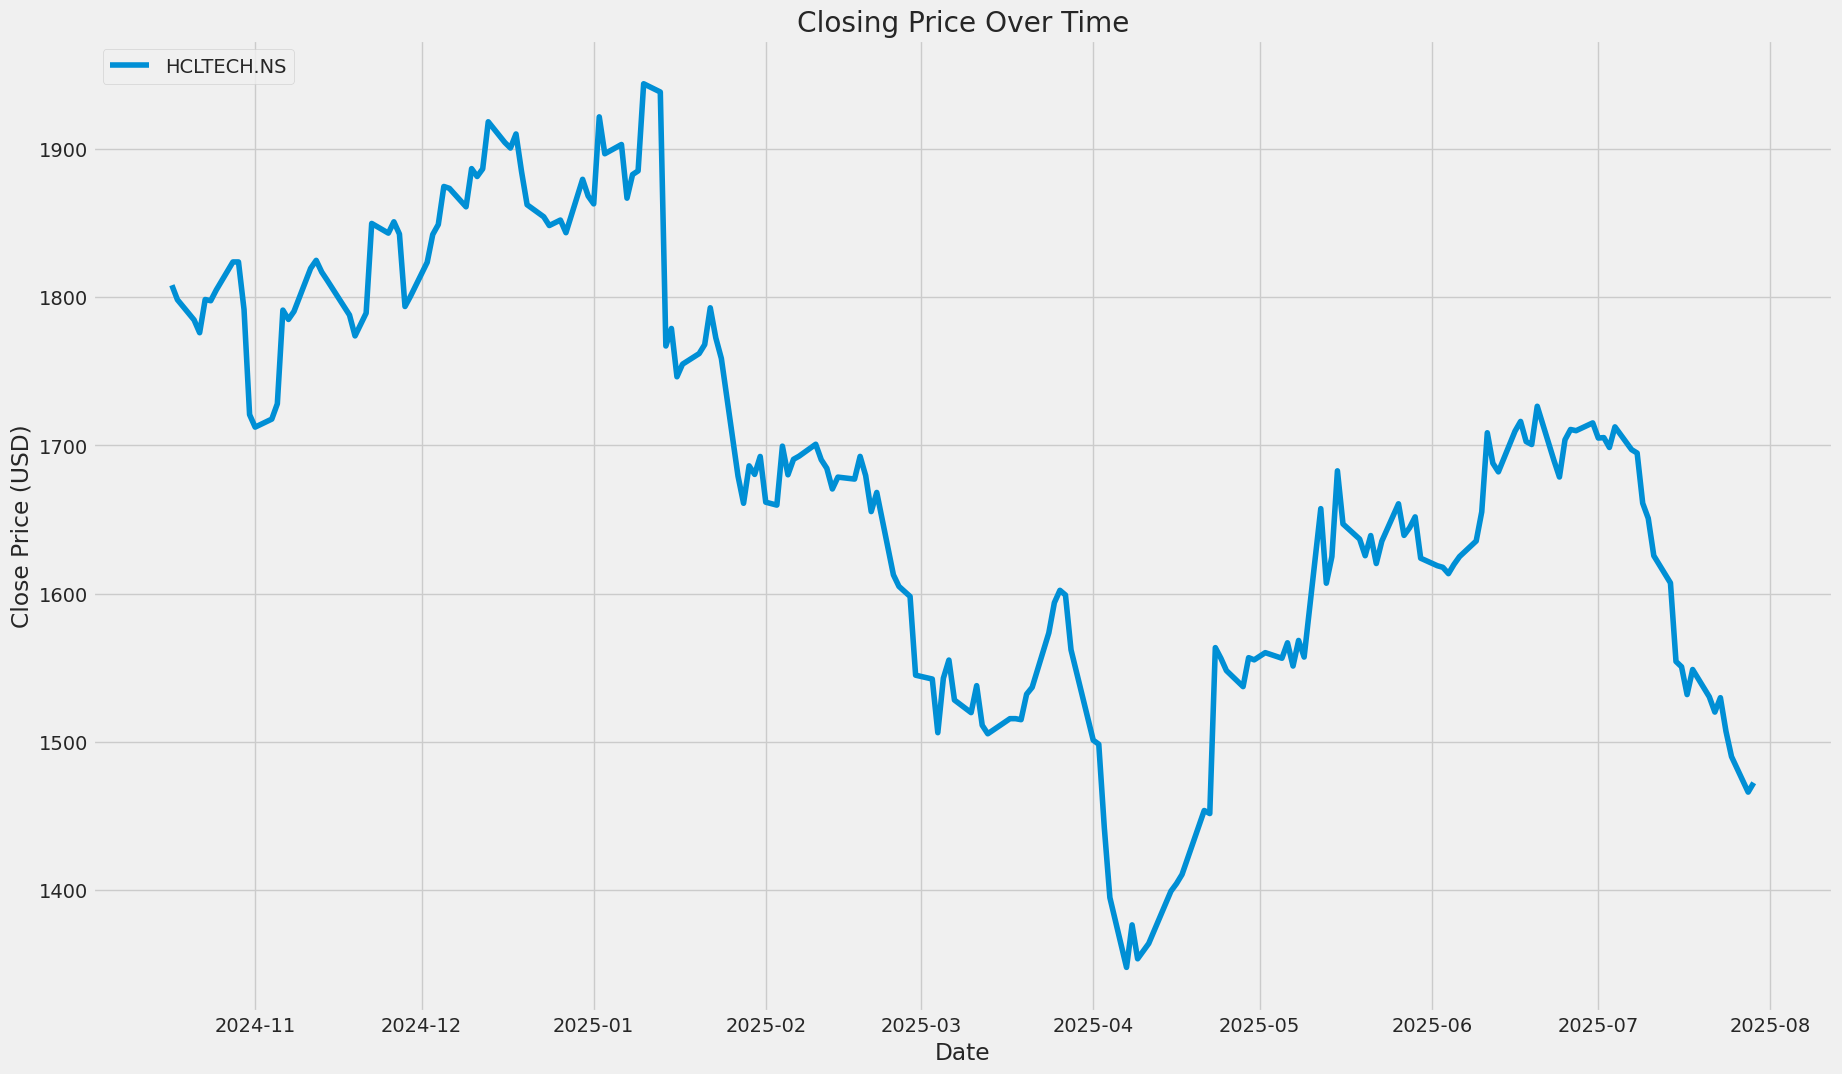

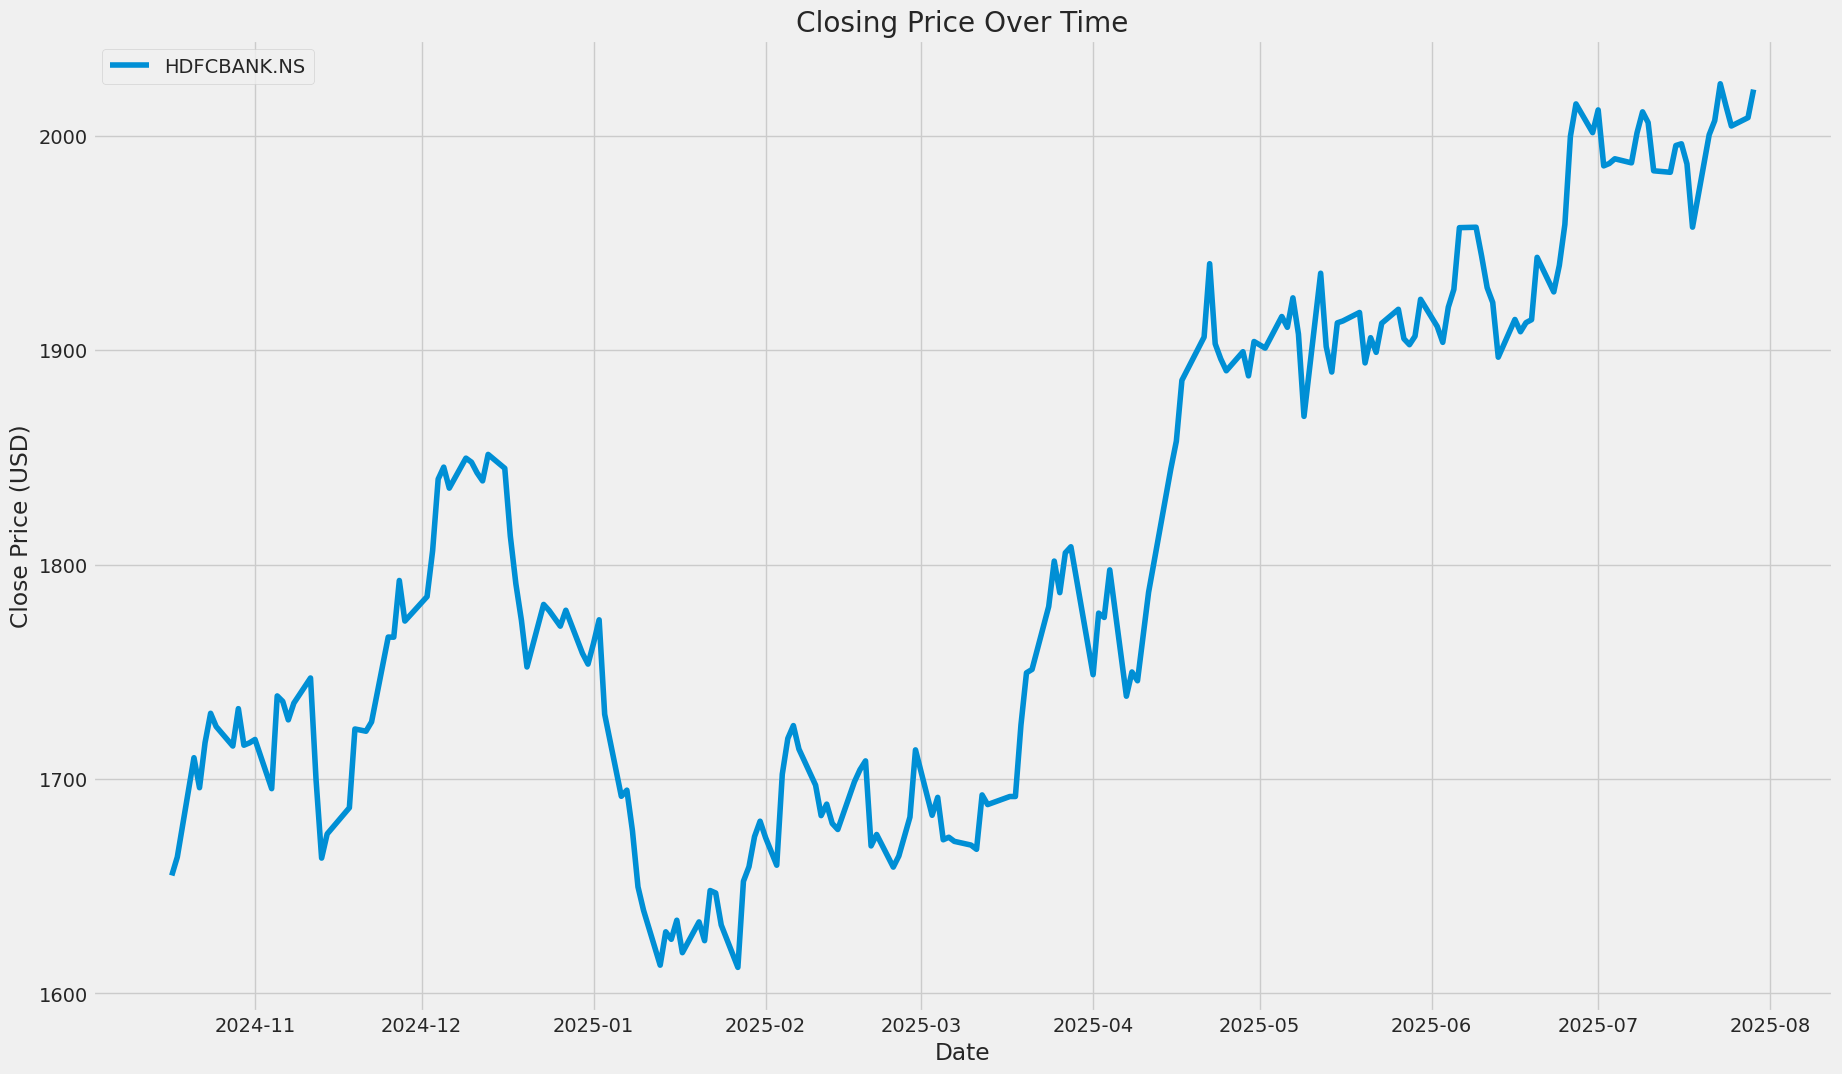

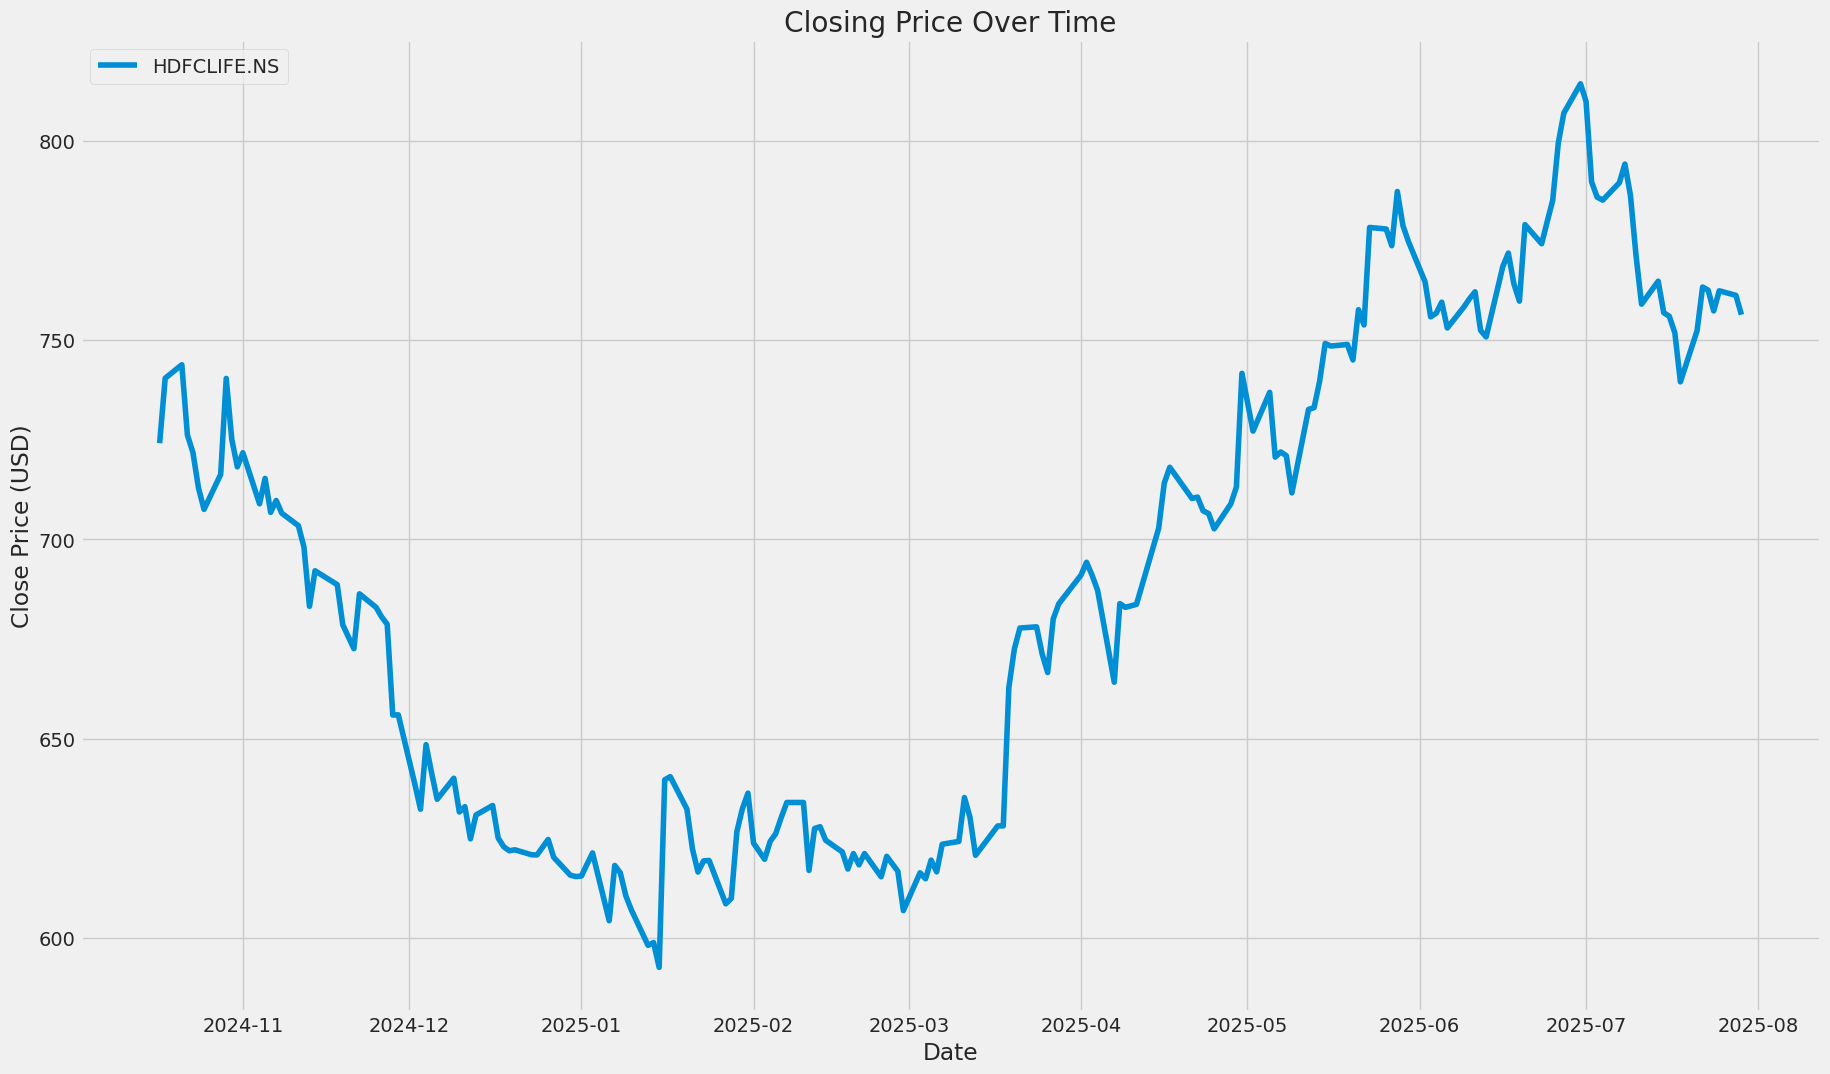

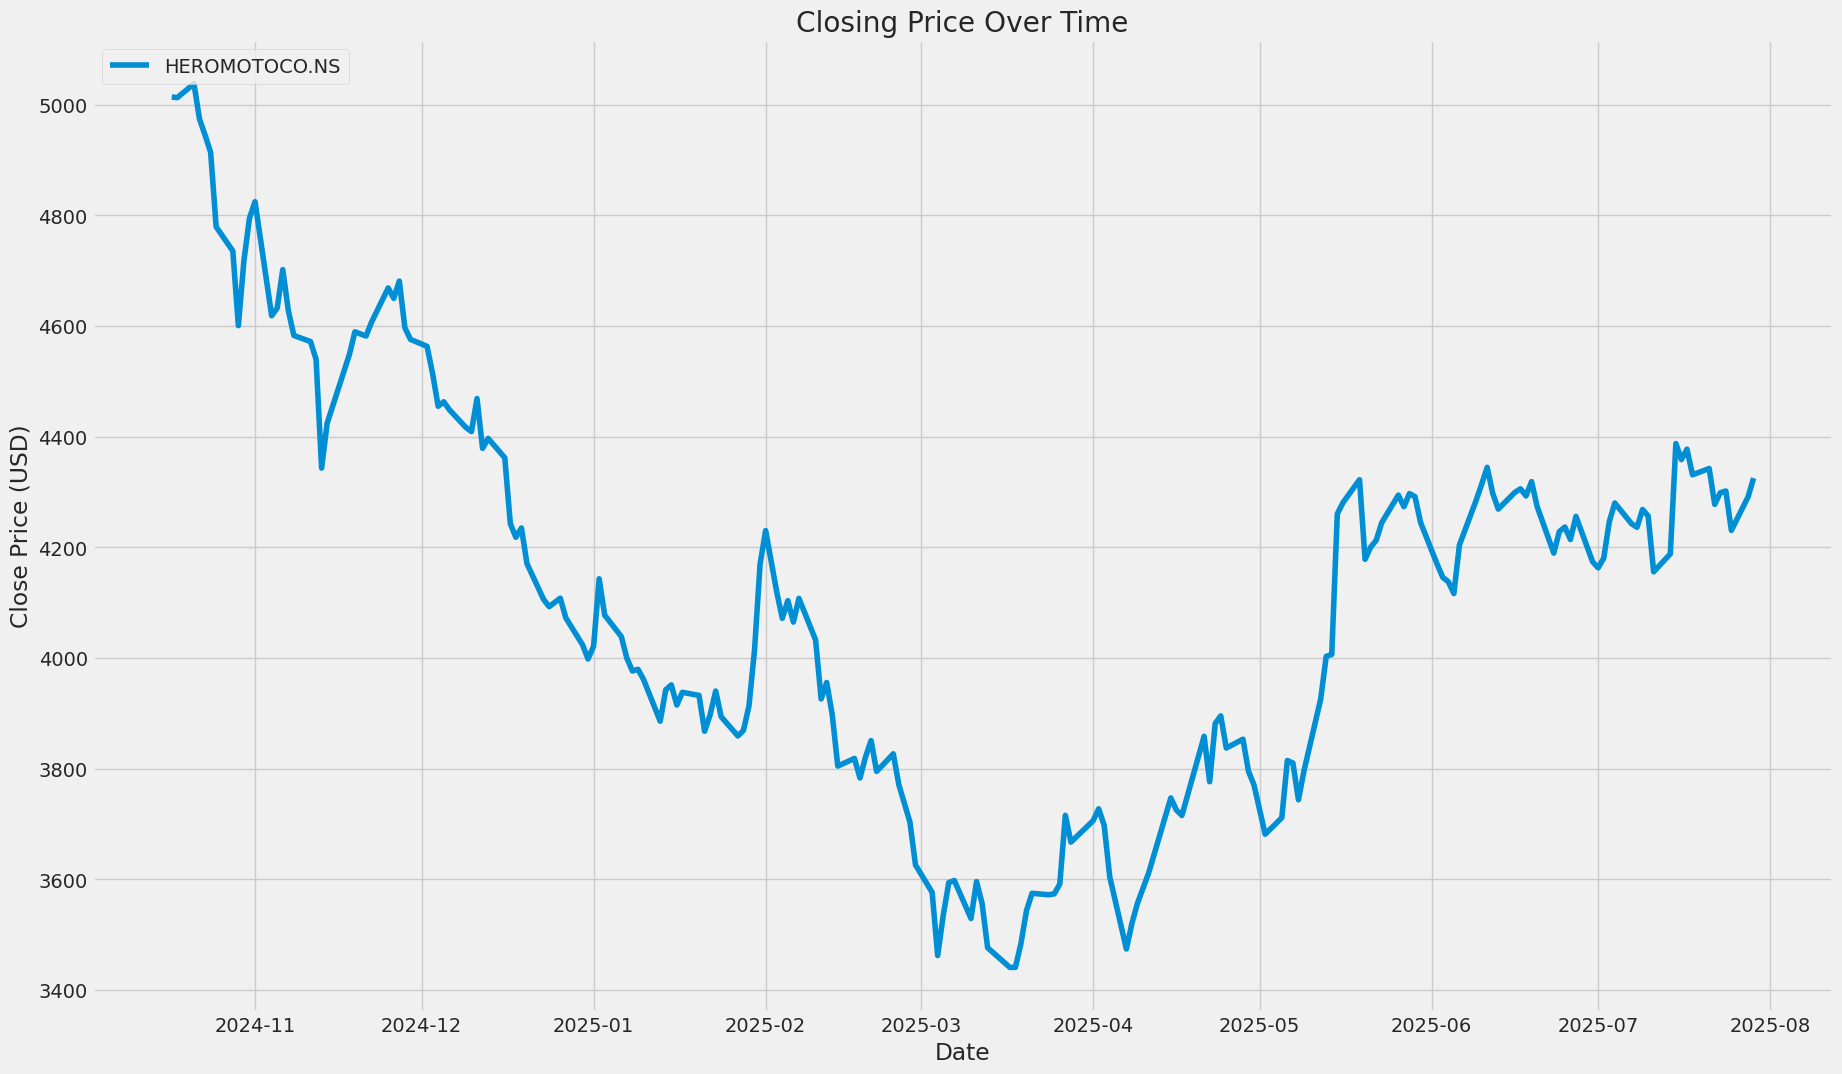

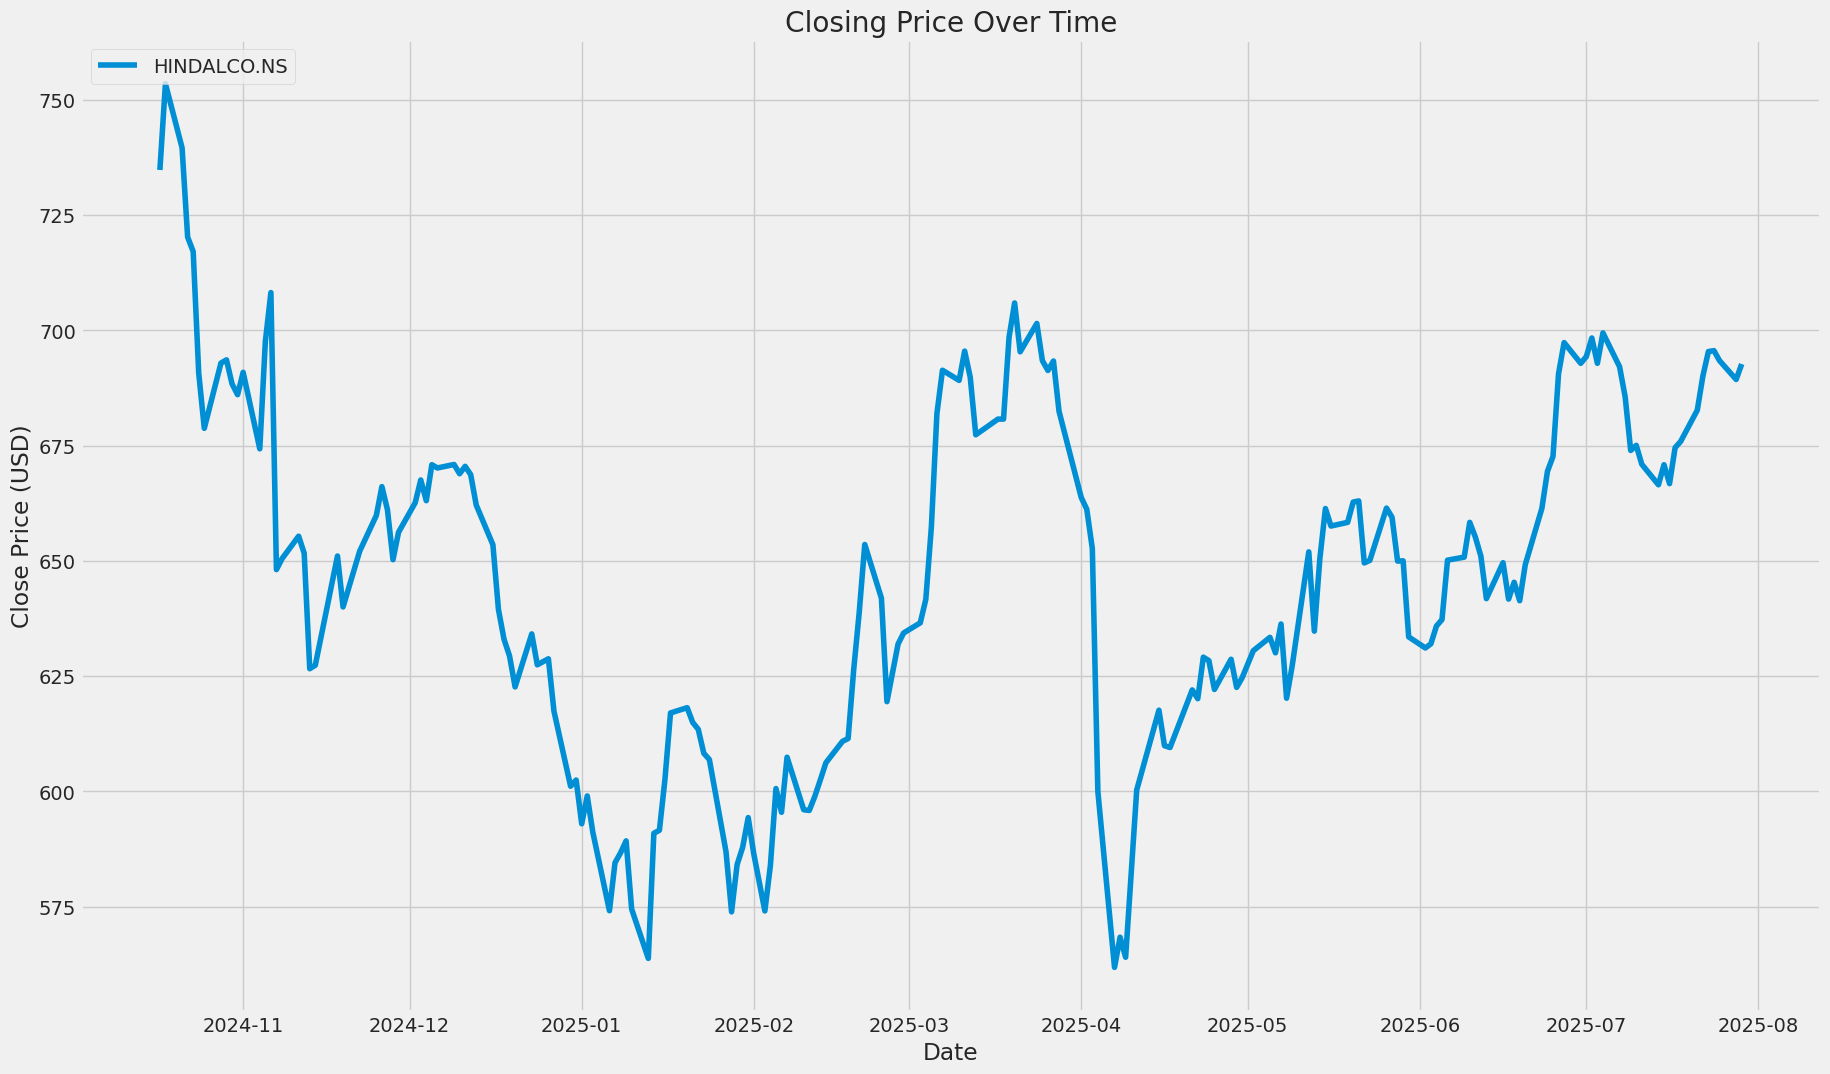

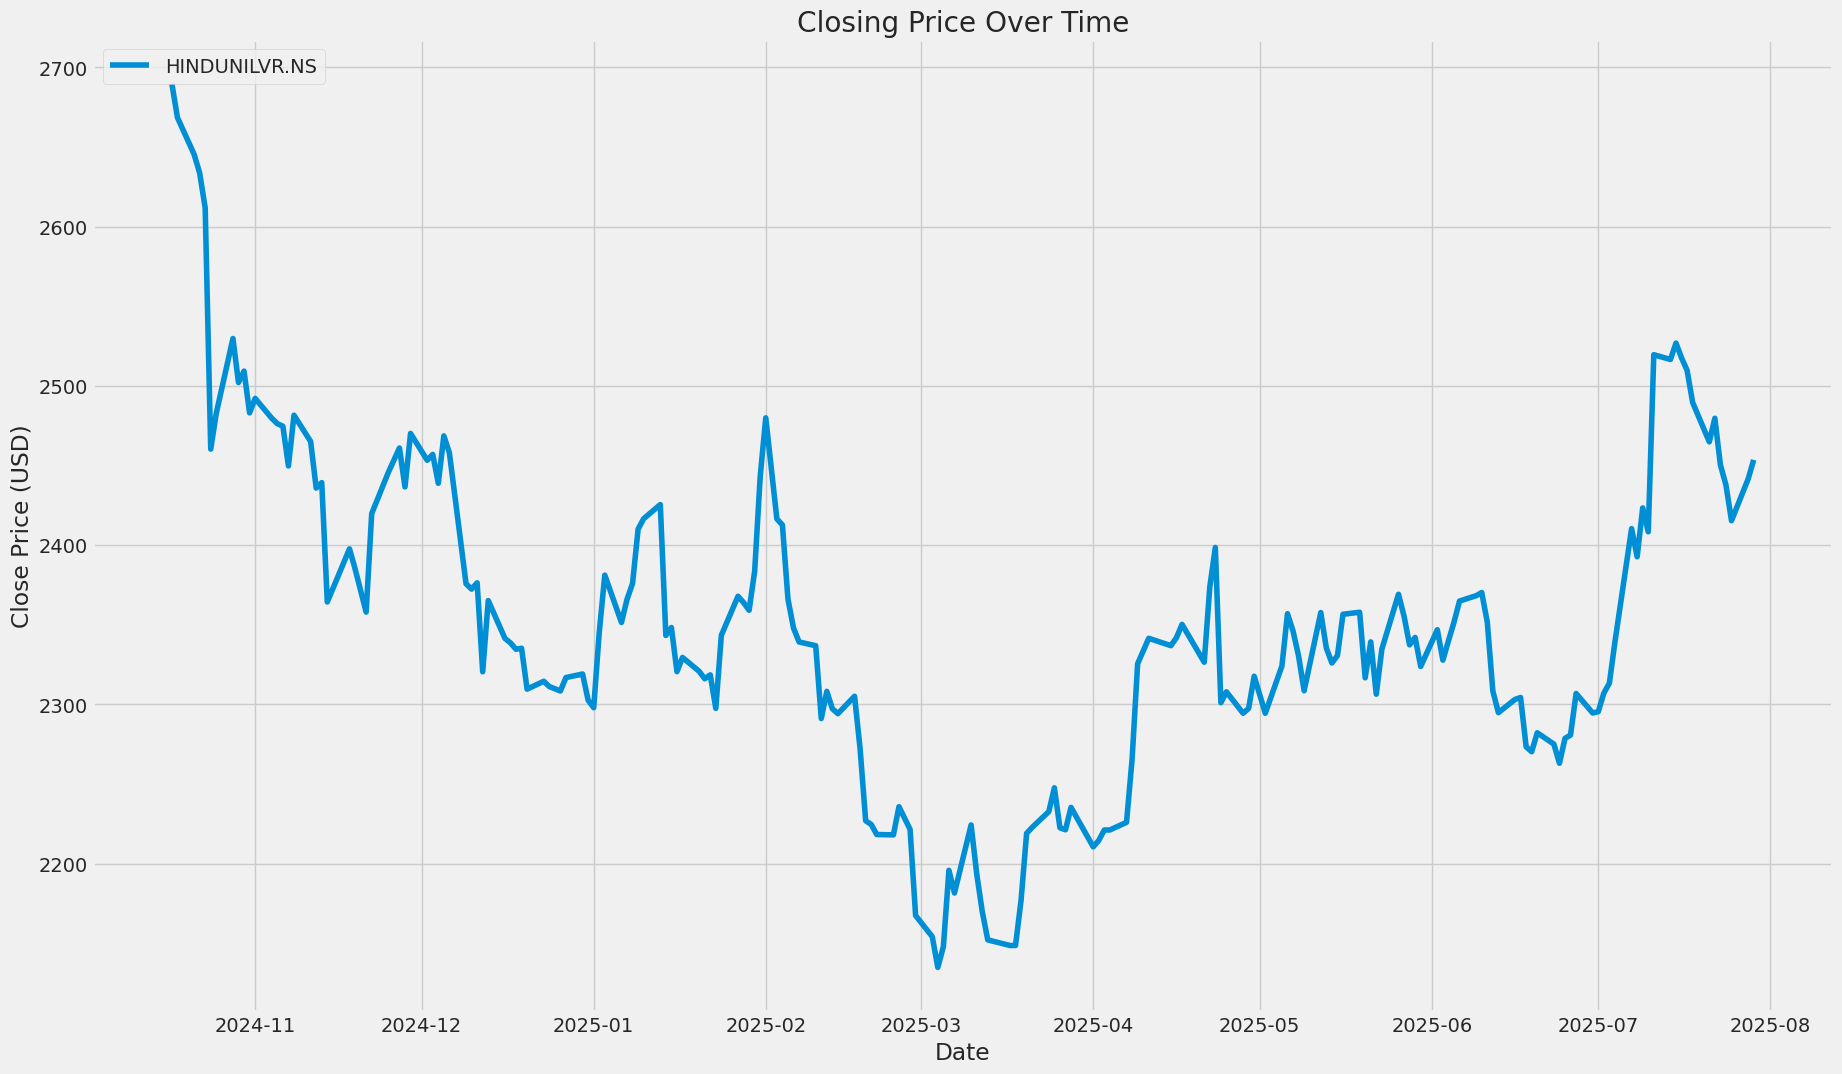

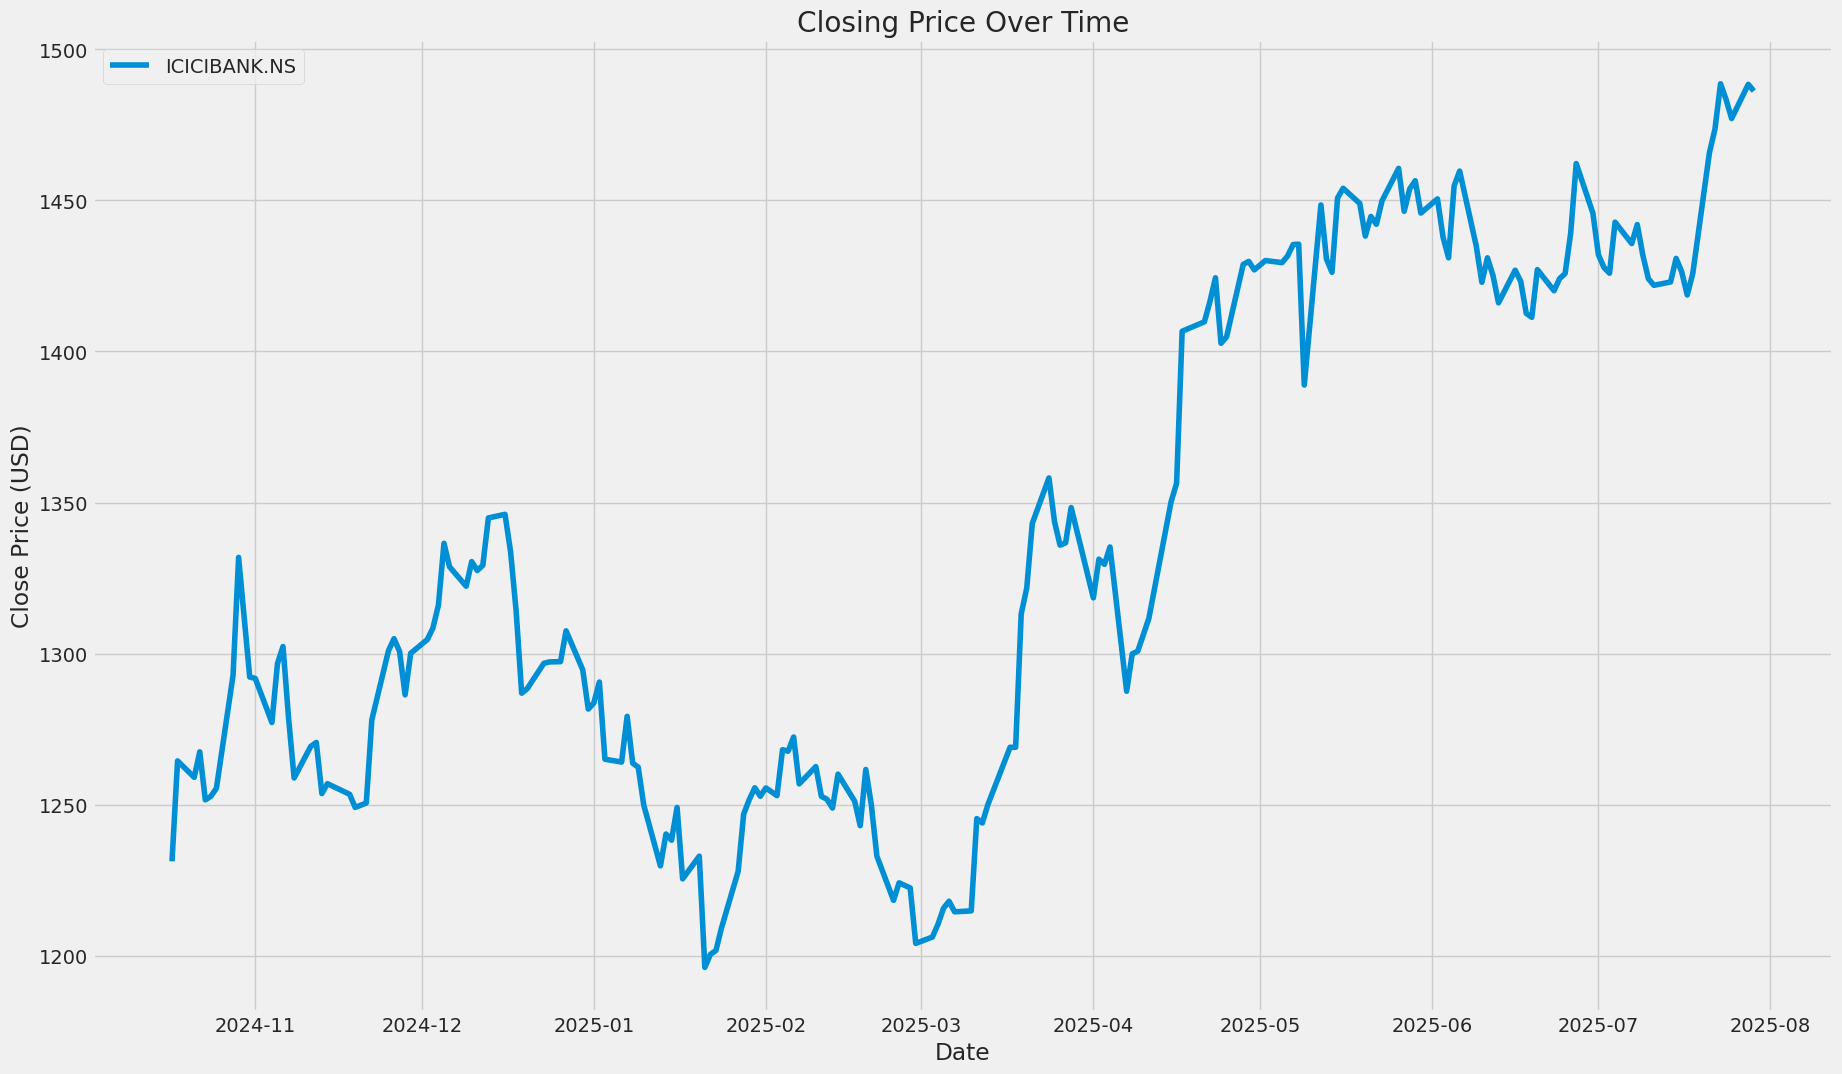

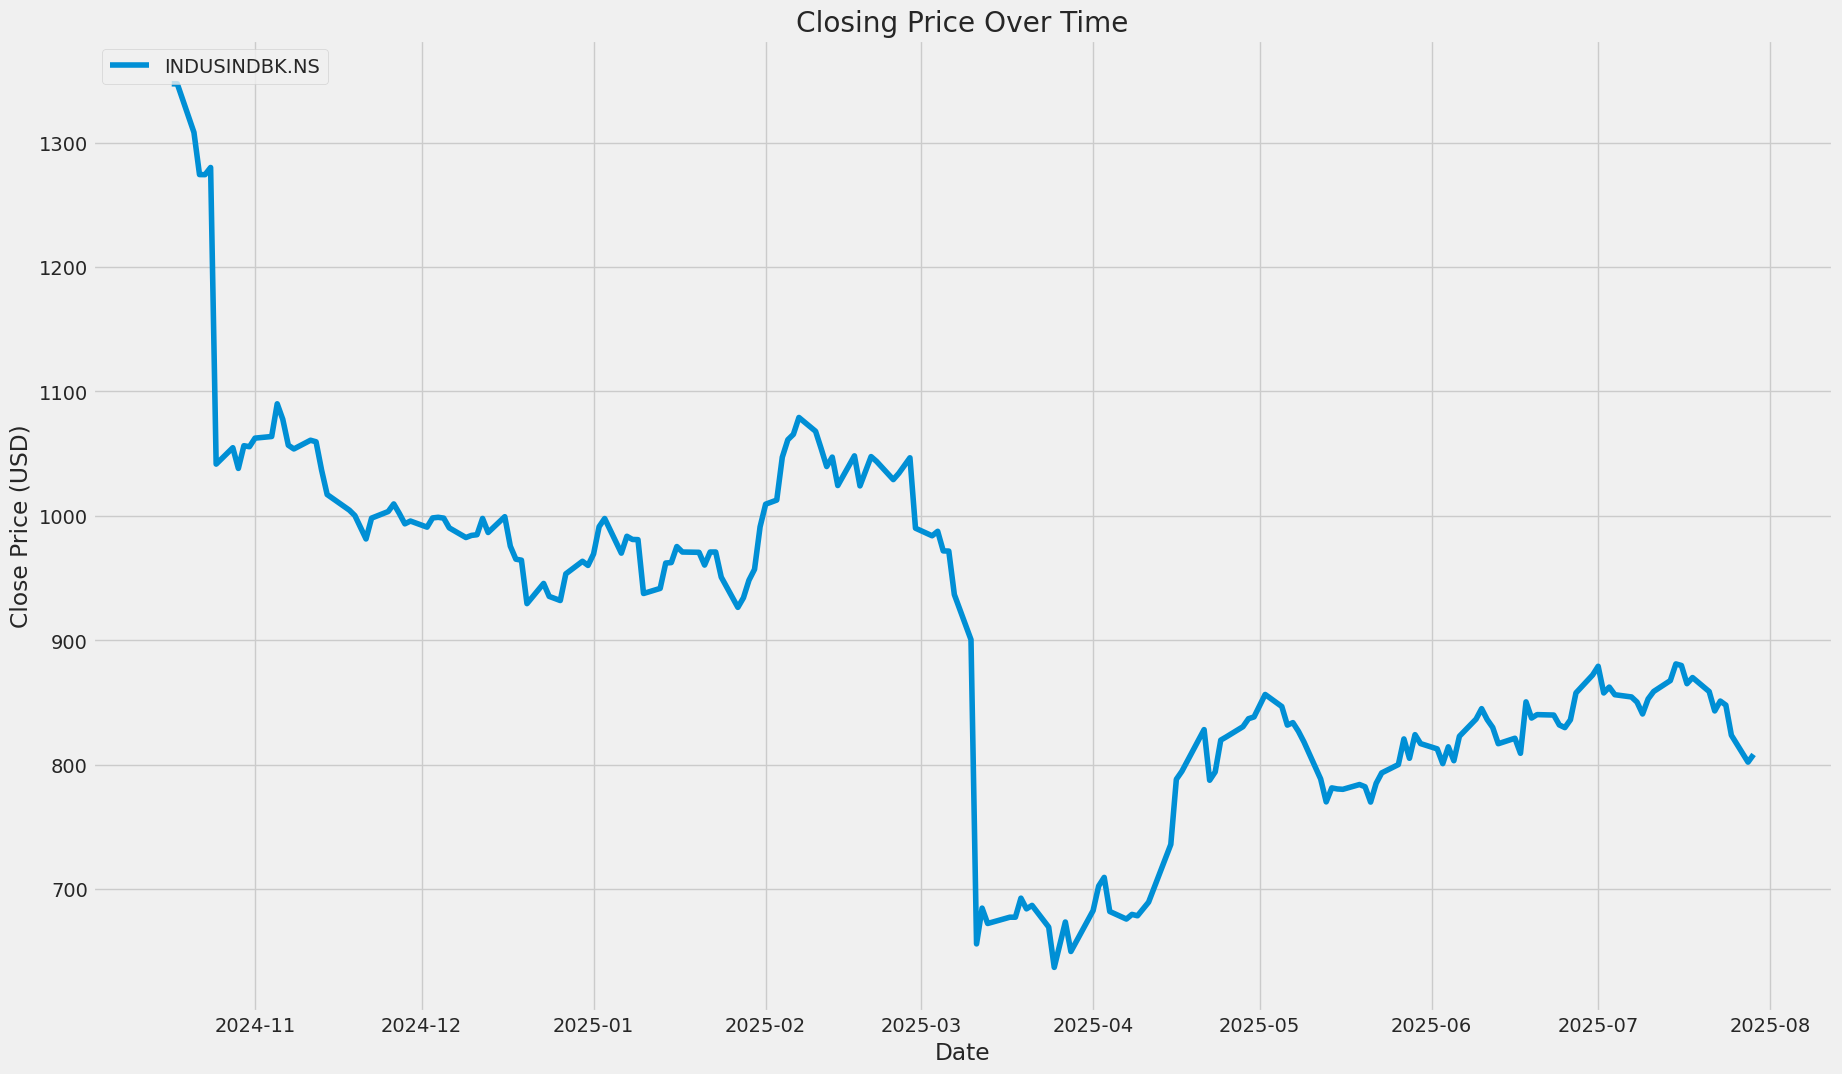

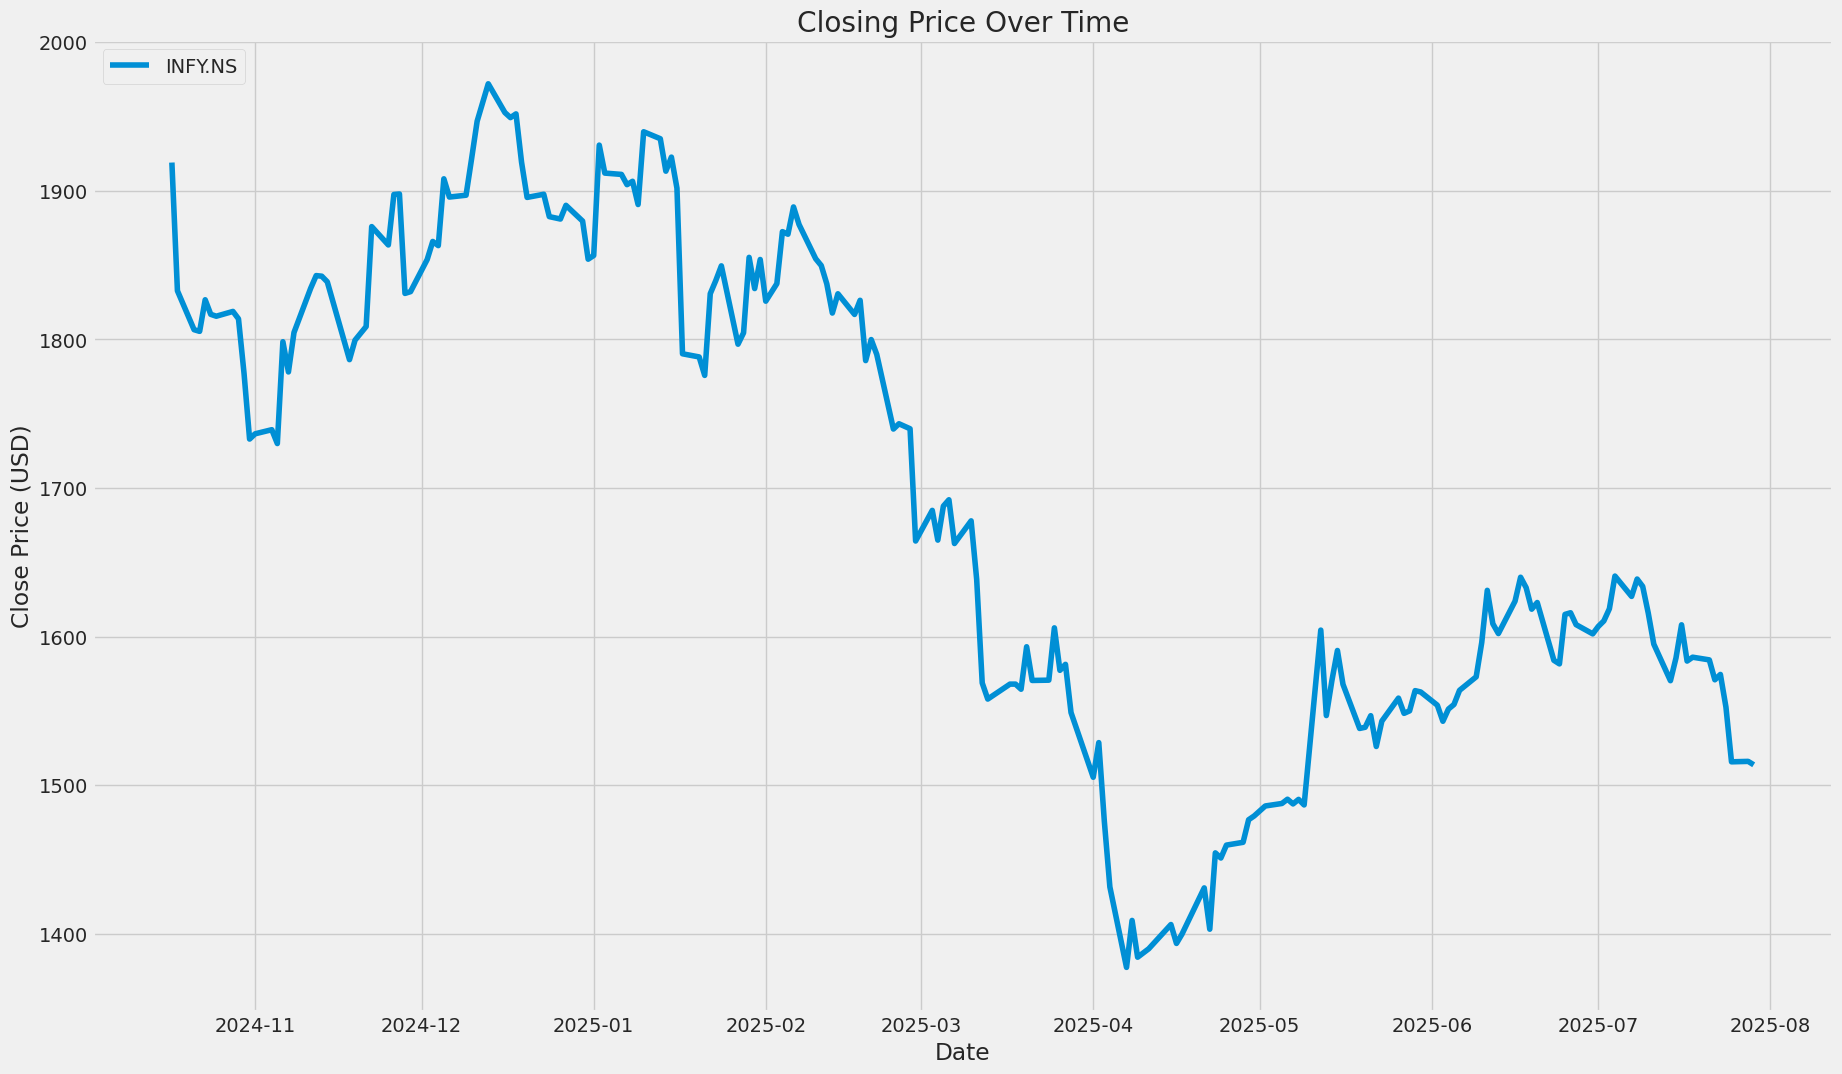

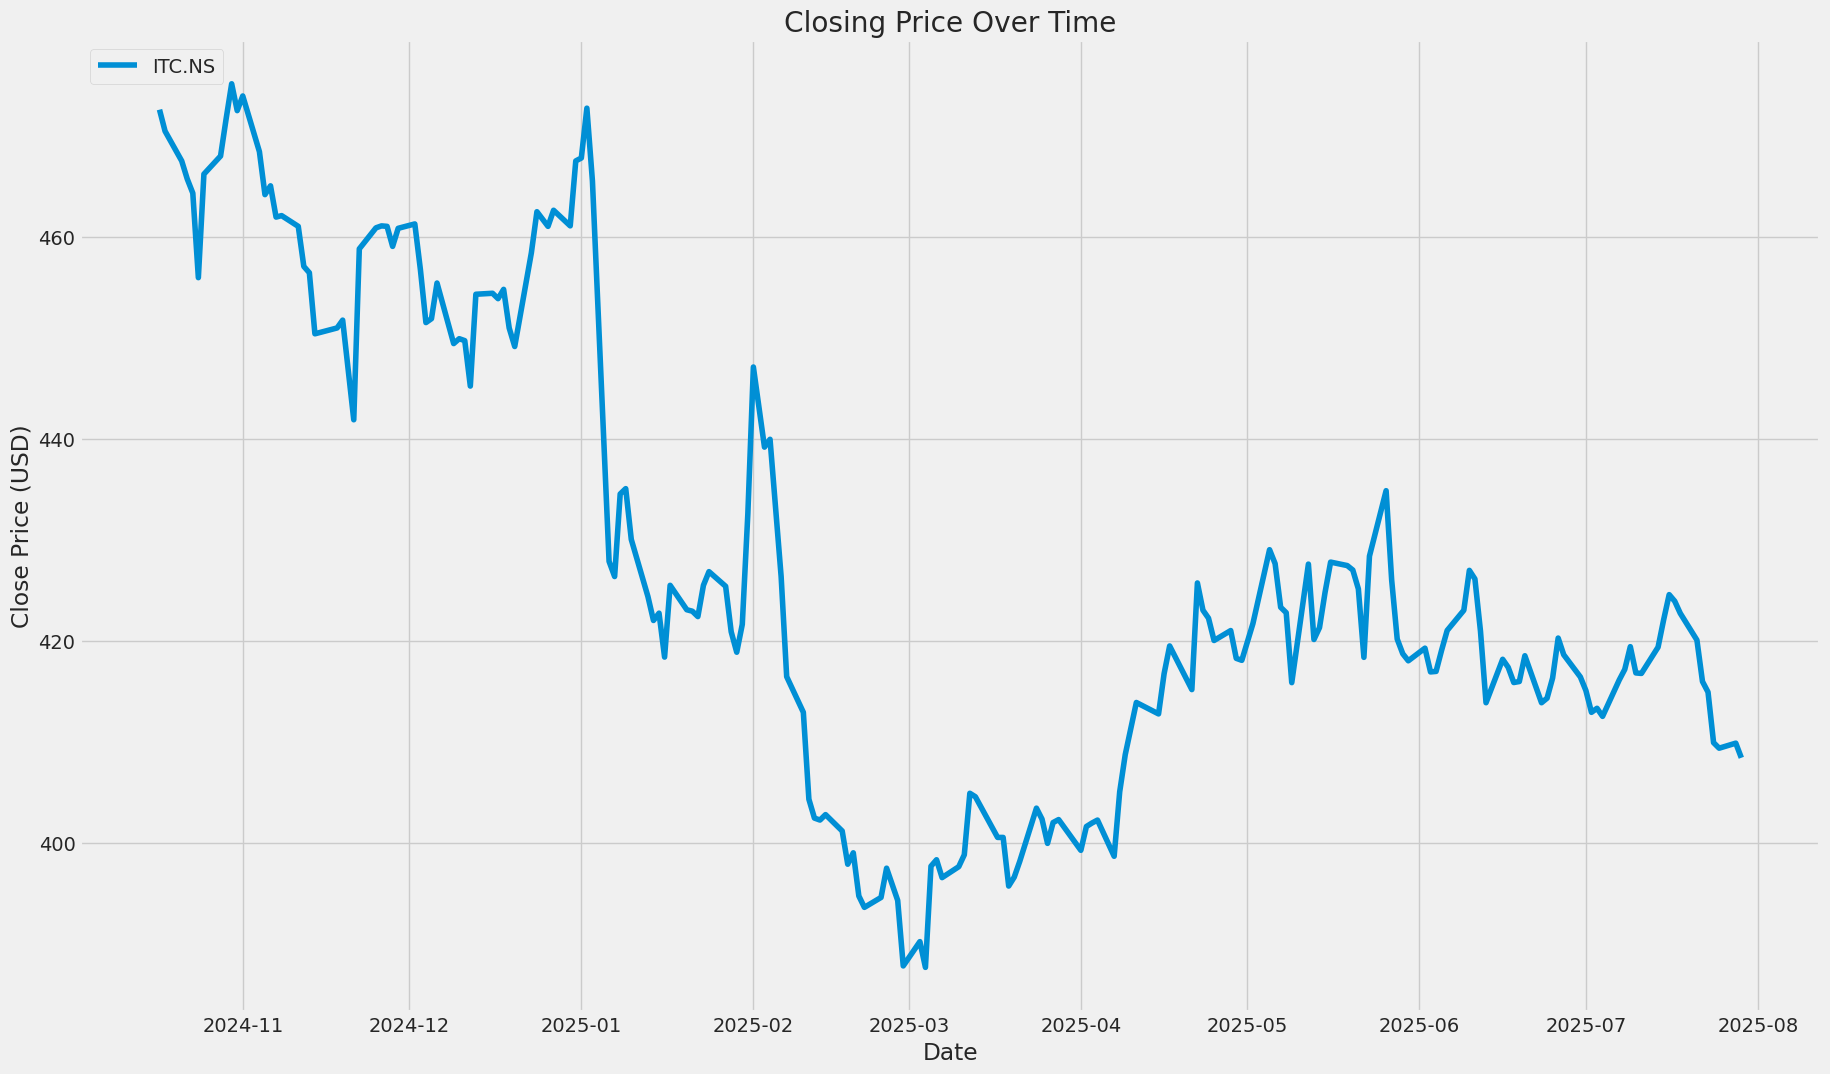

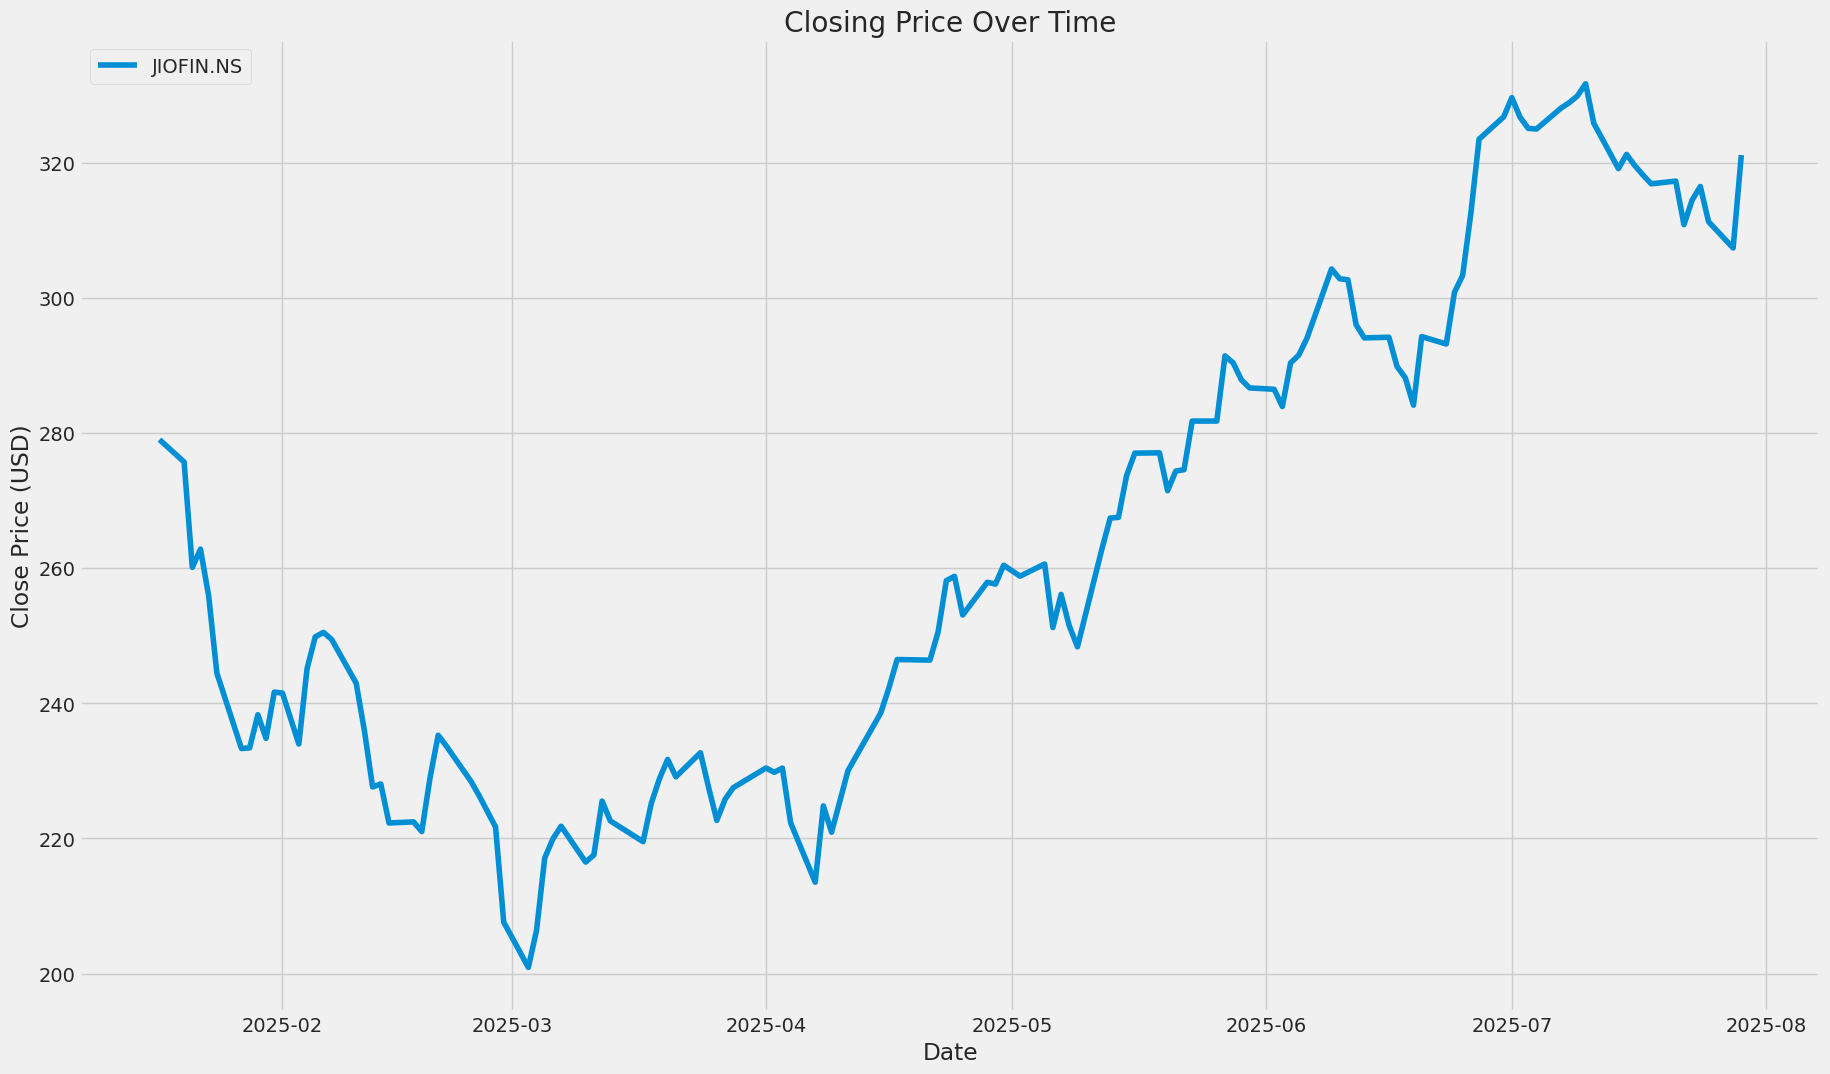

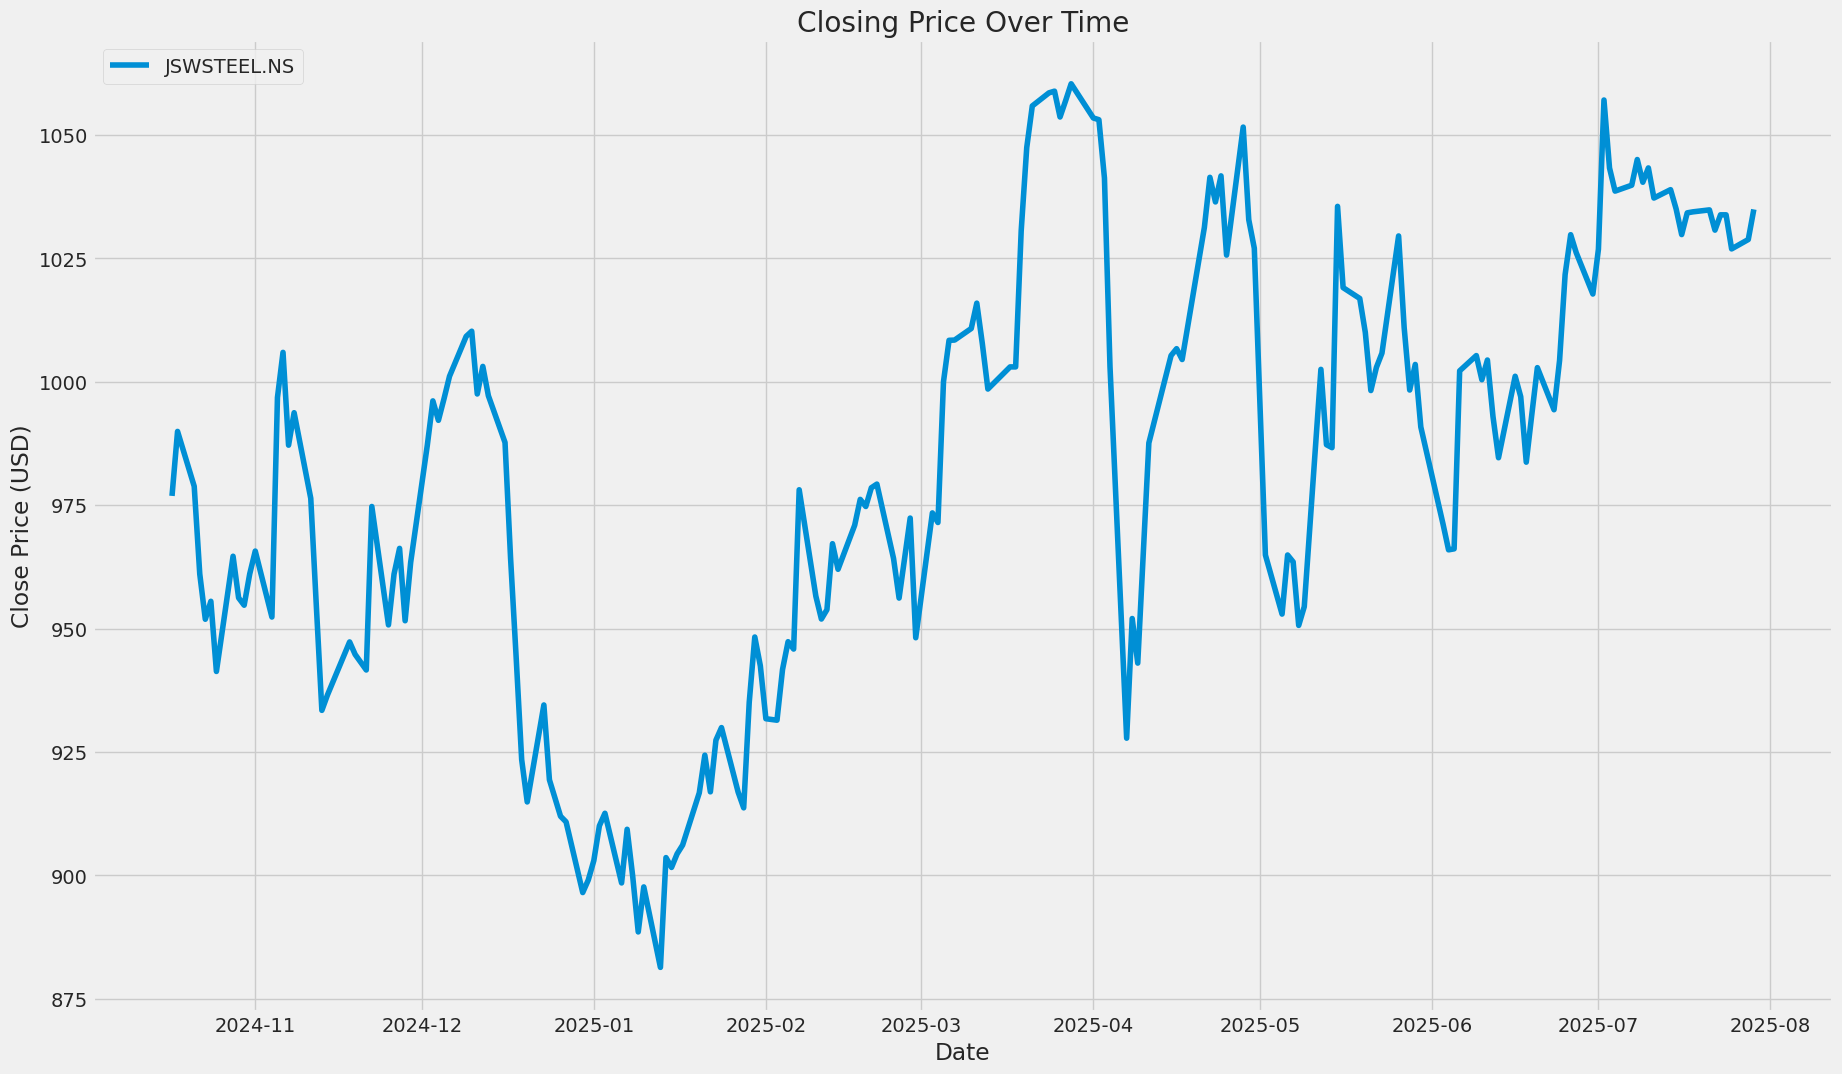

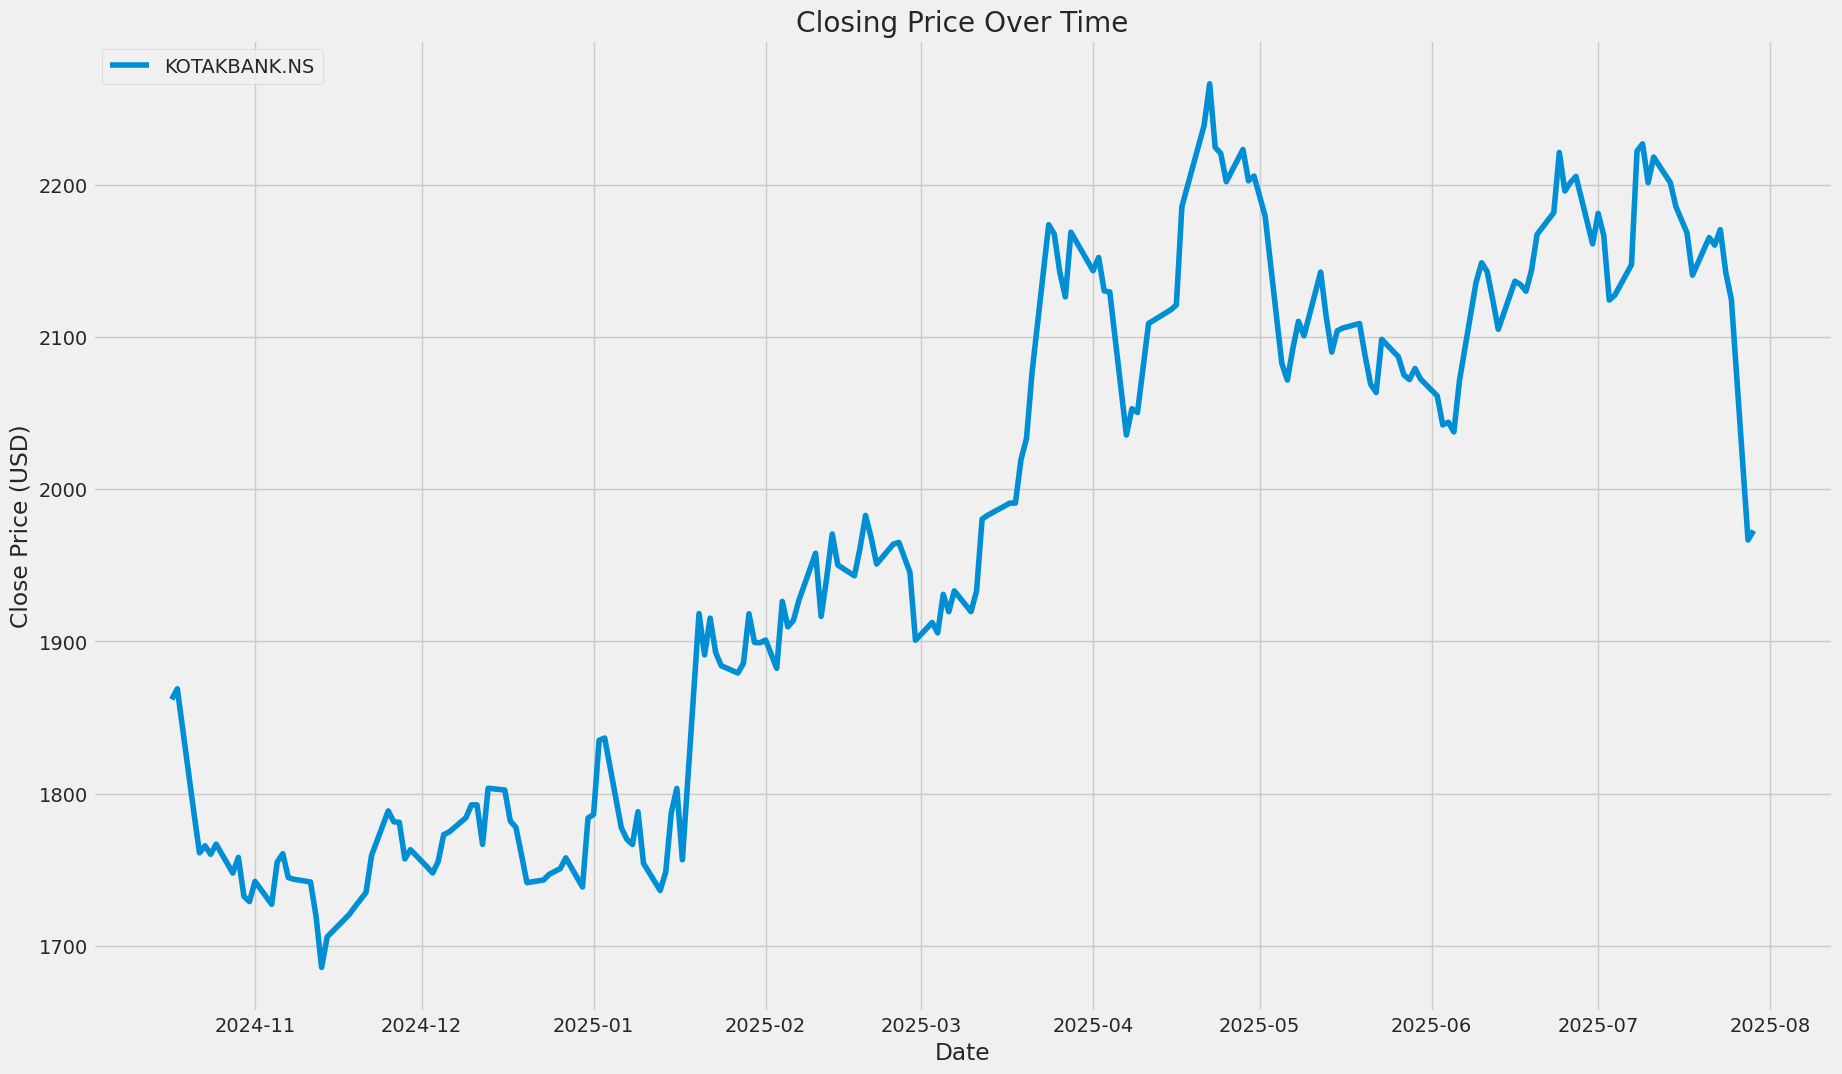

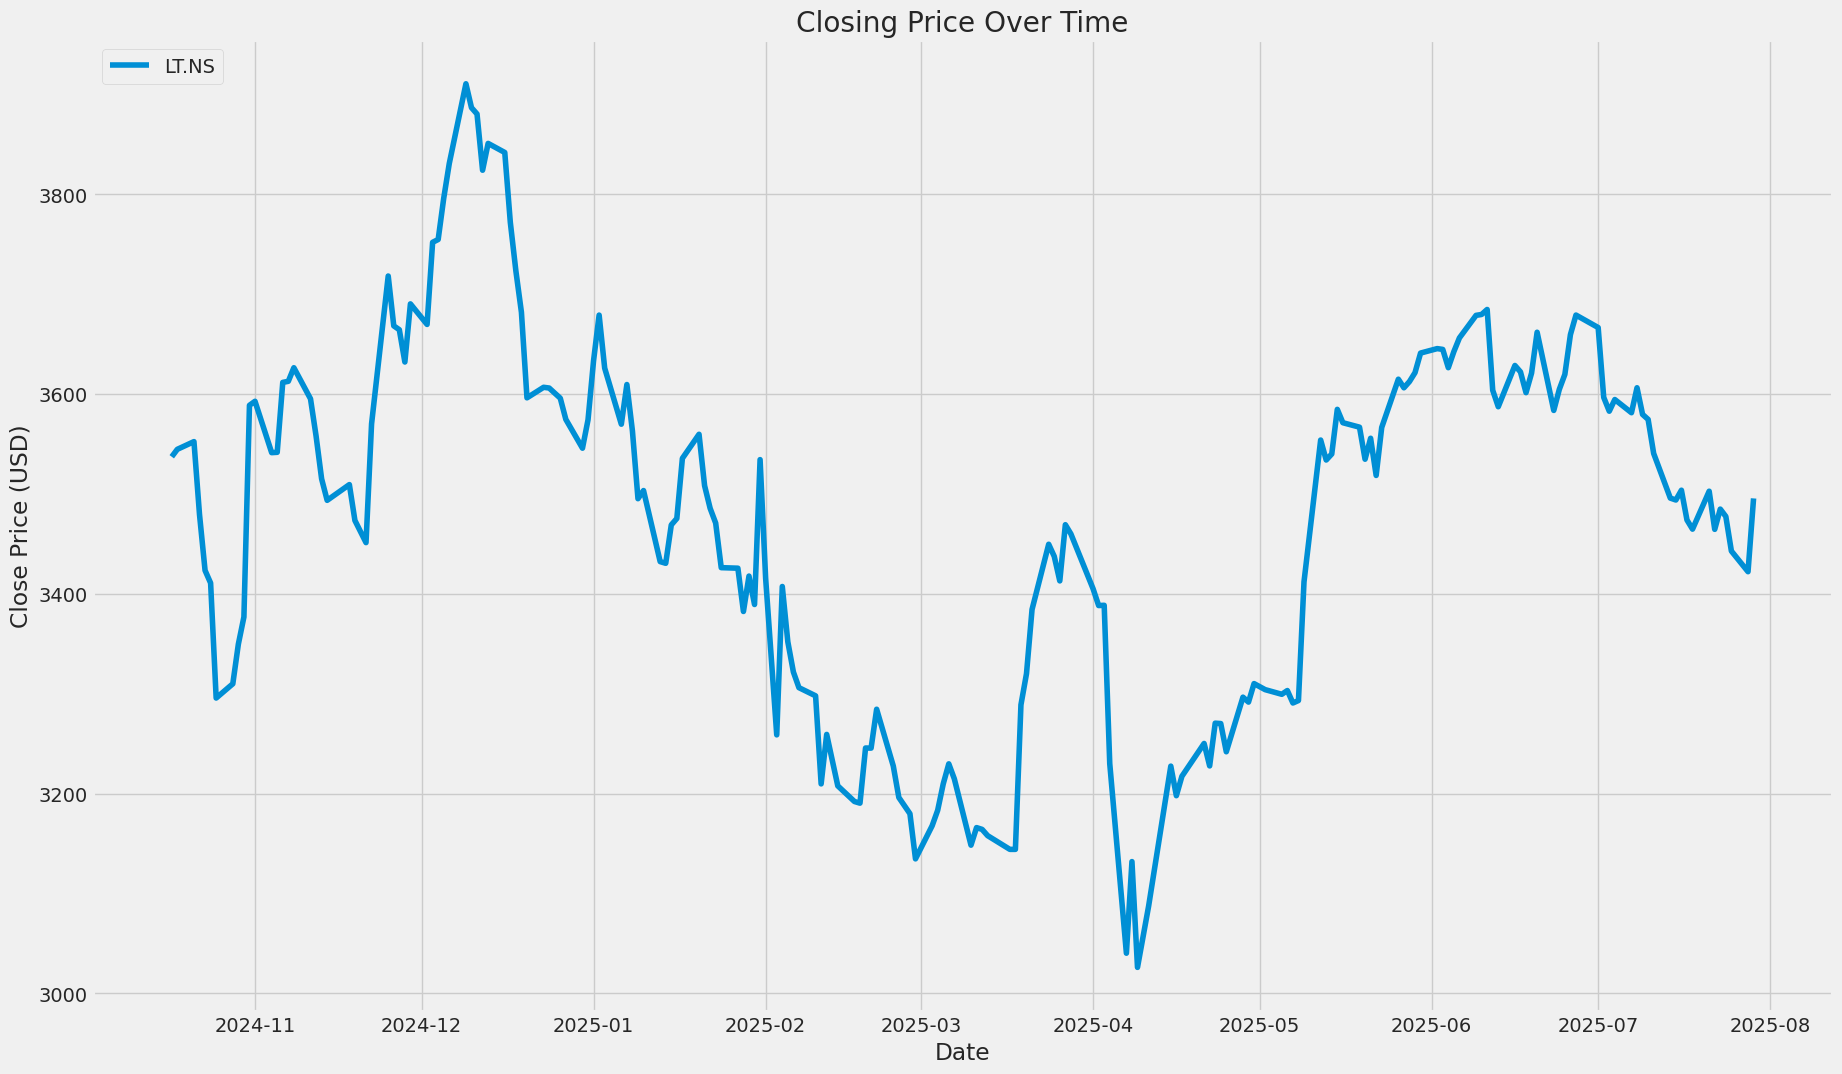

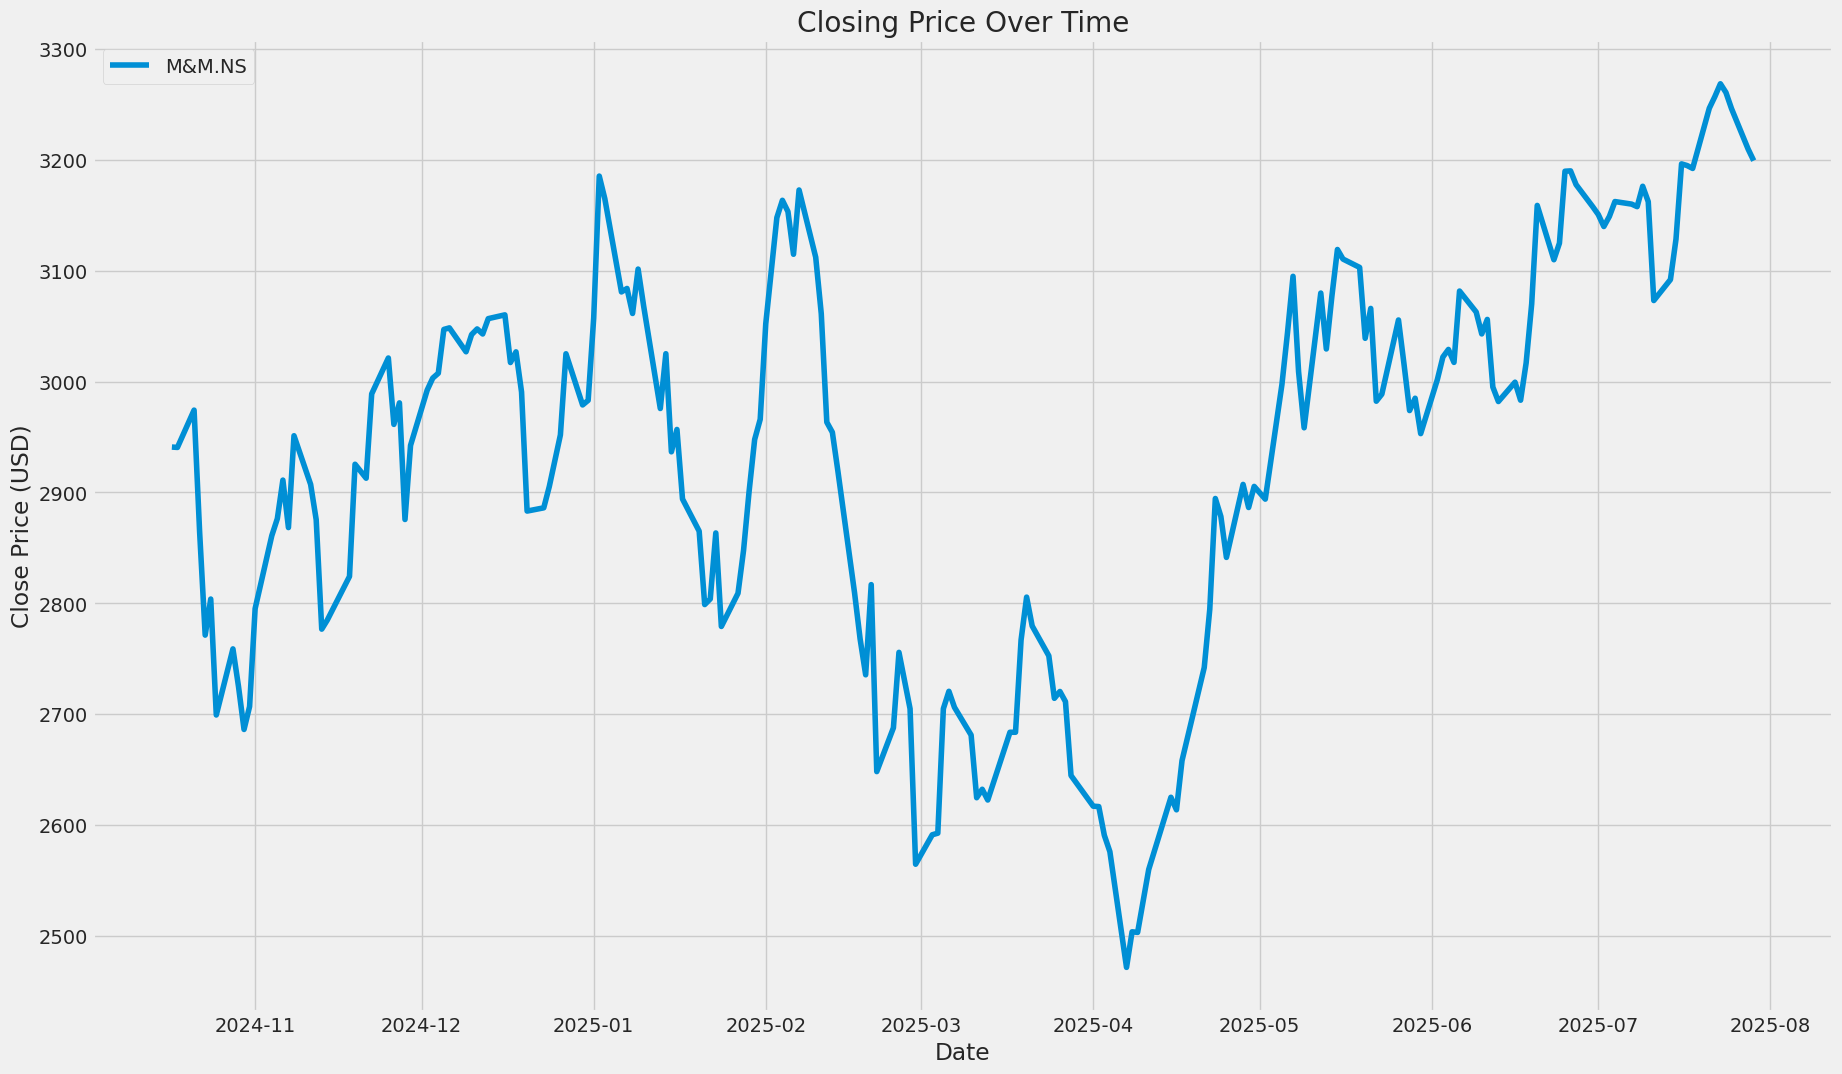

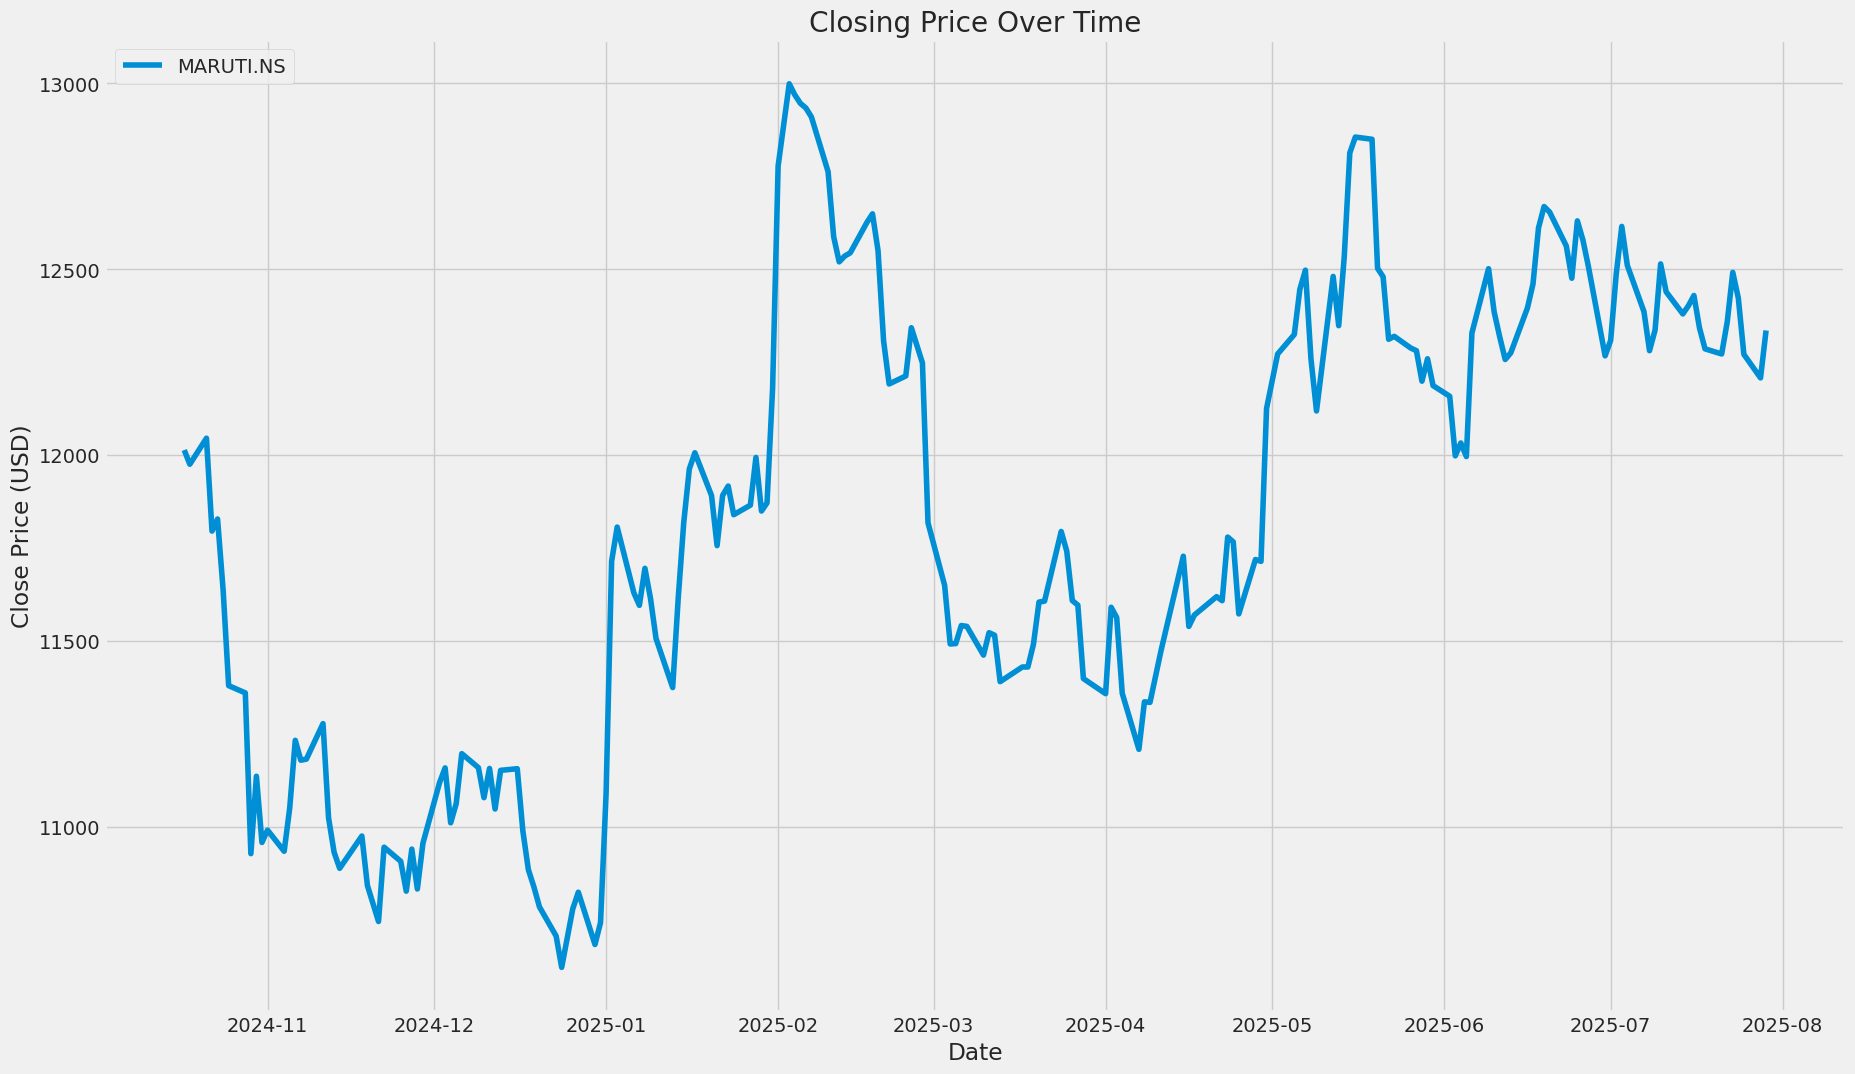

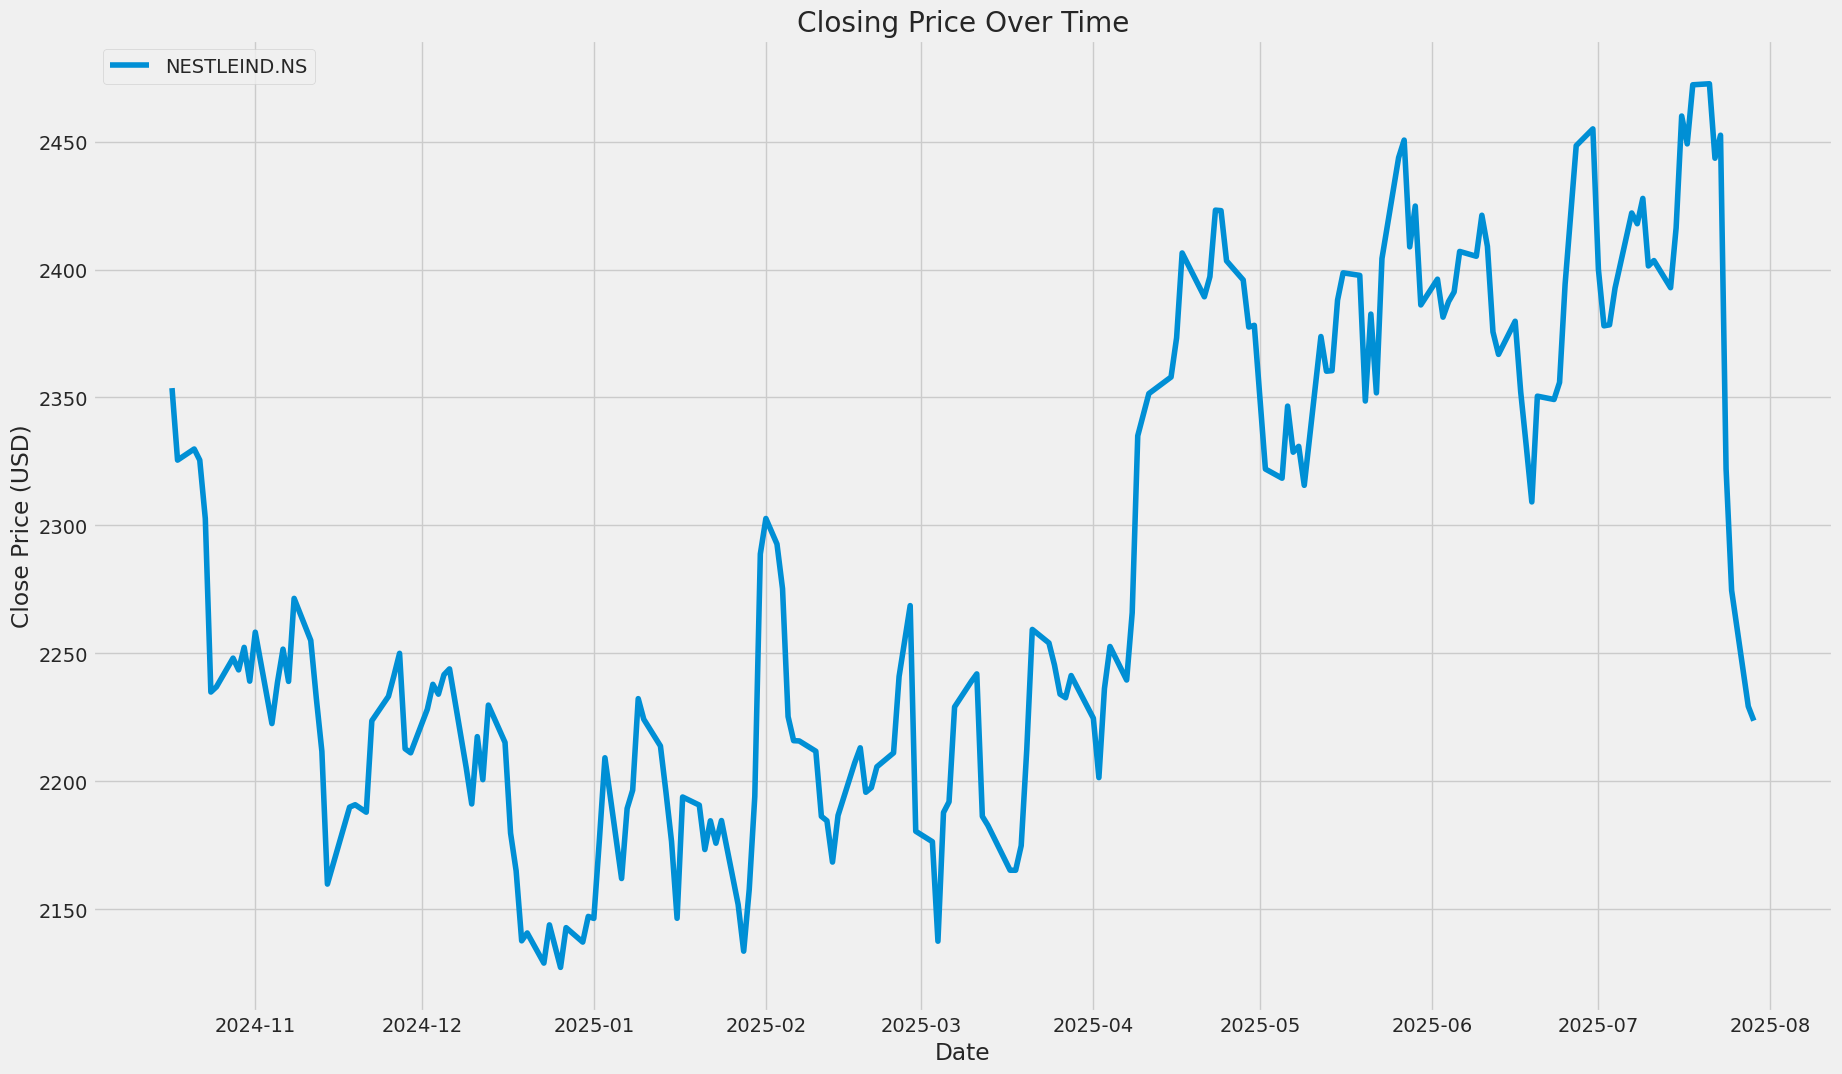

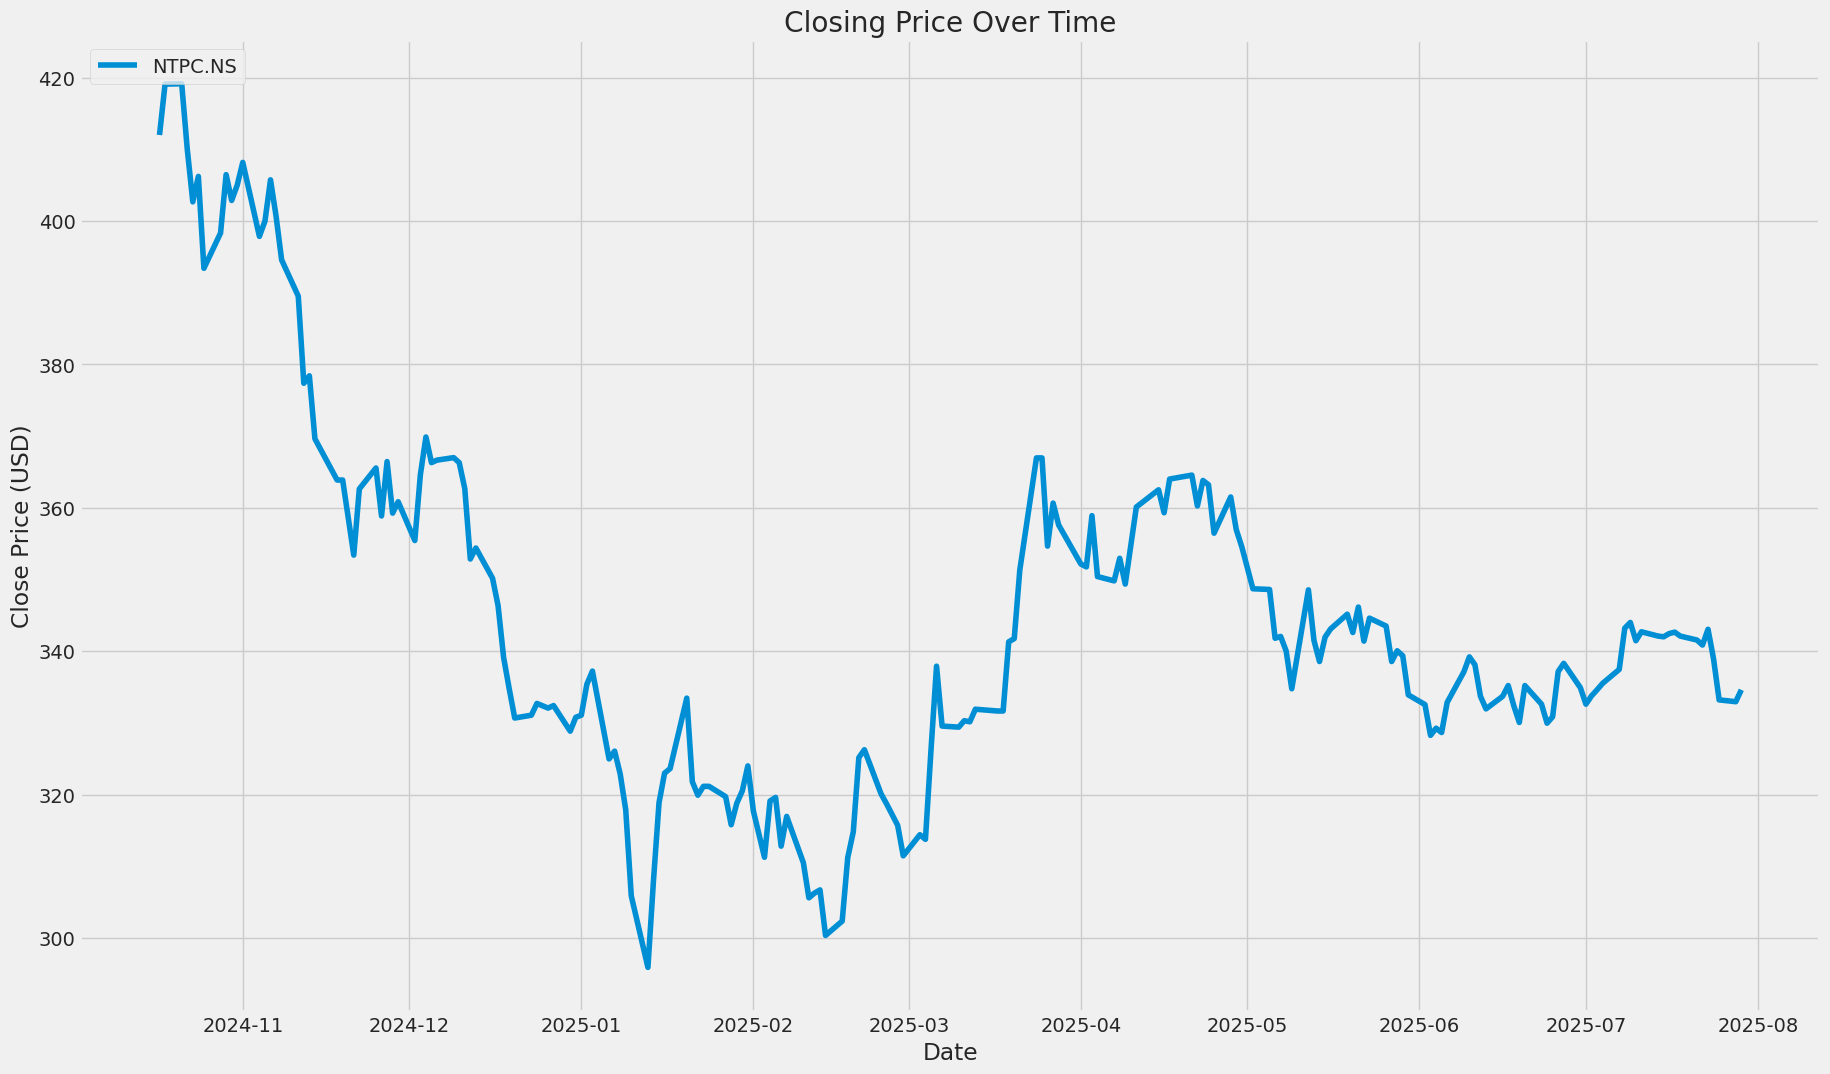

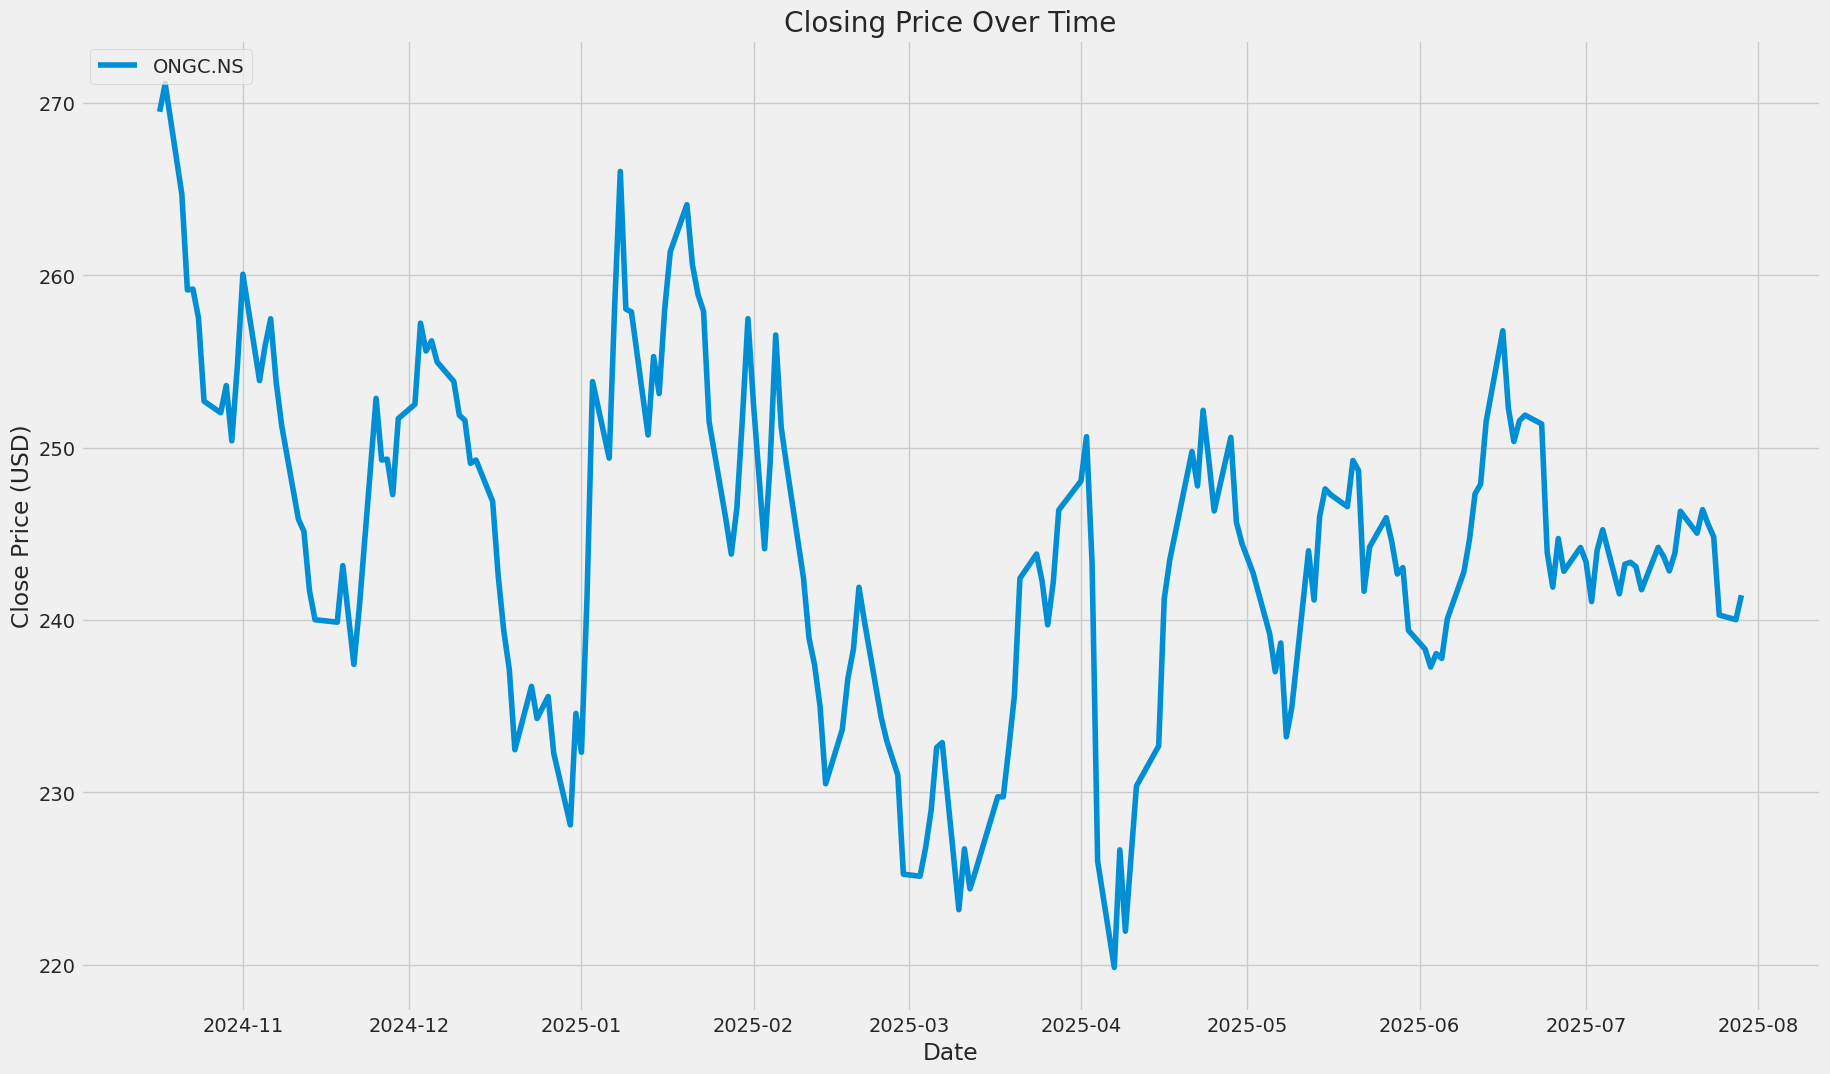

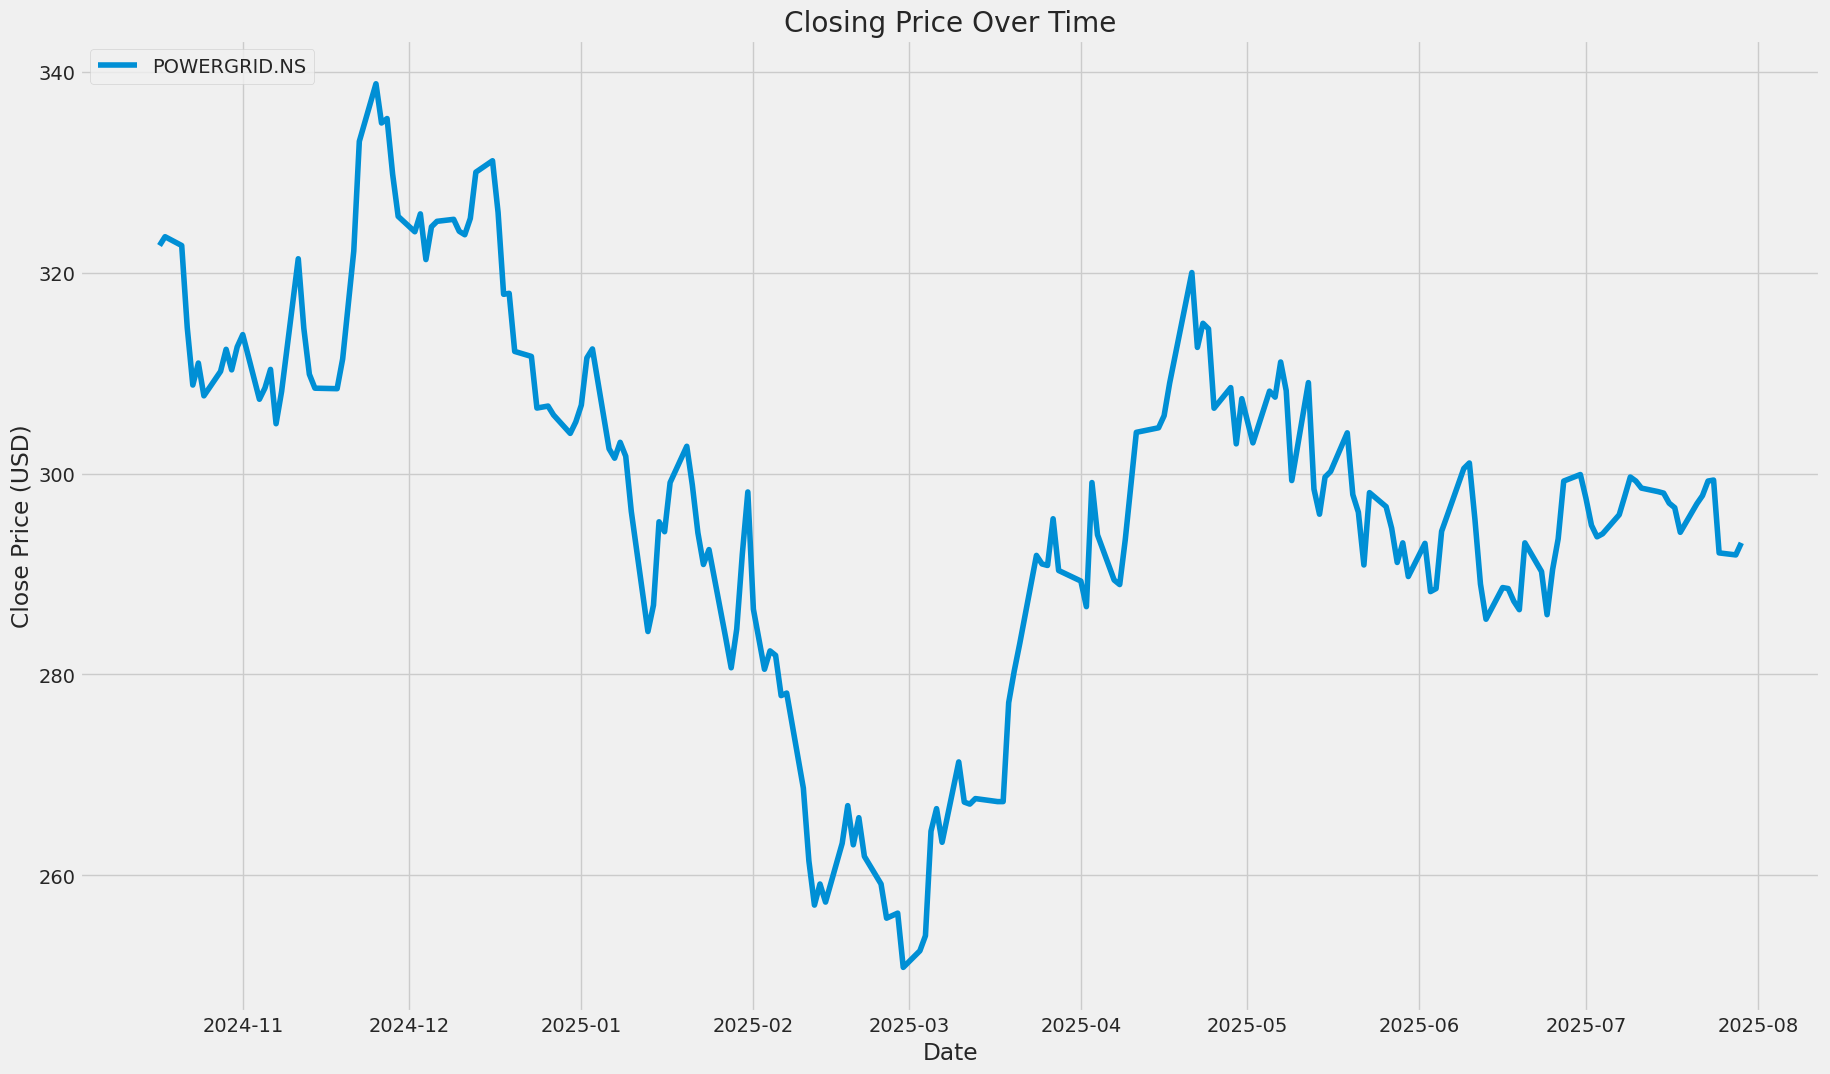

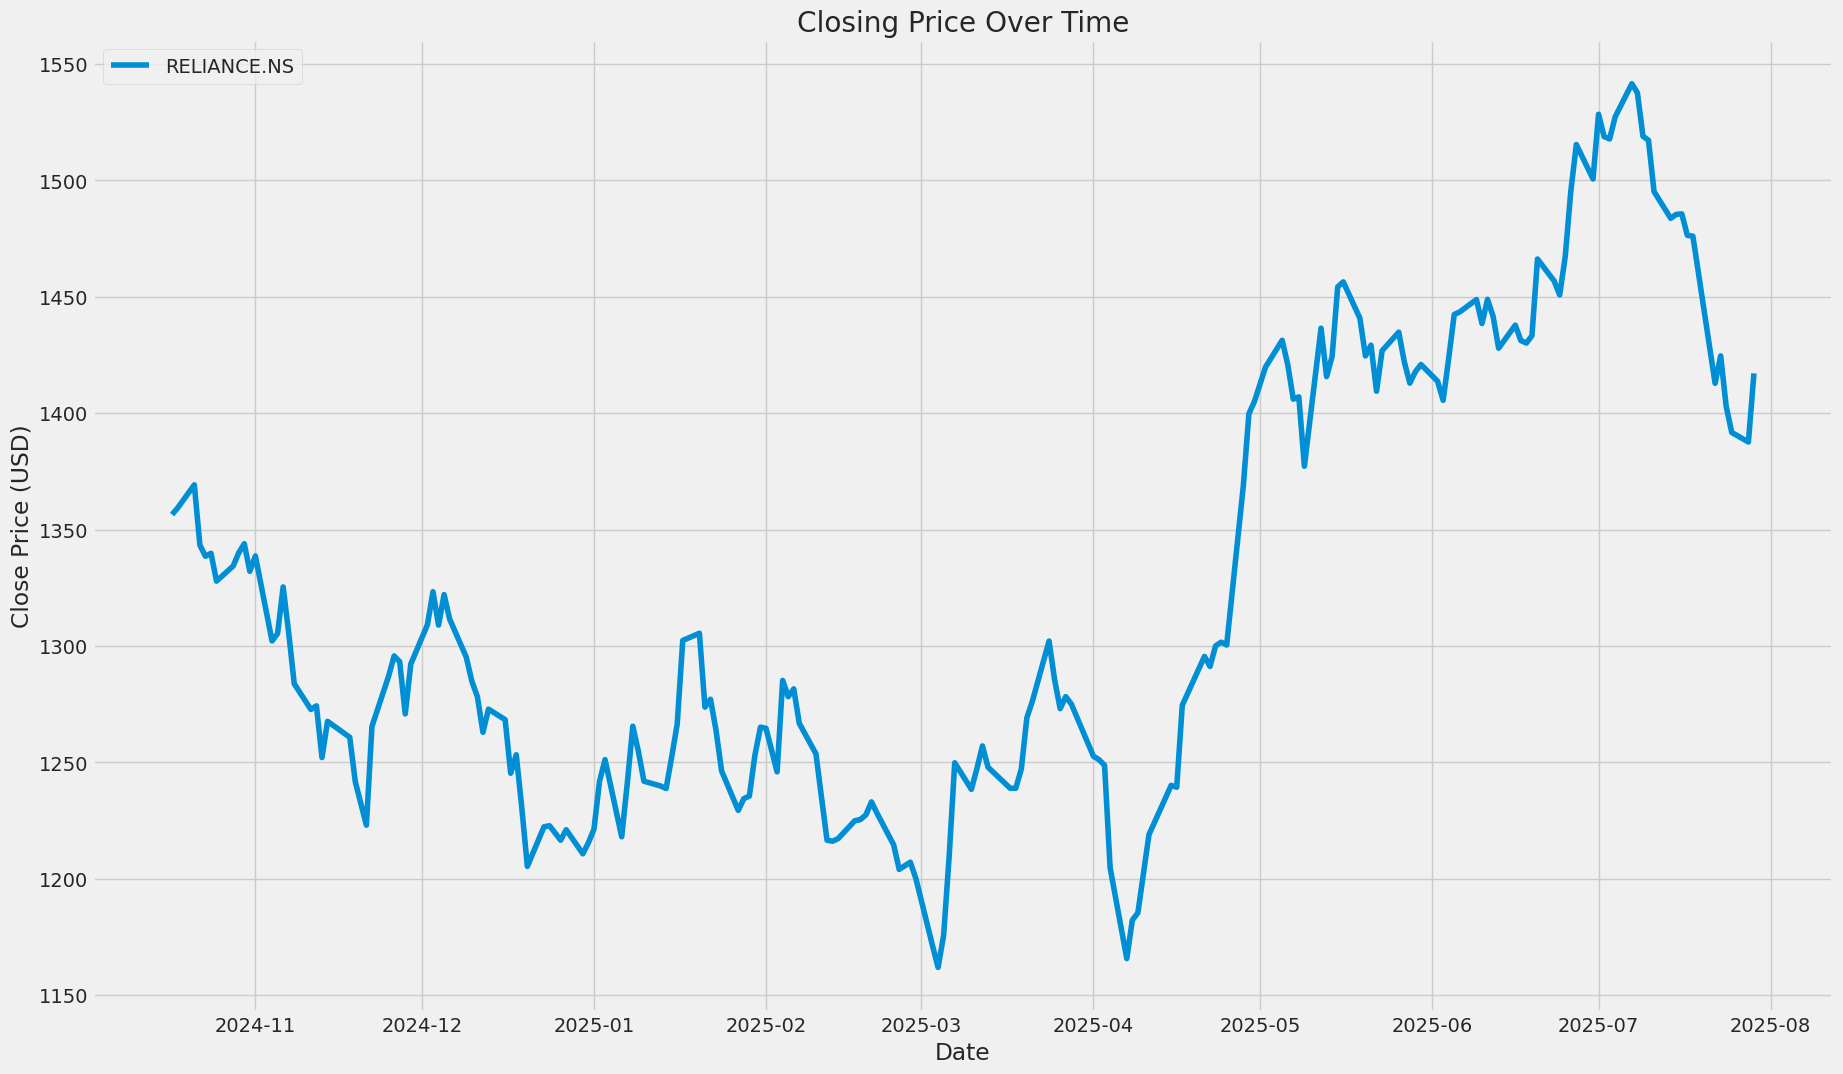

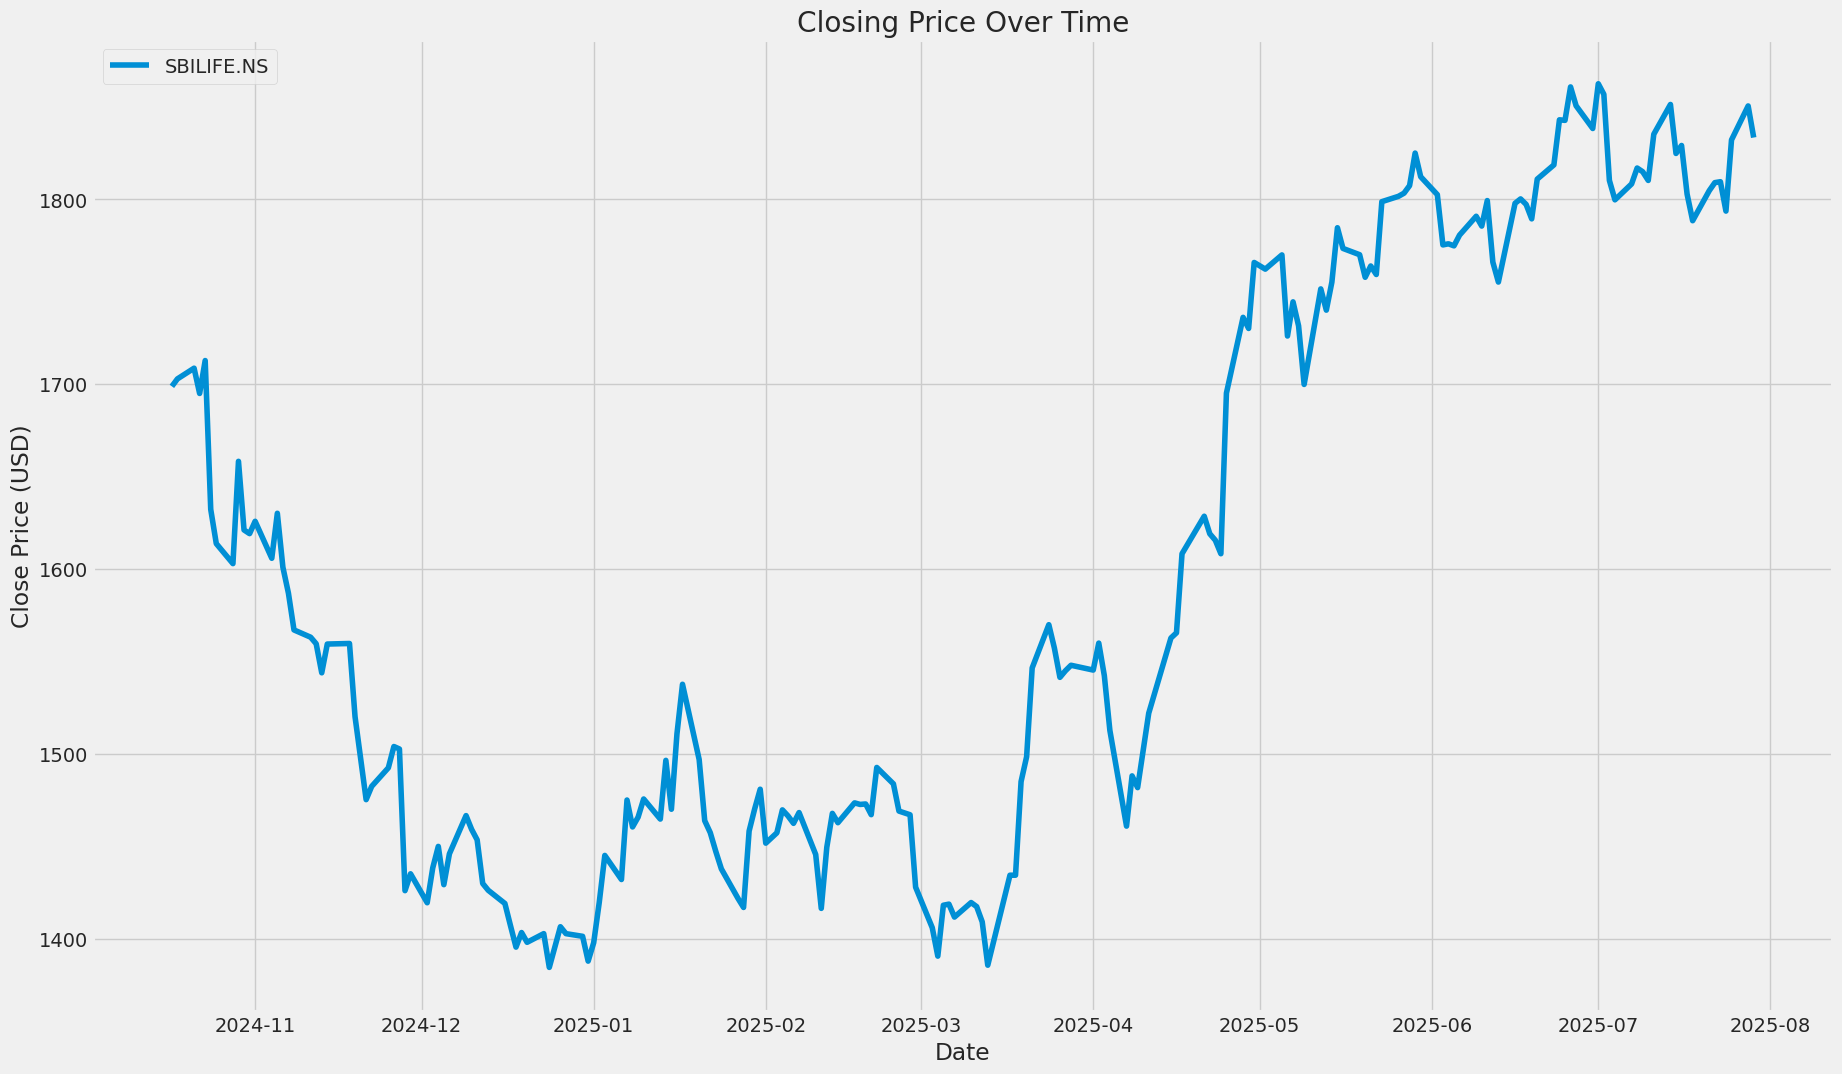

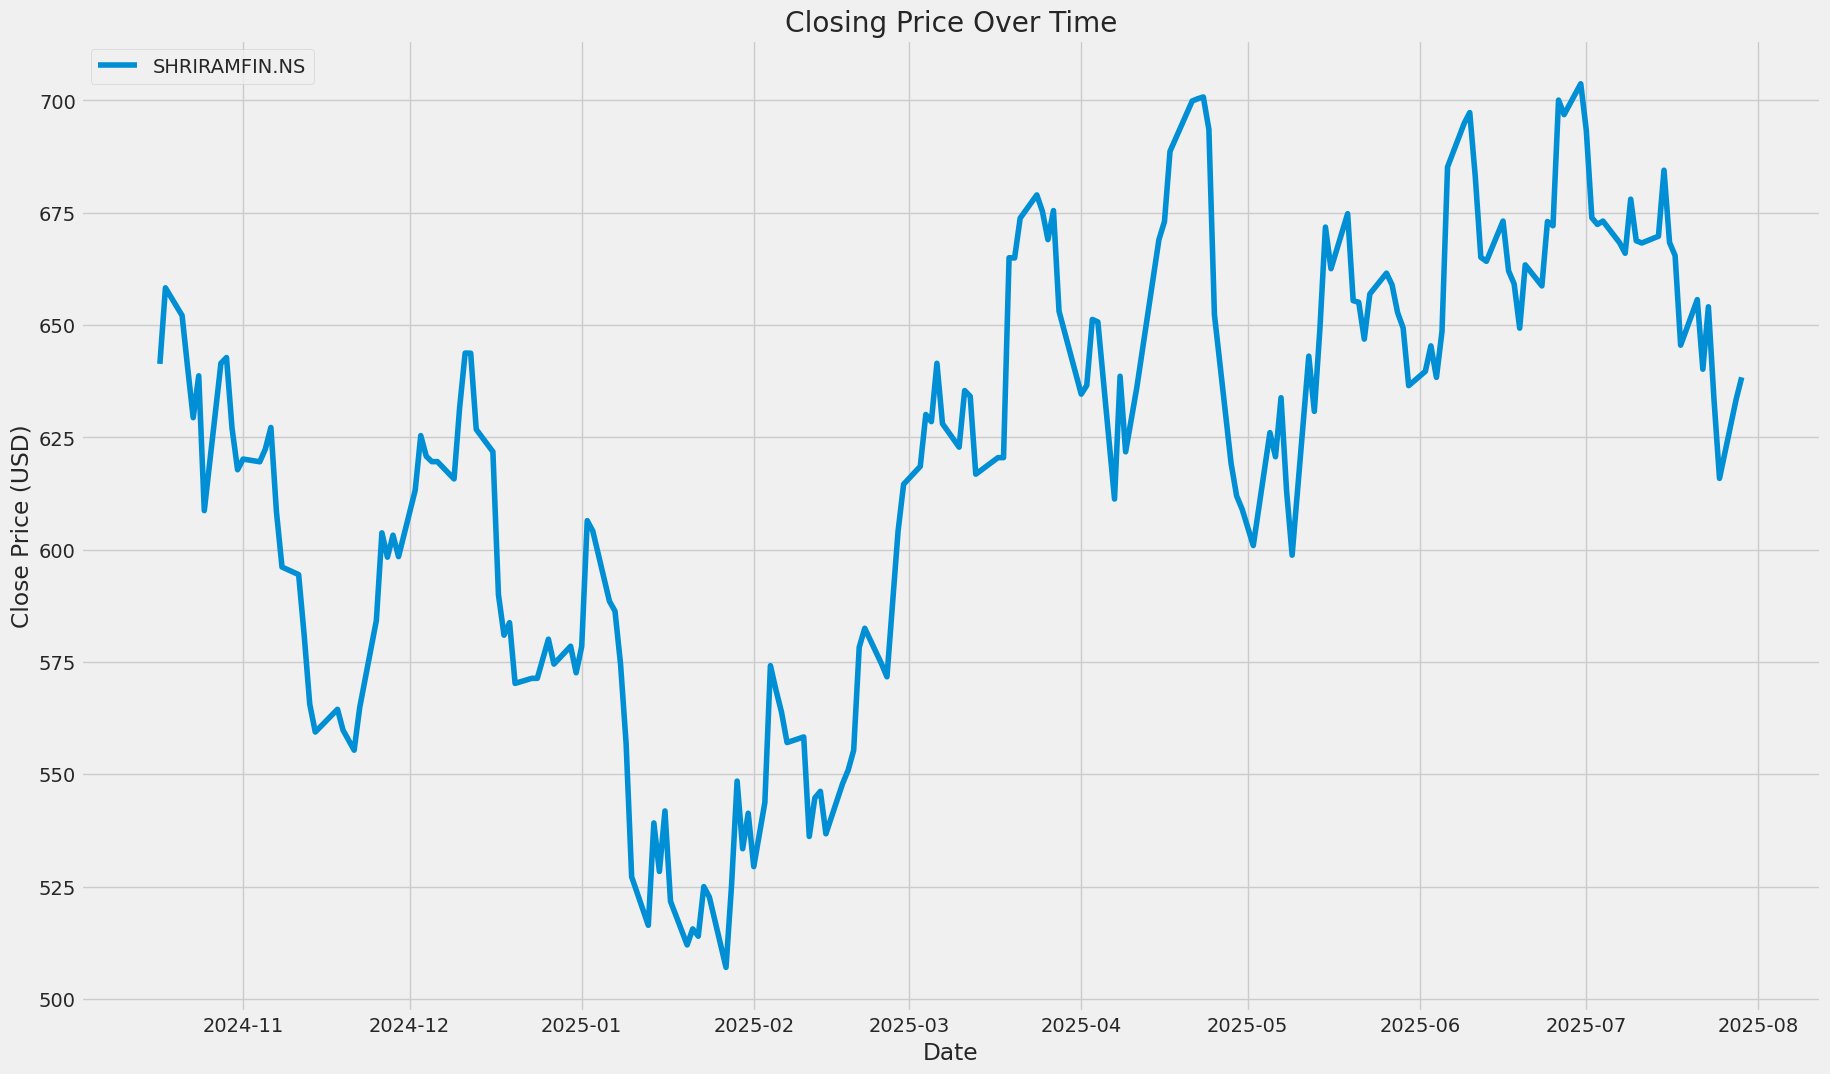

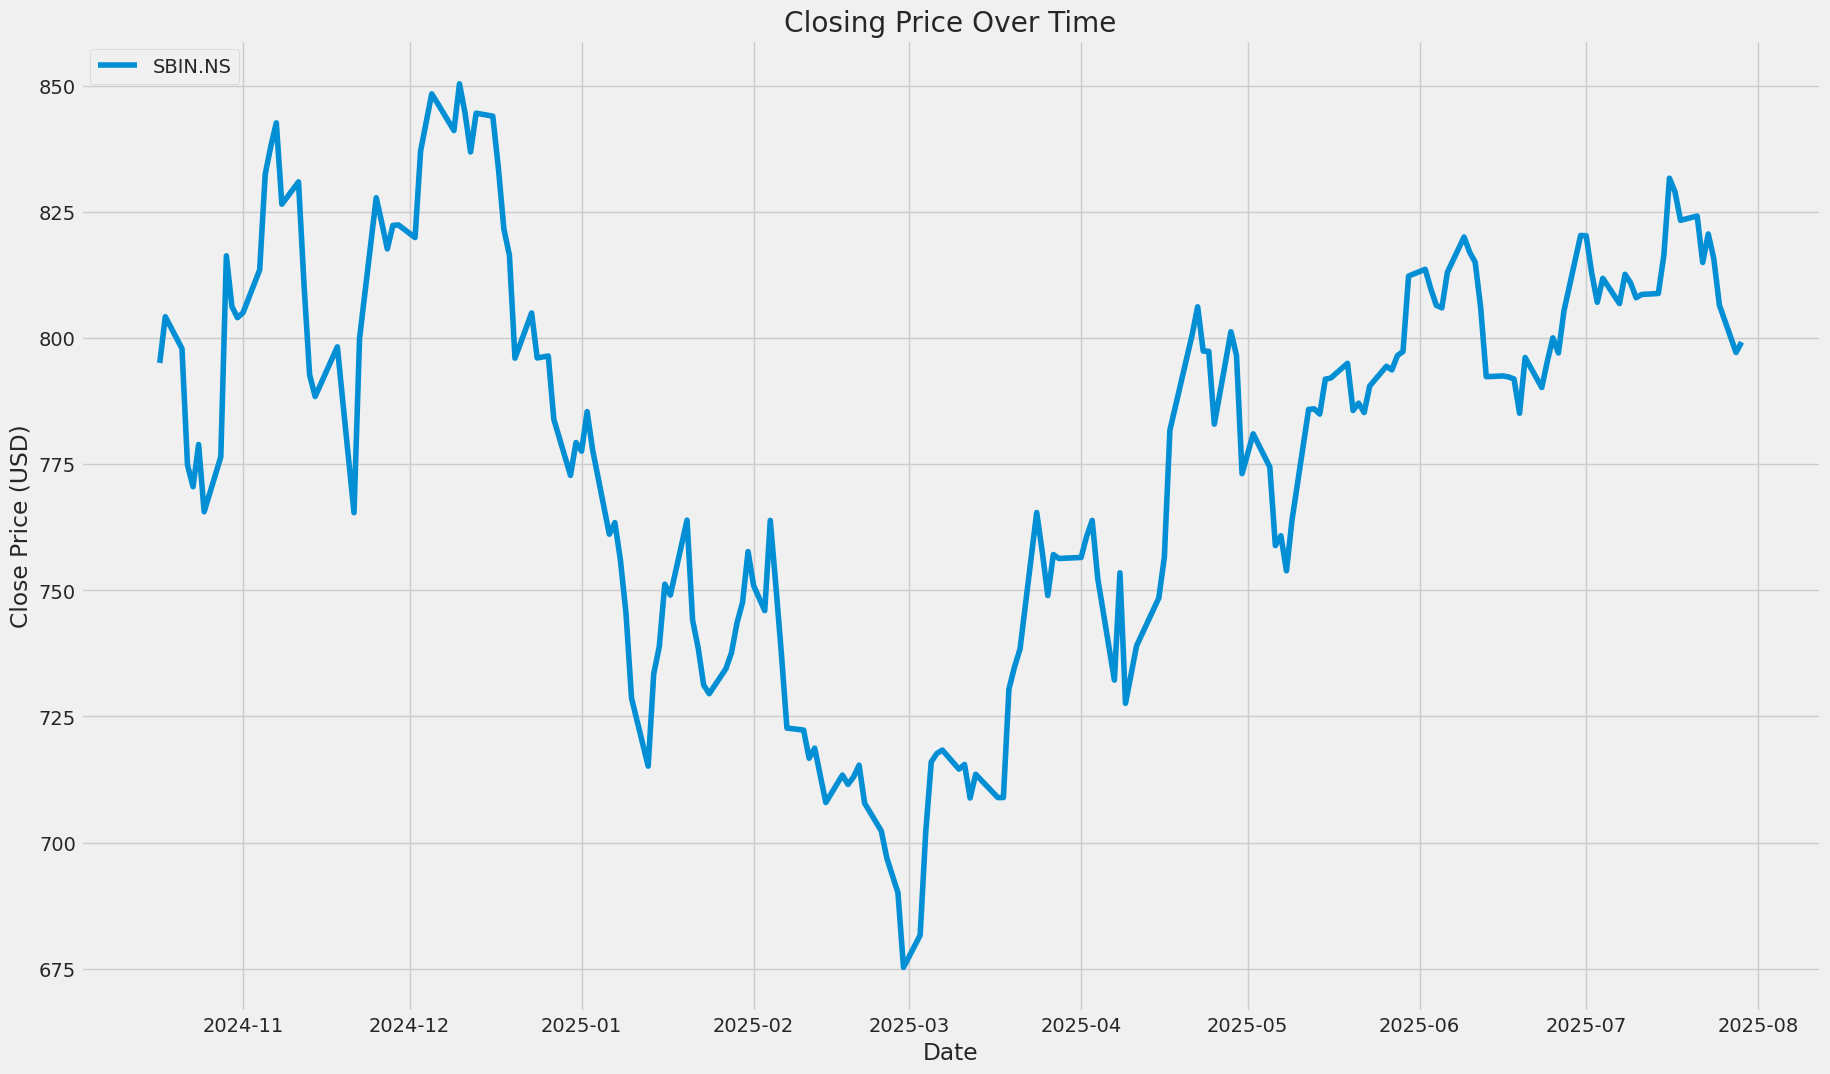

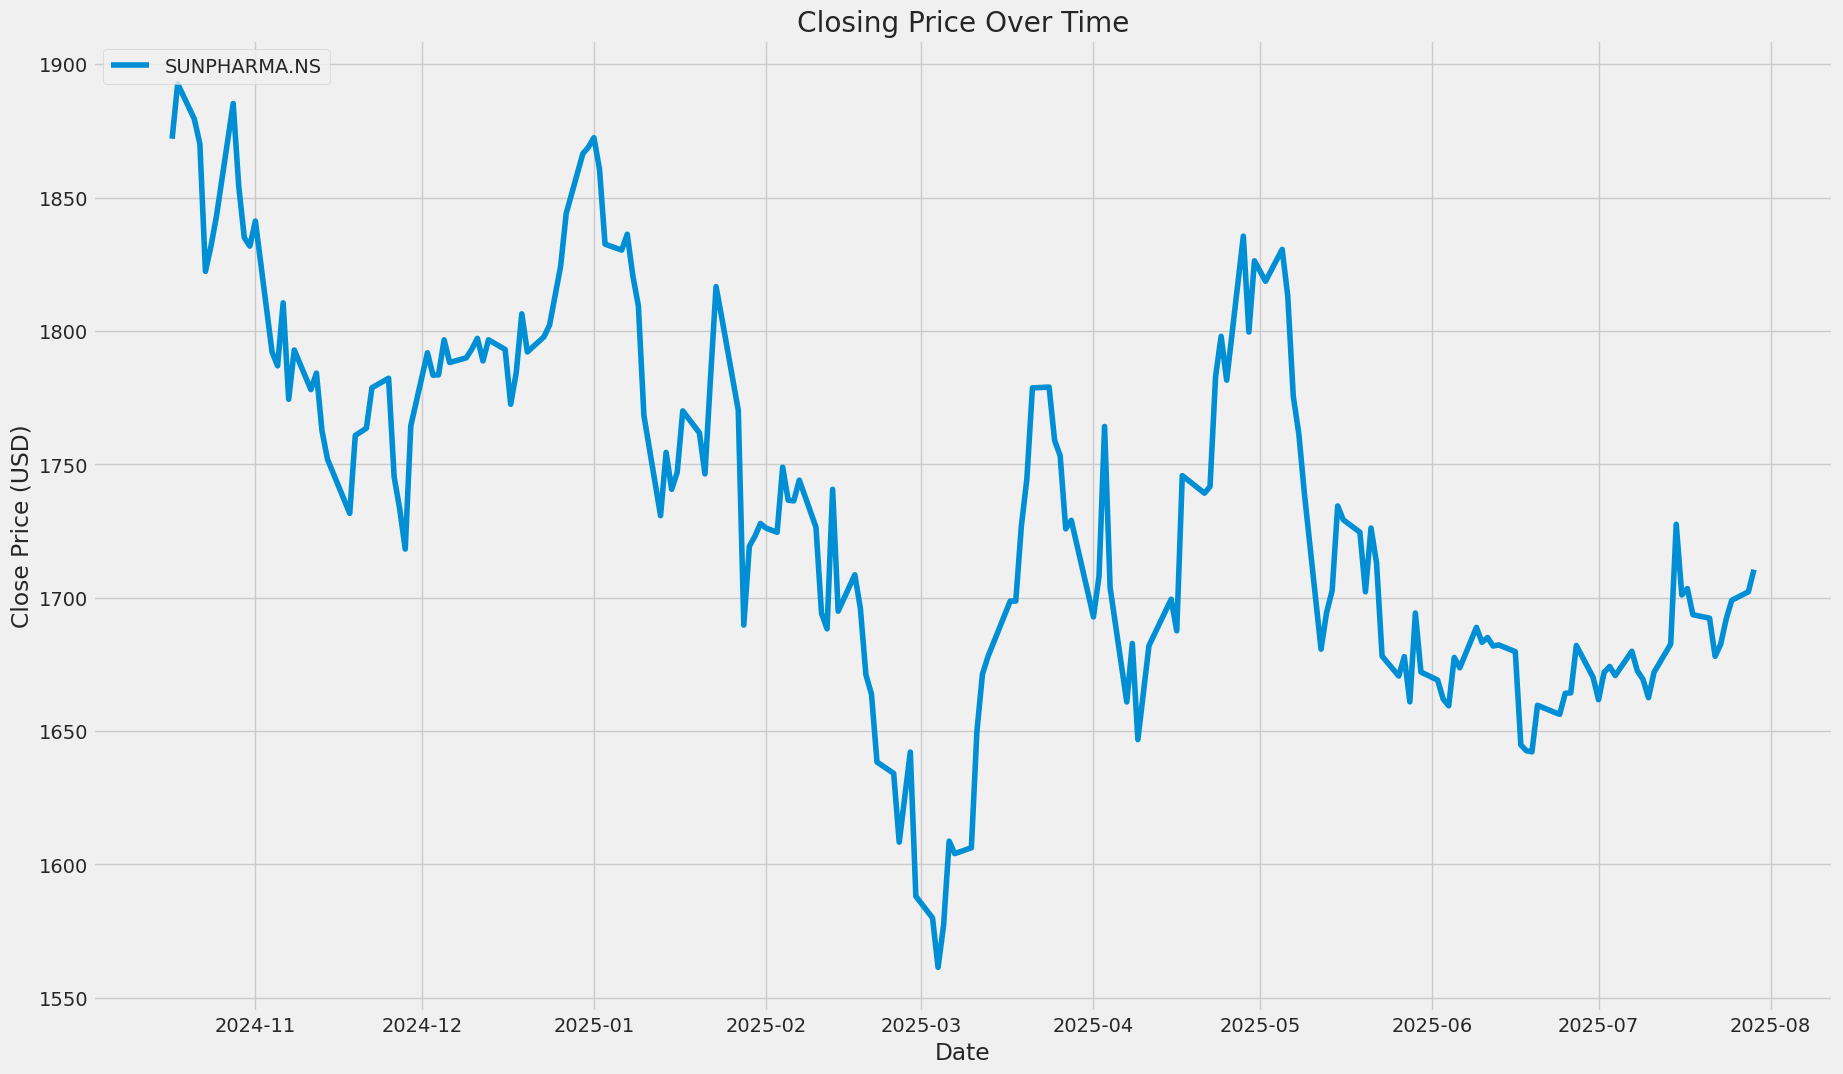

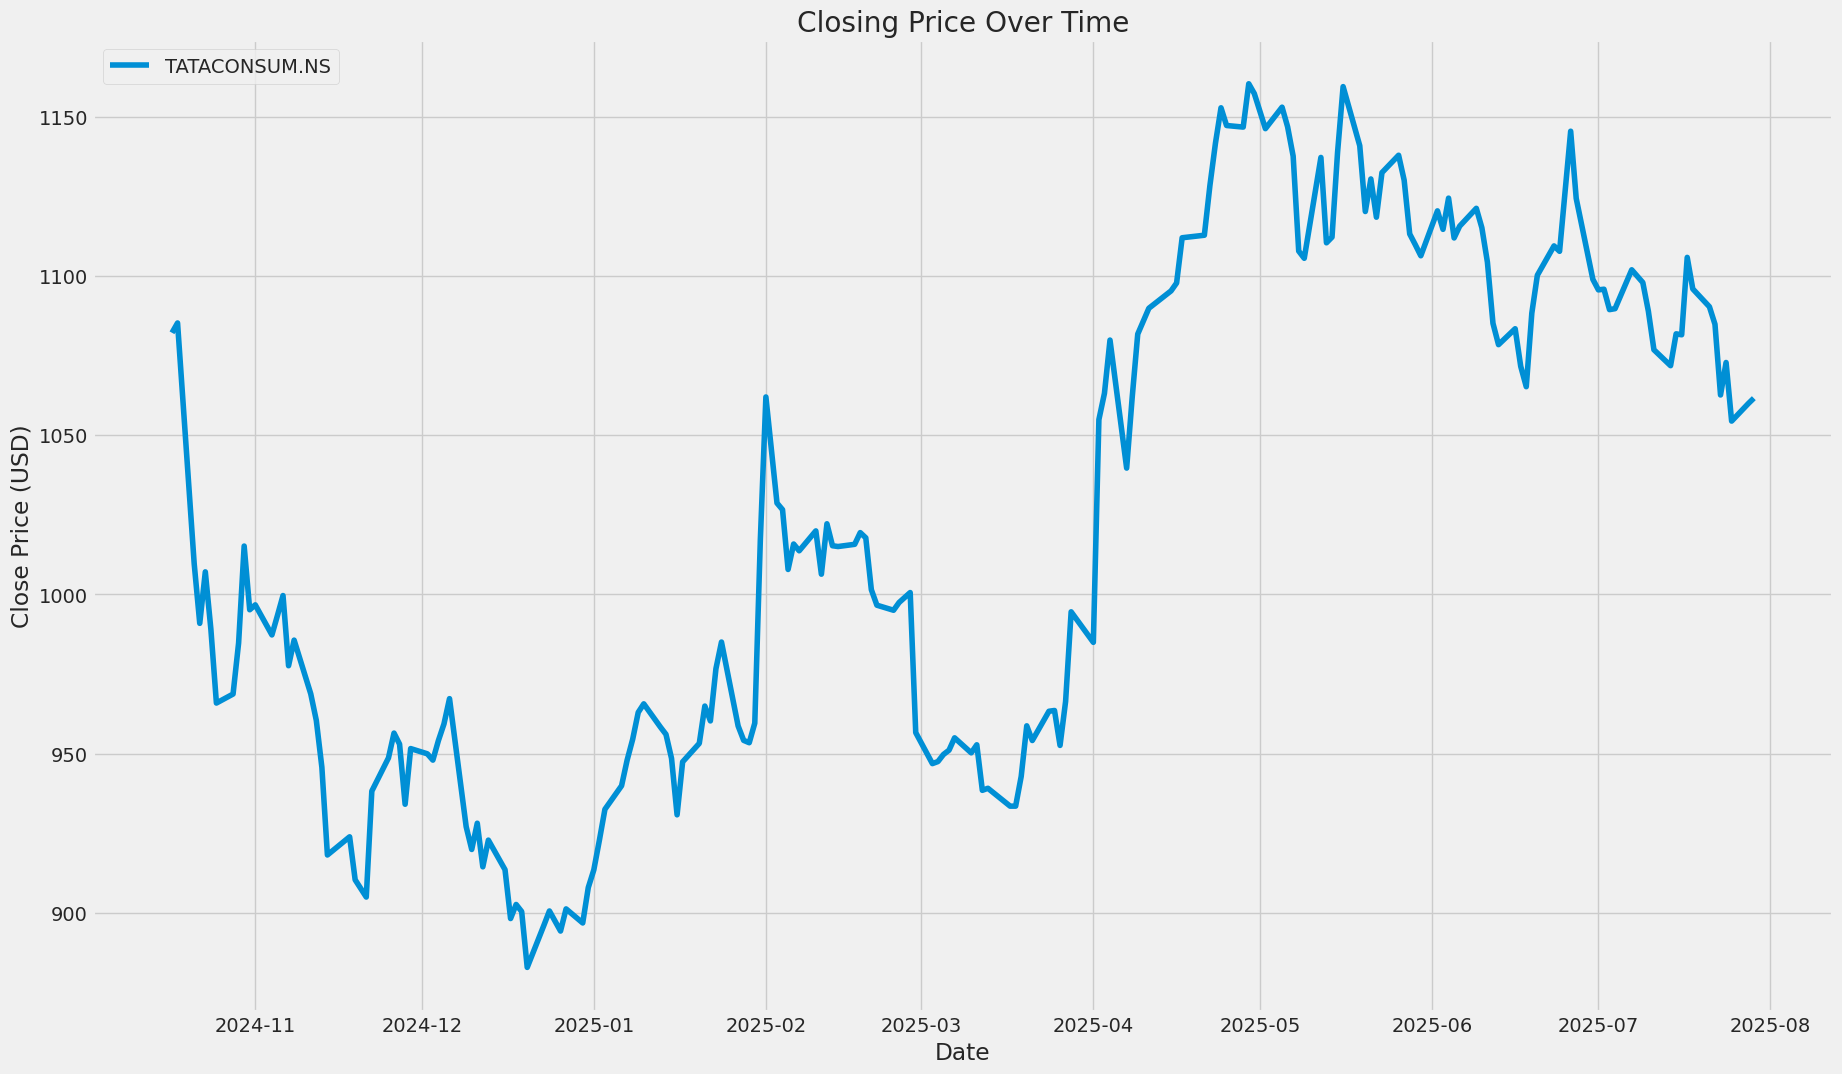

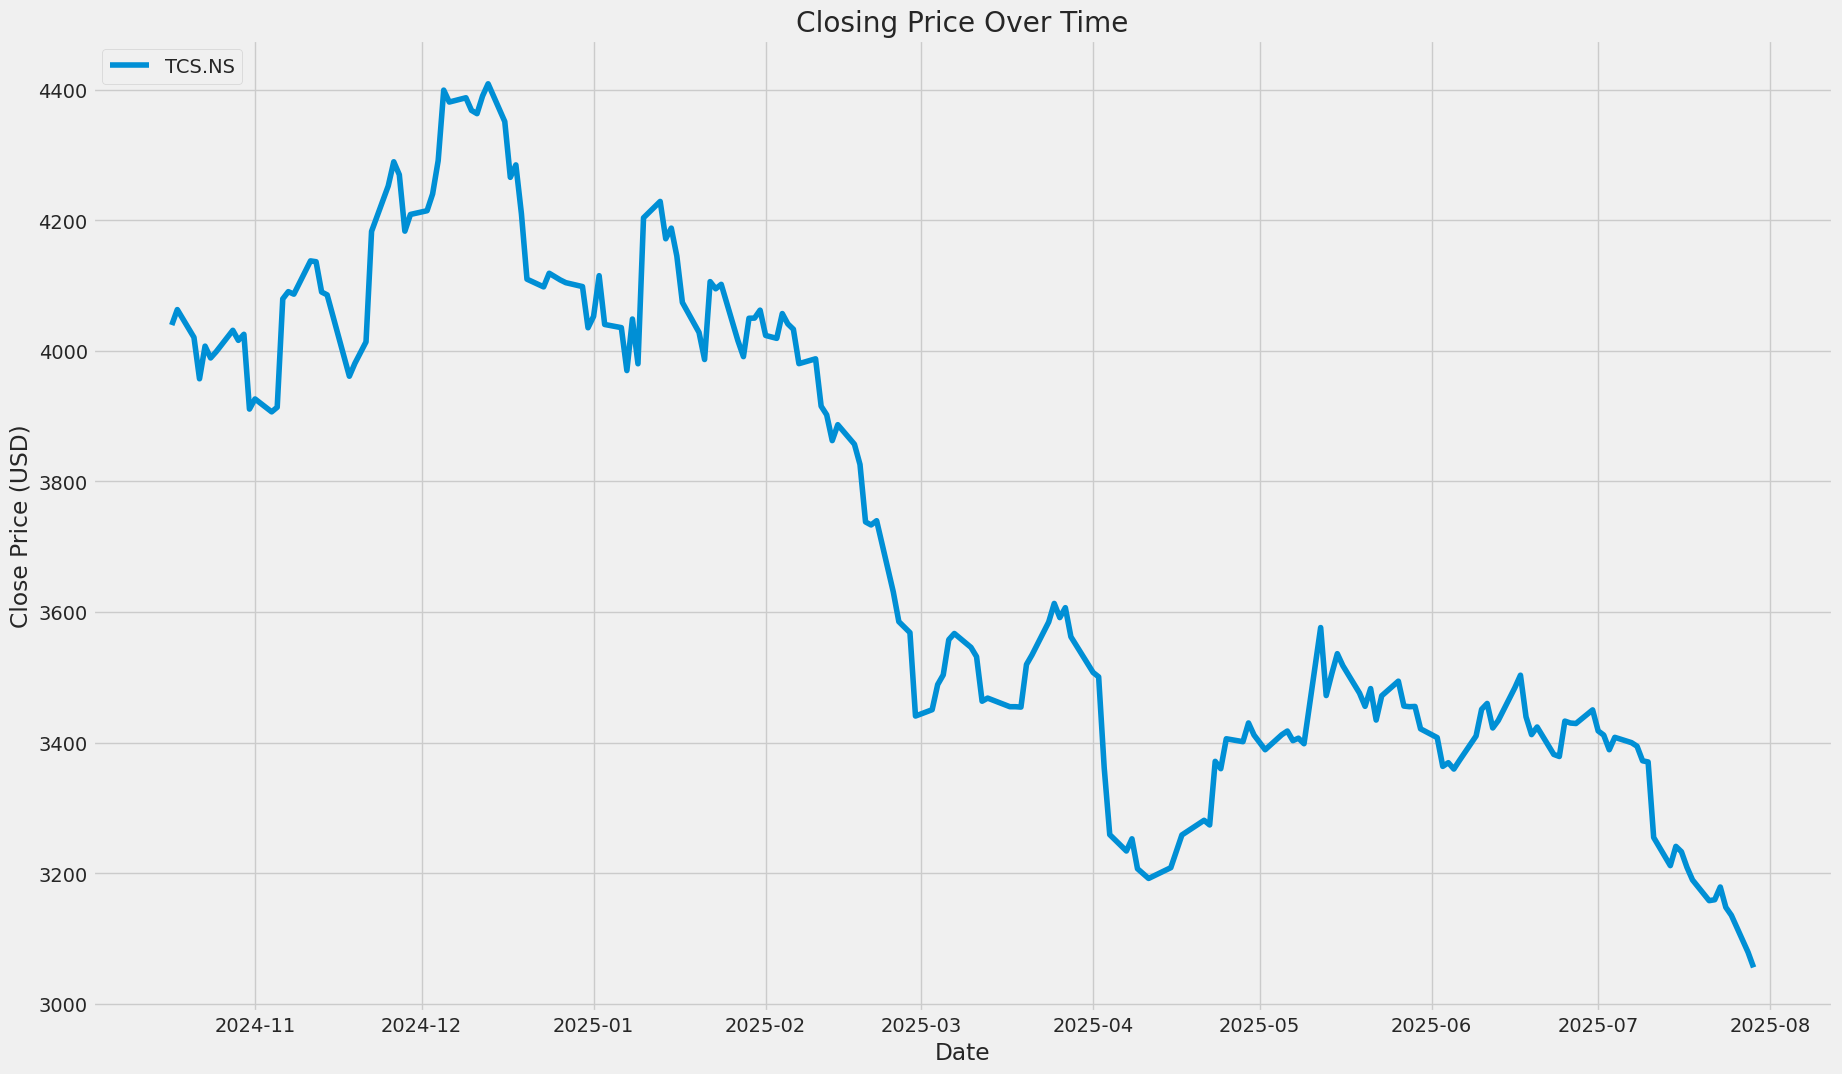

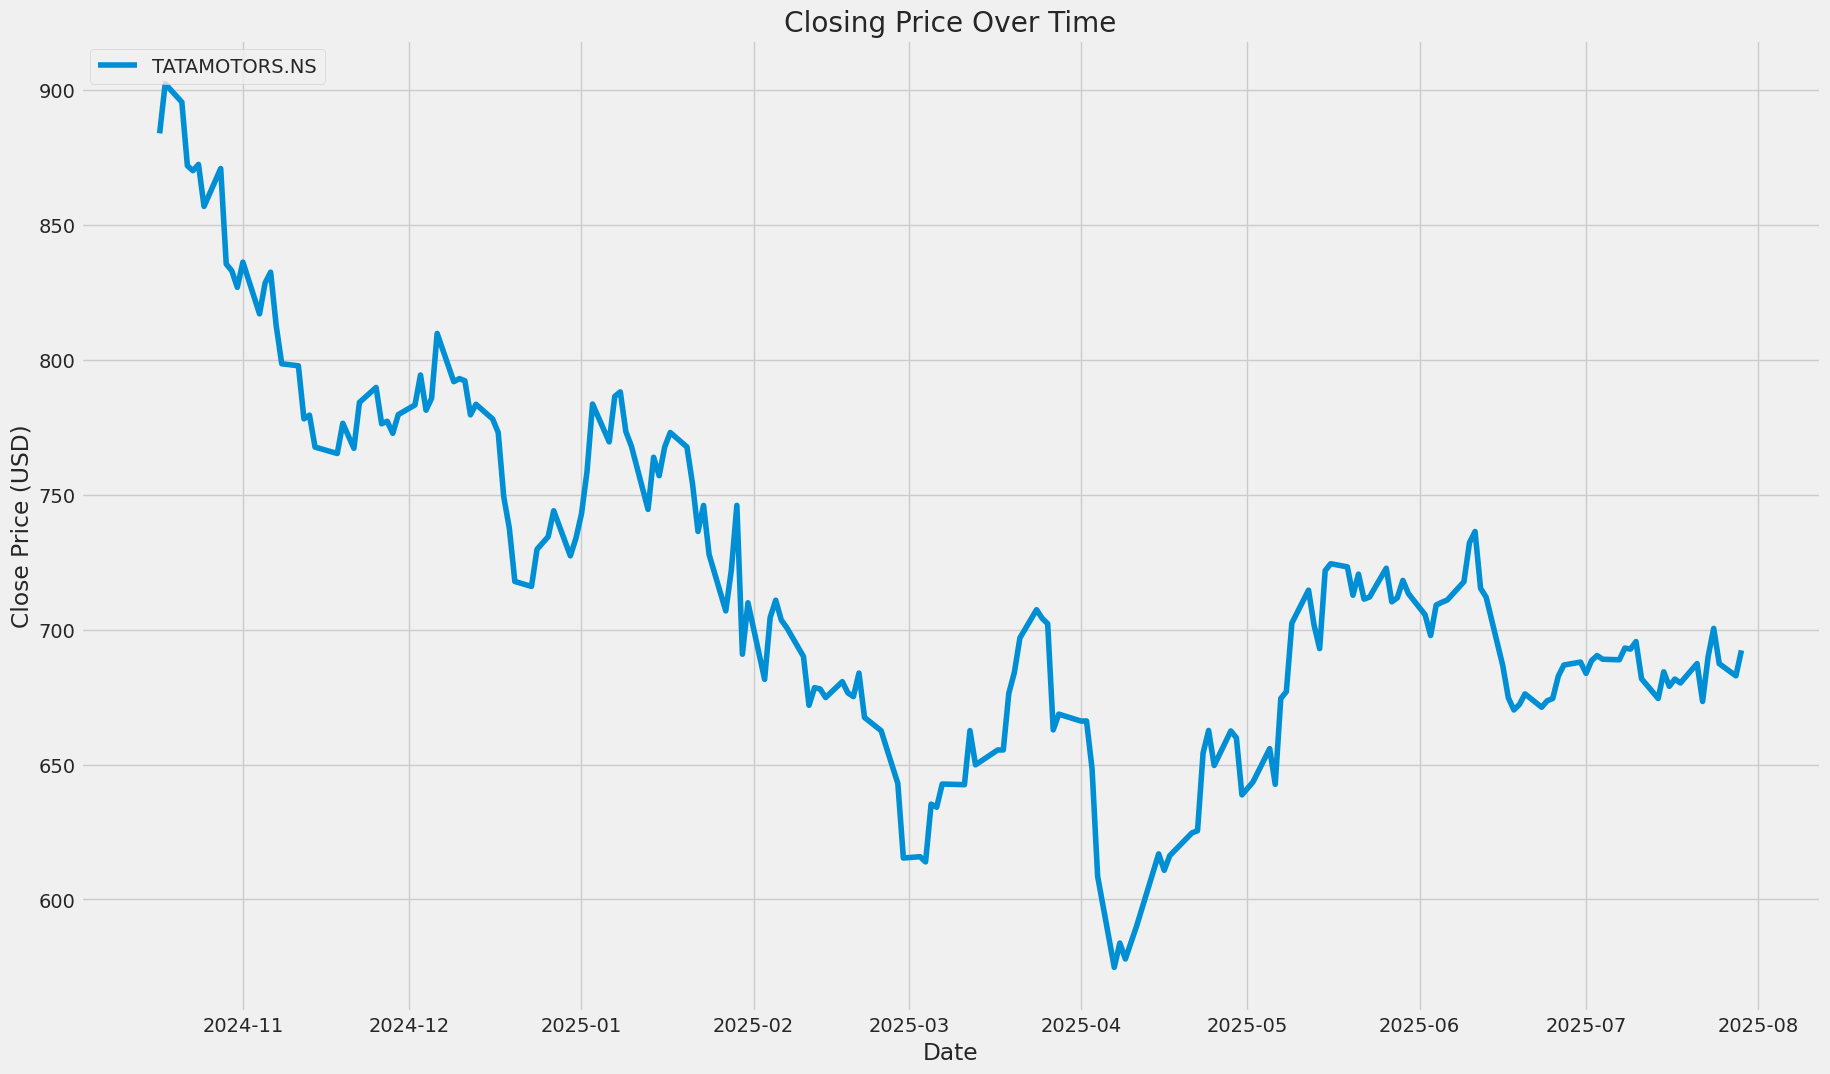

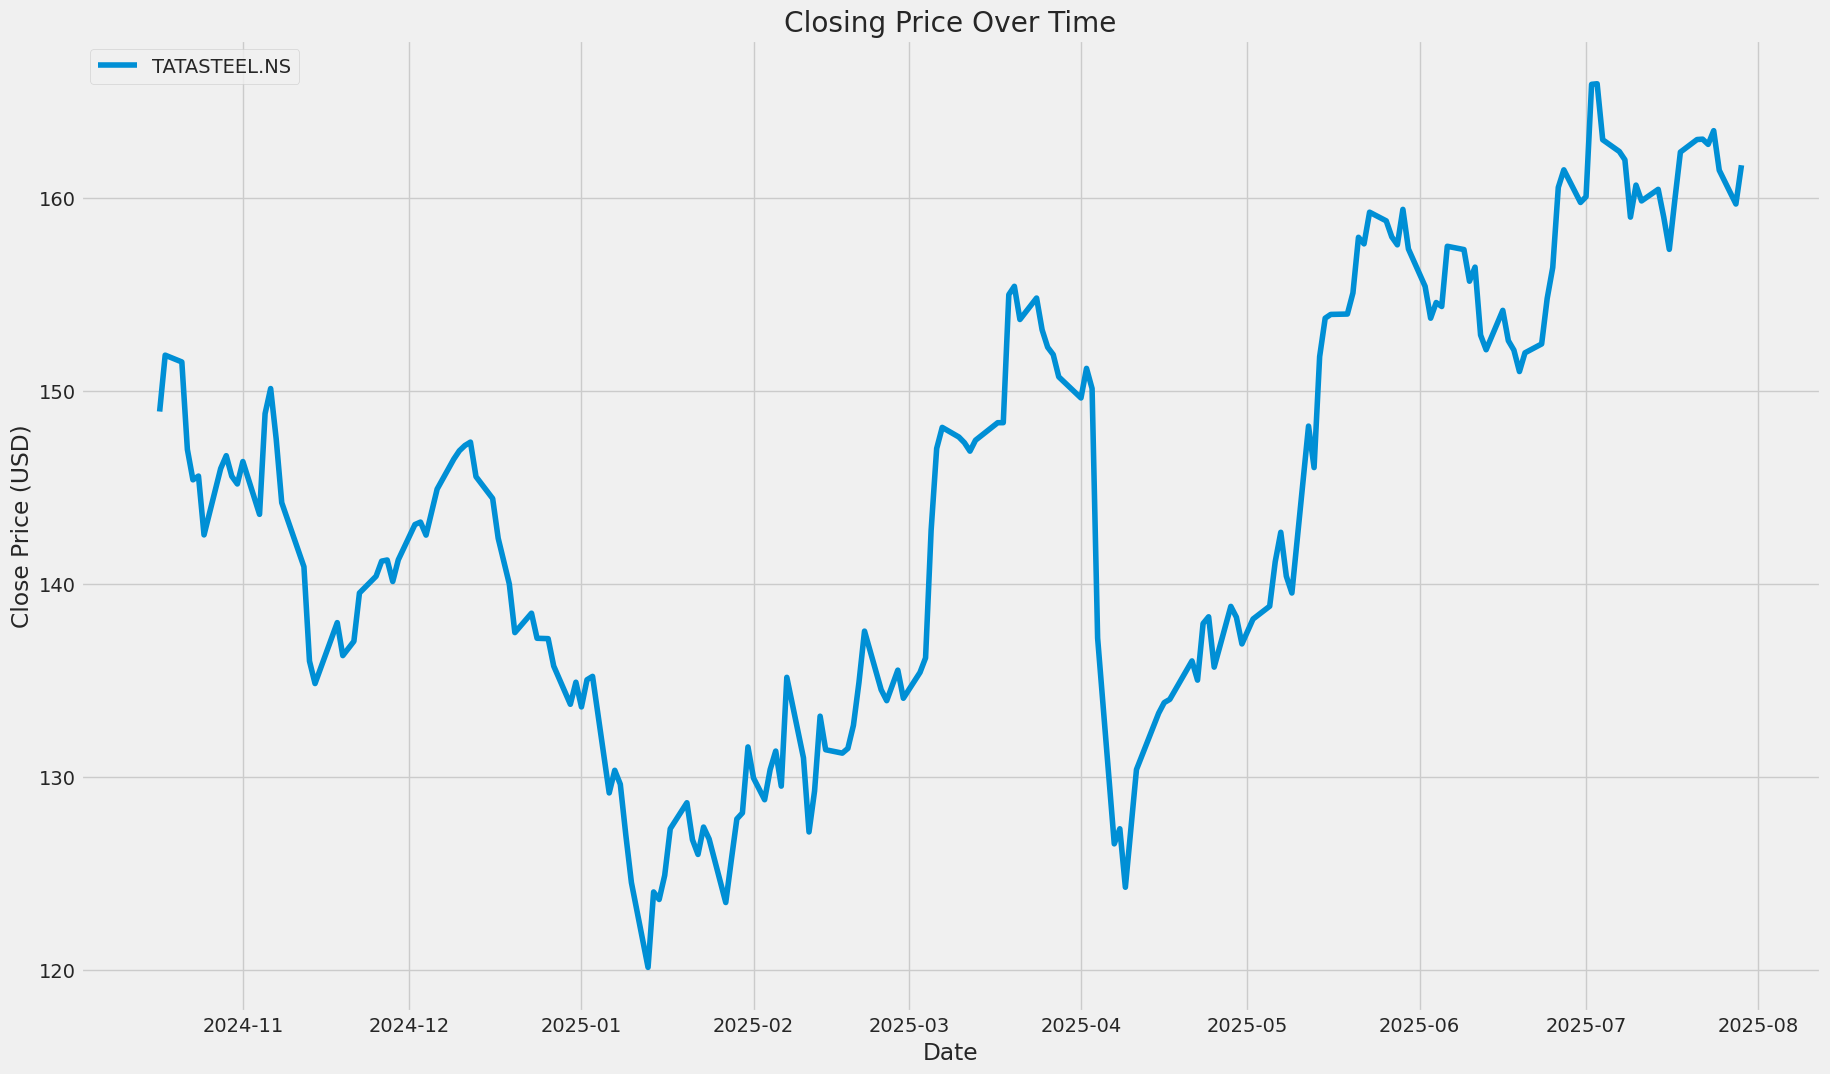

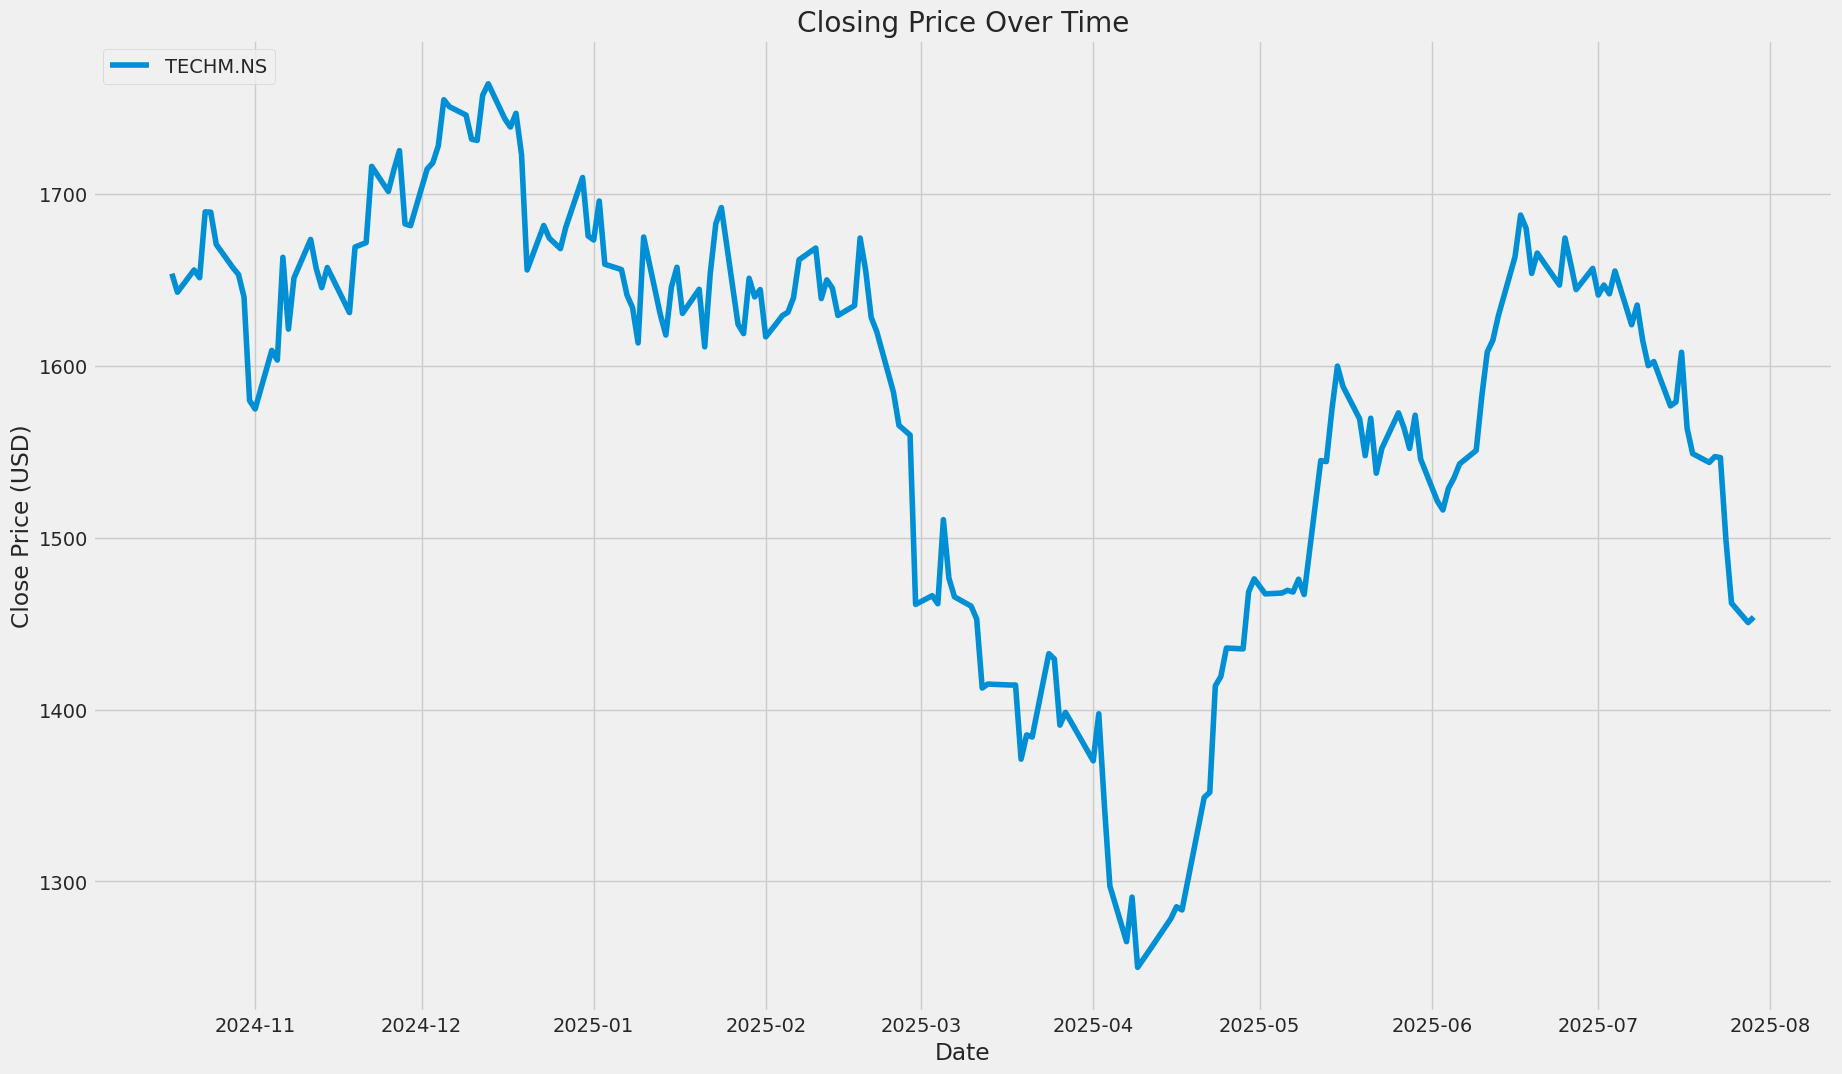

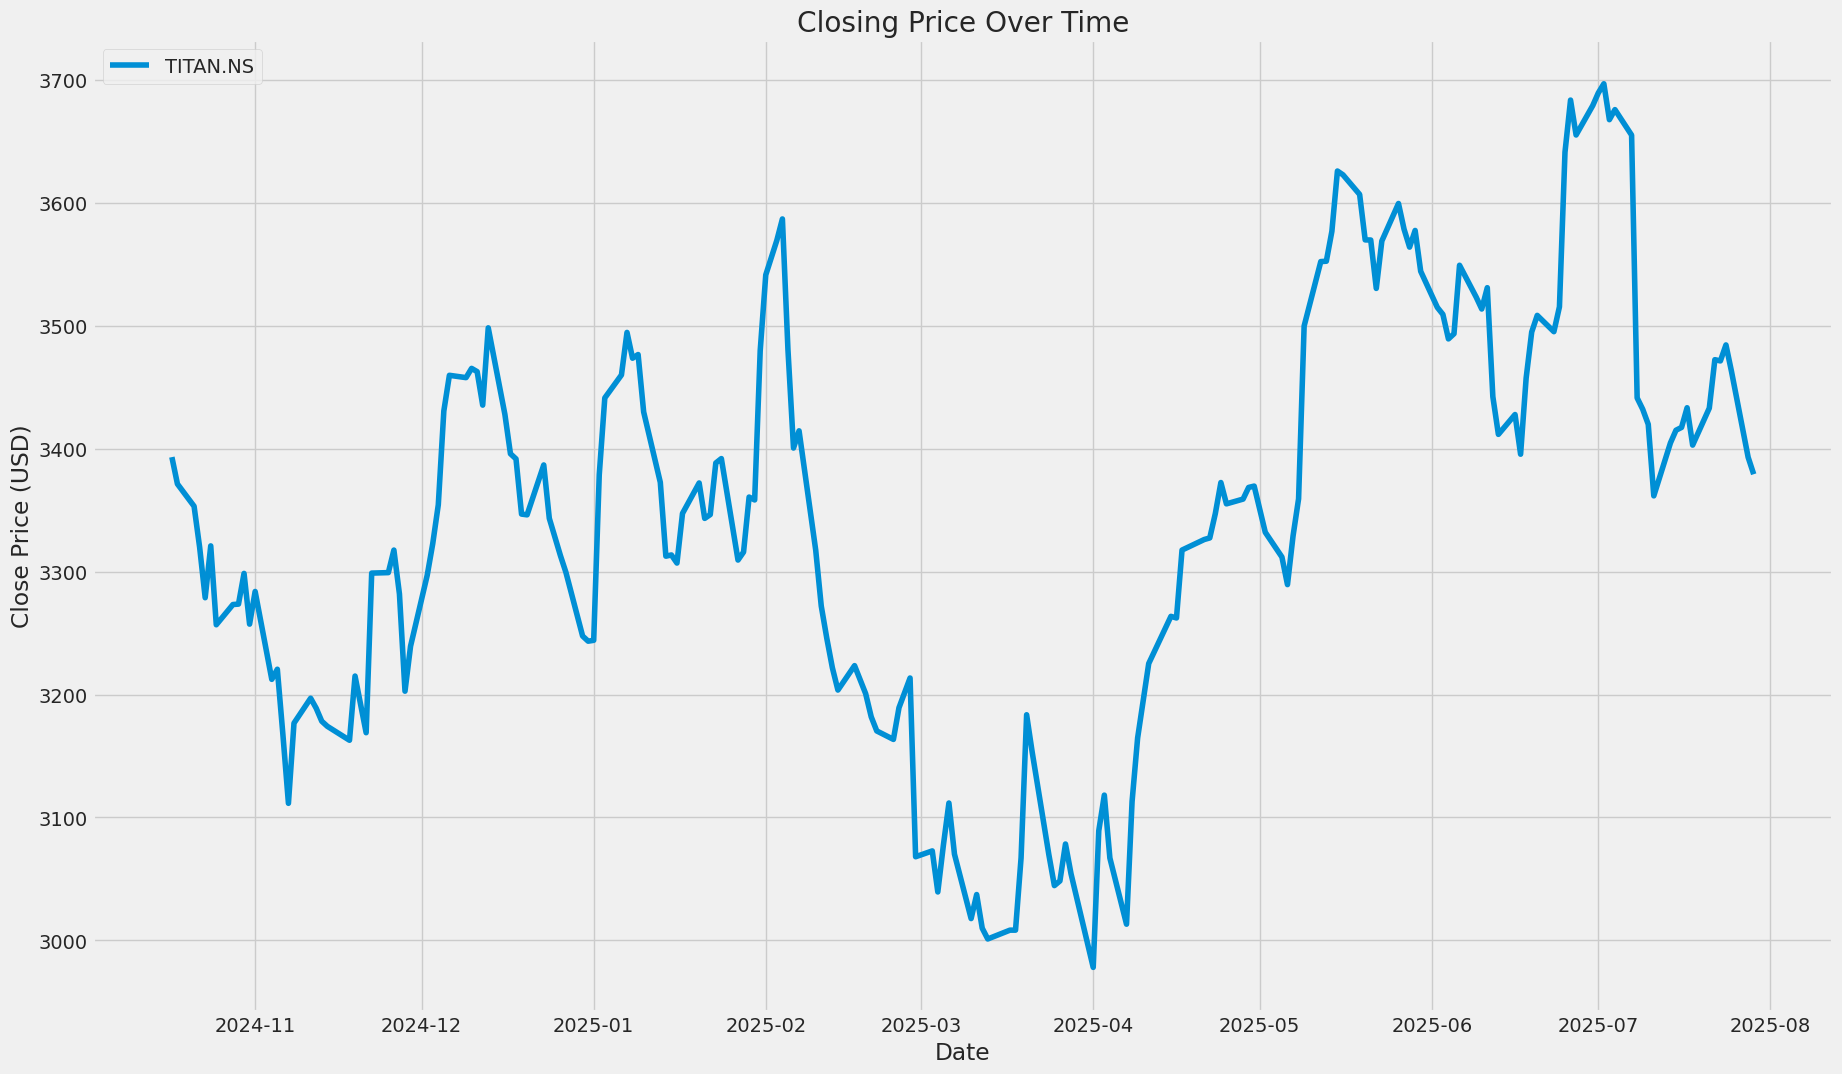

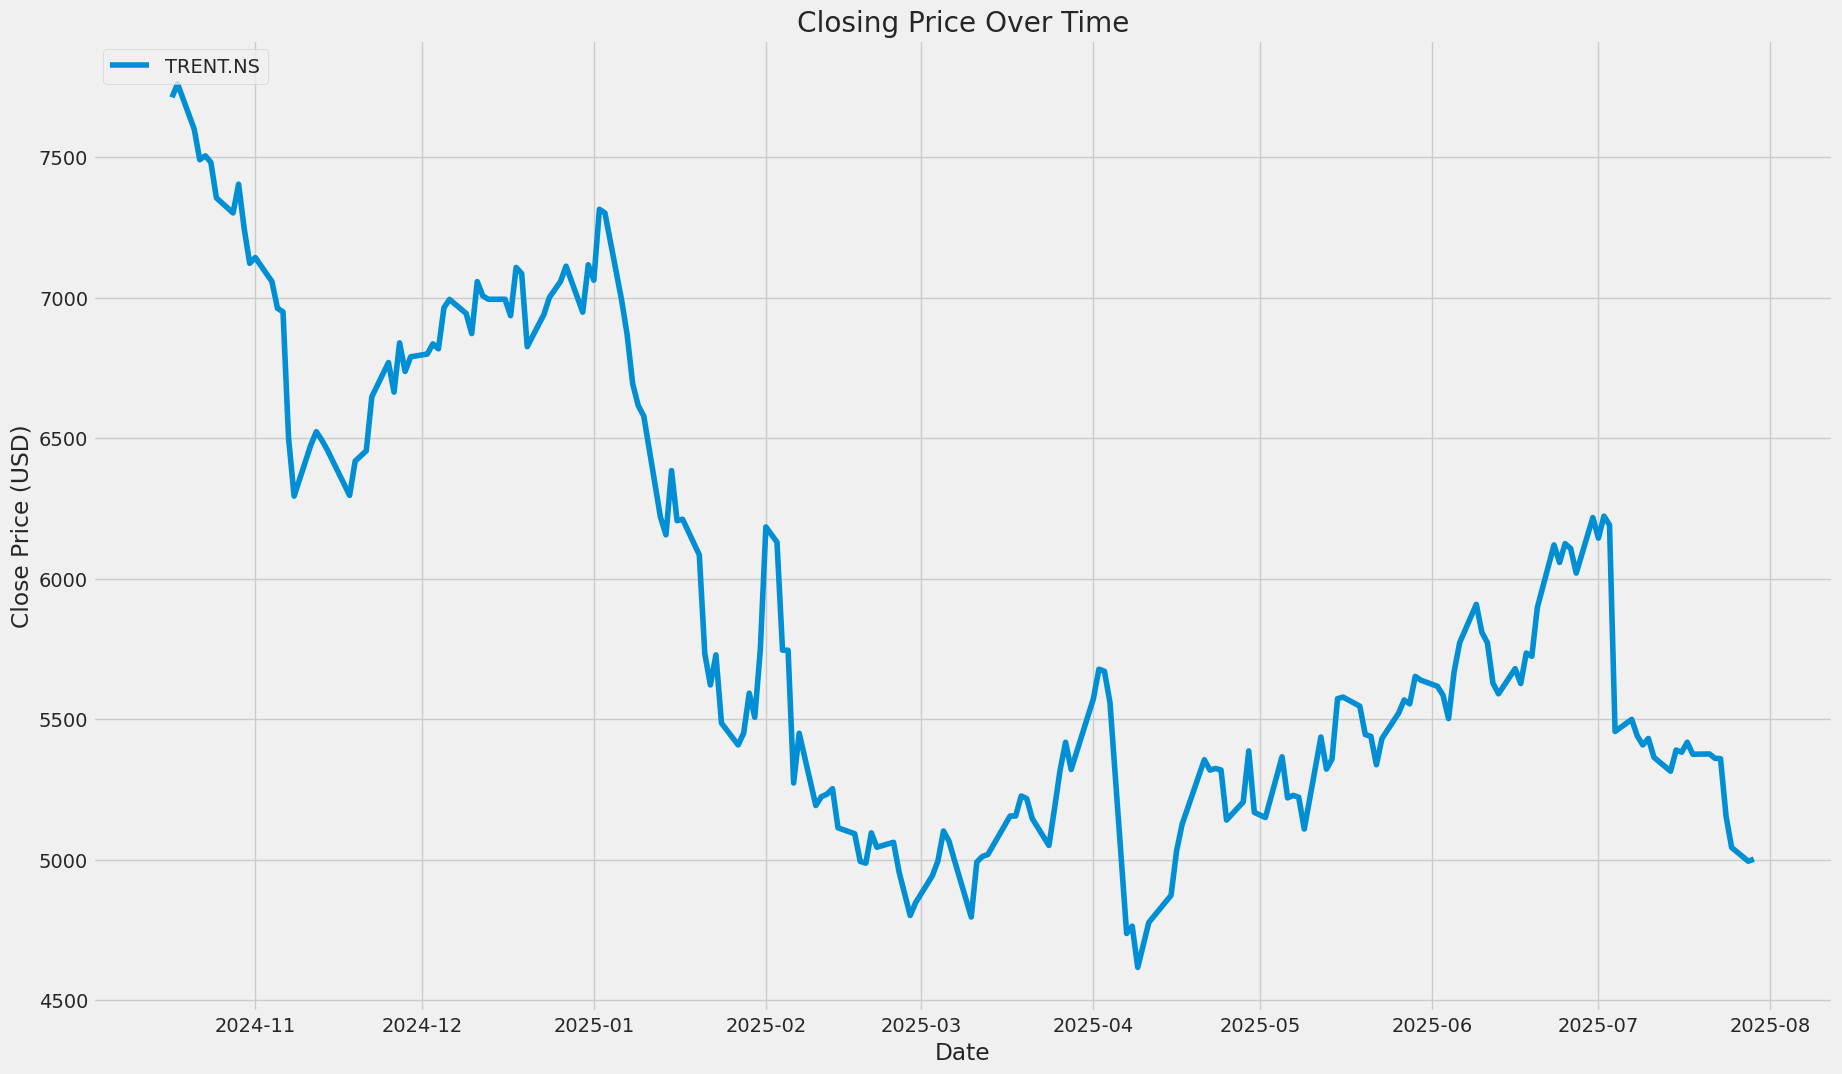

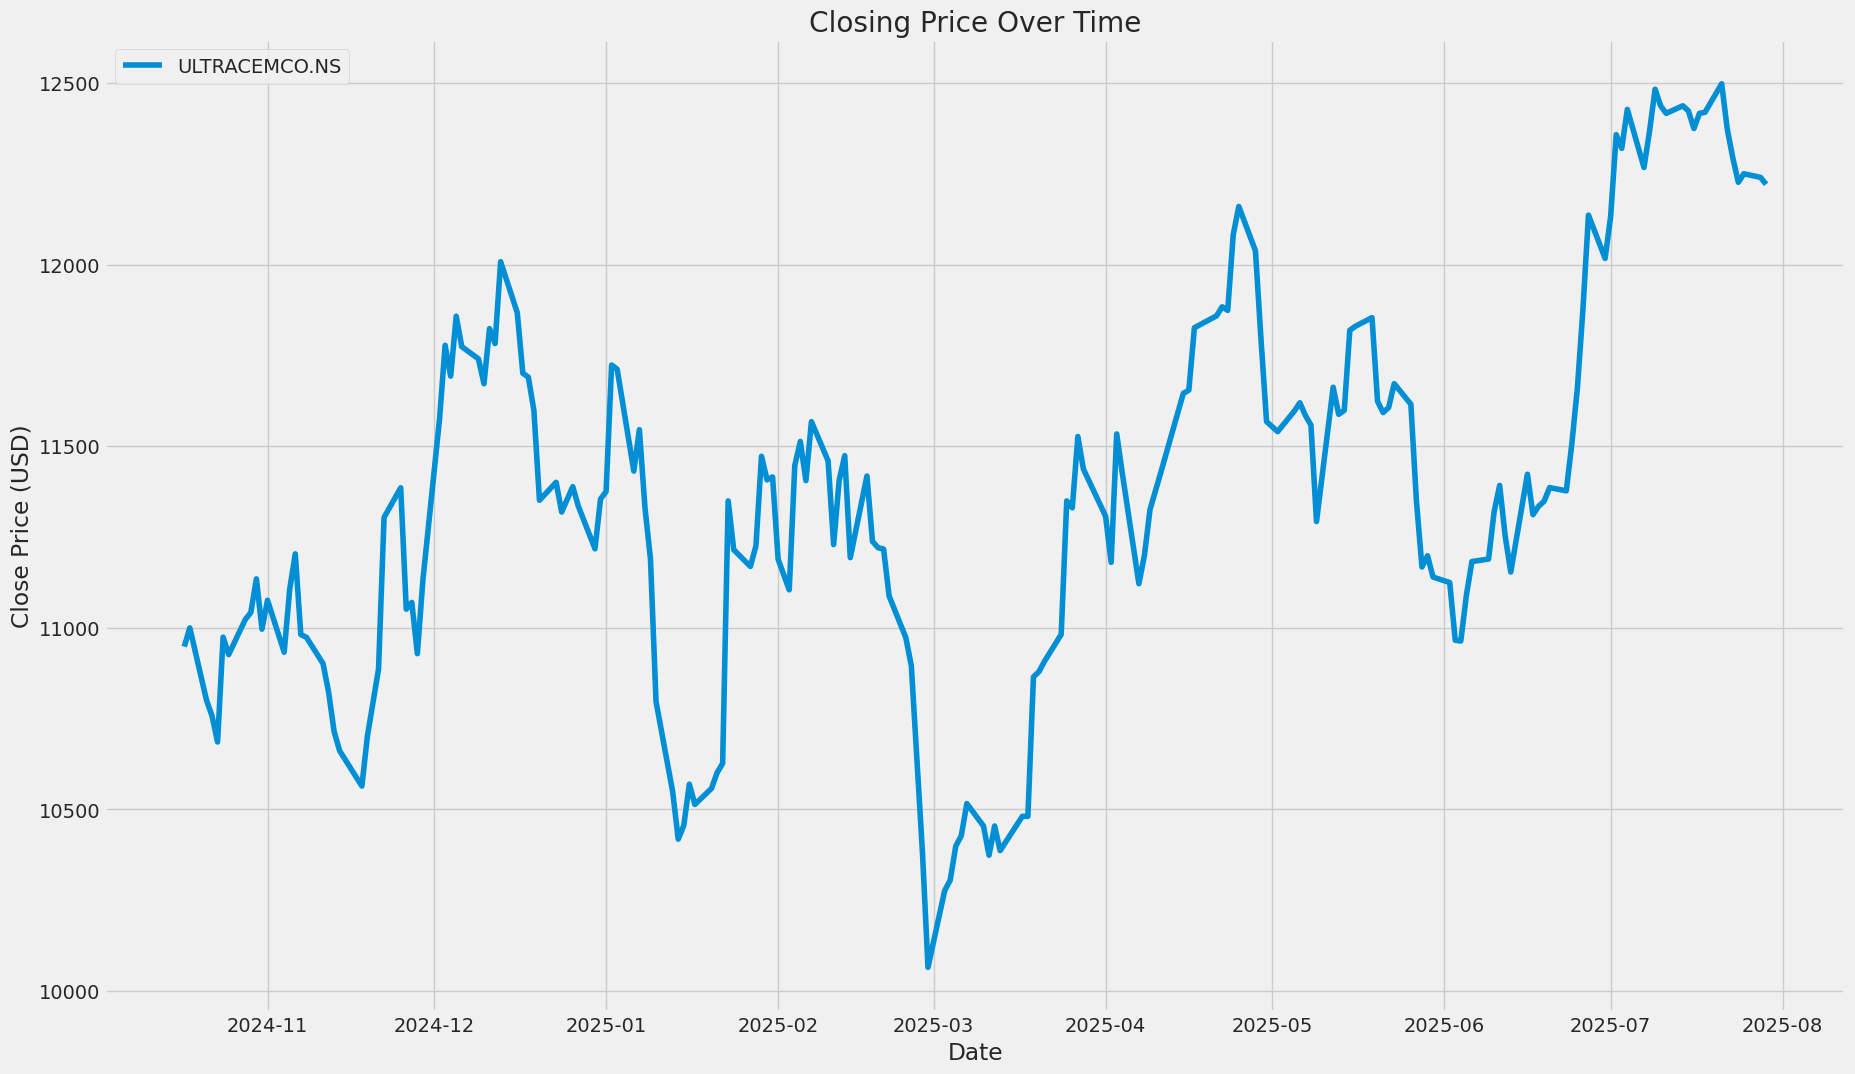

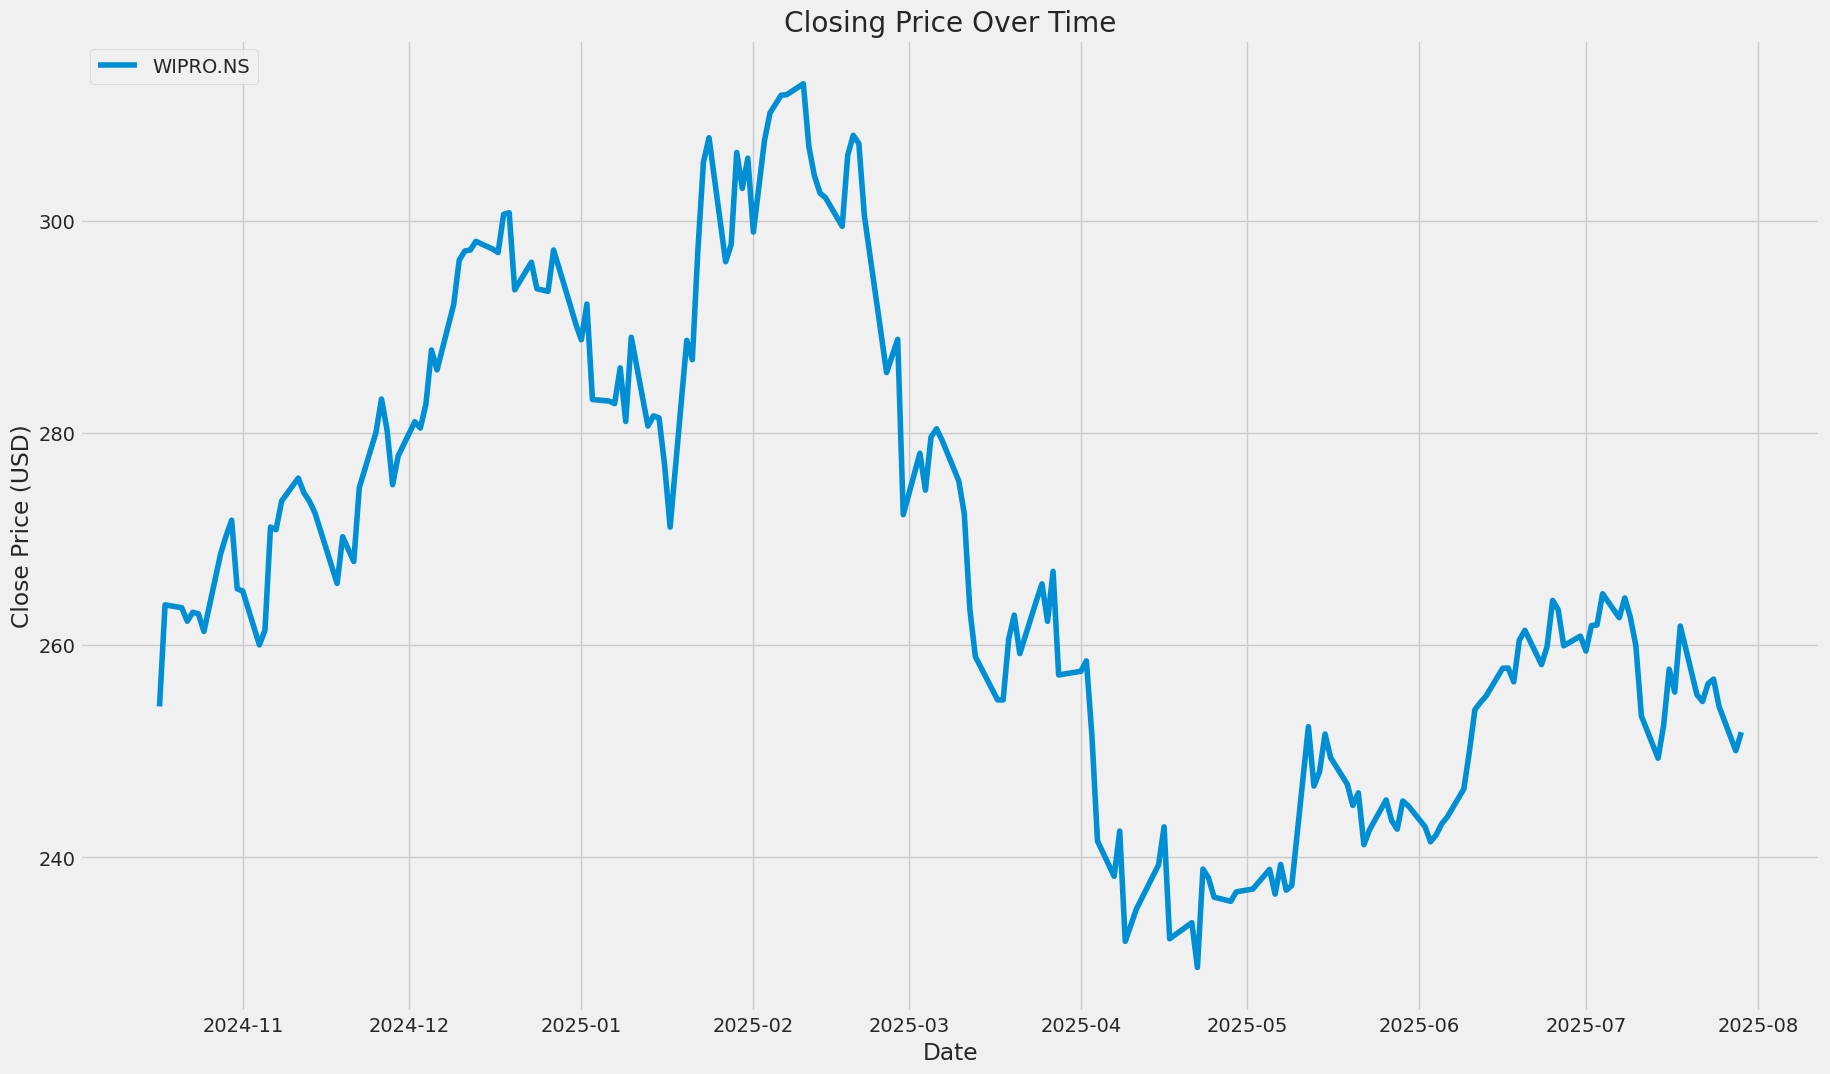

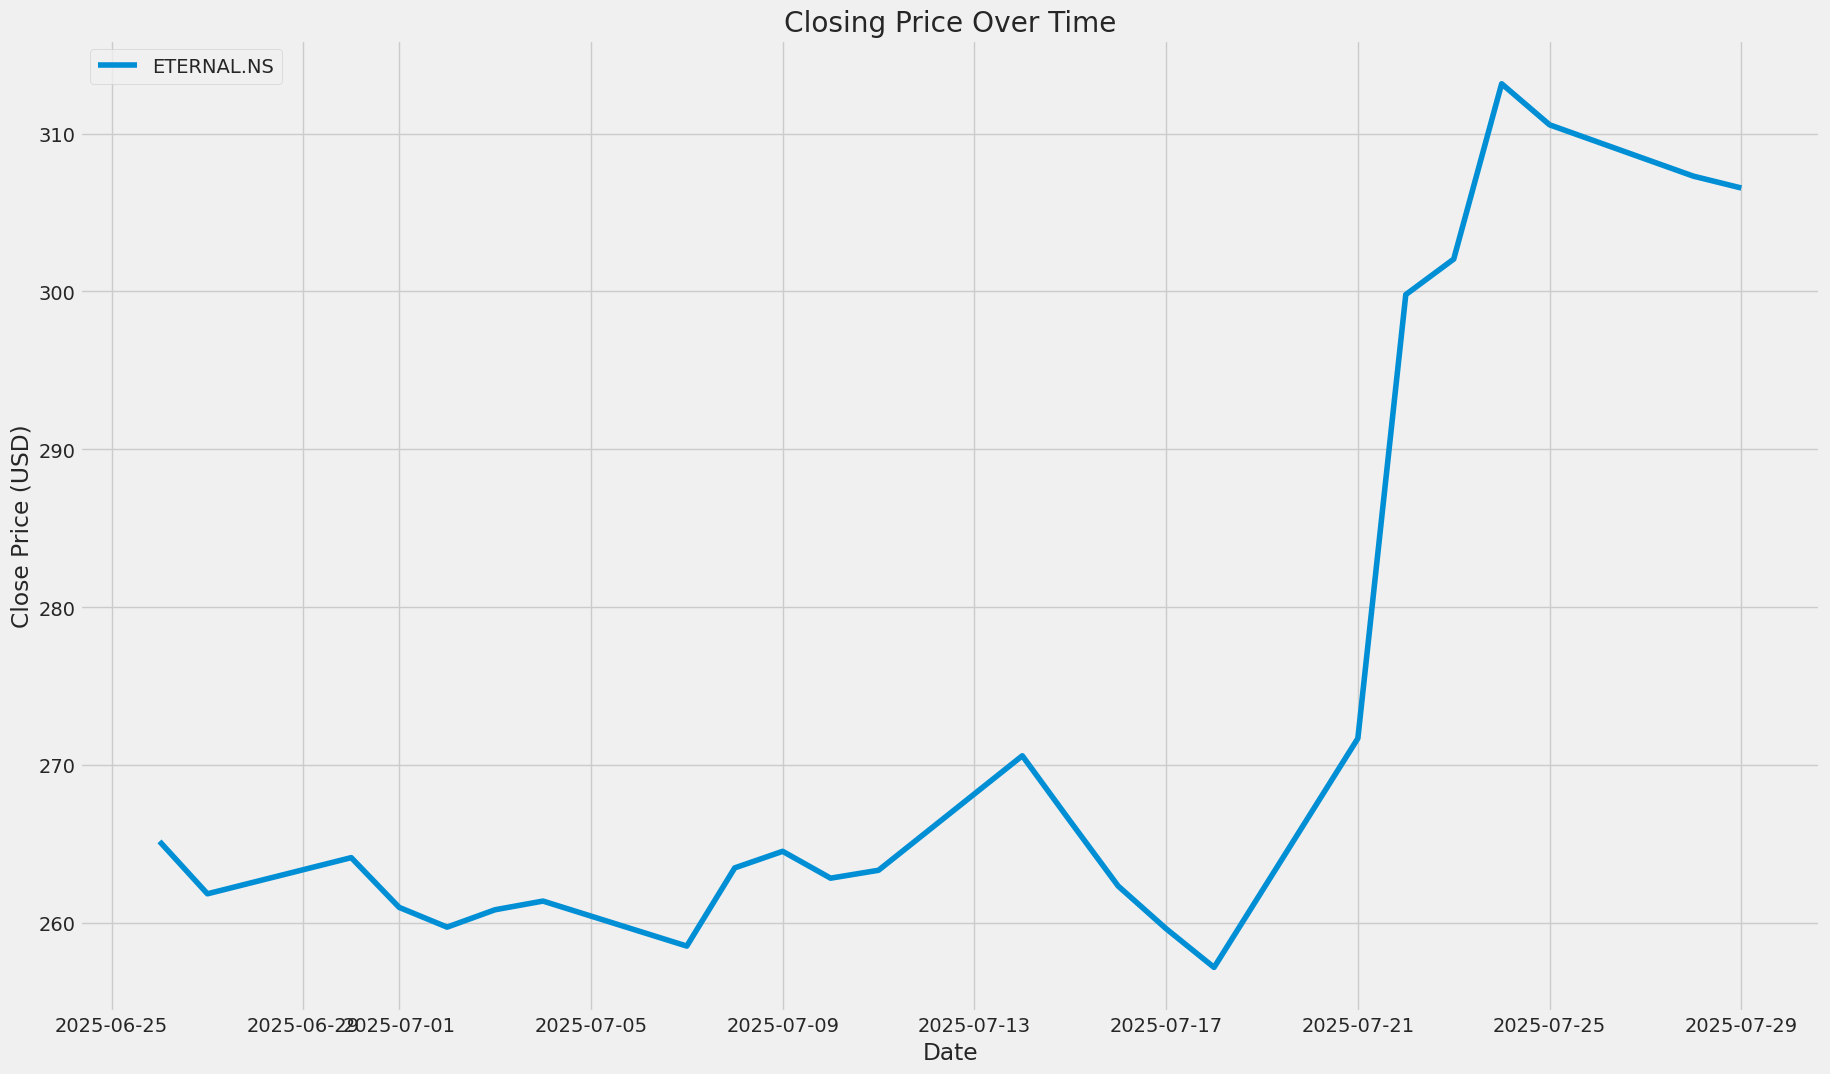

In [100]:

for ticker in ml_data['ticker'].unique():
    plt.figure(figsize=(20,12))
    plt.plot(
        ml_data[ml_data['ticker'] == ticker]['Date'],
        ml_data[ml_data['ticker'] == ticker]['Close'],
        label=f"{ticker}"
    )
    plt.title("Closing Price Over Time")
    plt.xlabel("Date")
    plt.ylabel("Close Price (USD)")
    plt.legend(loc='upper left')

    plt.show()


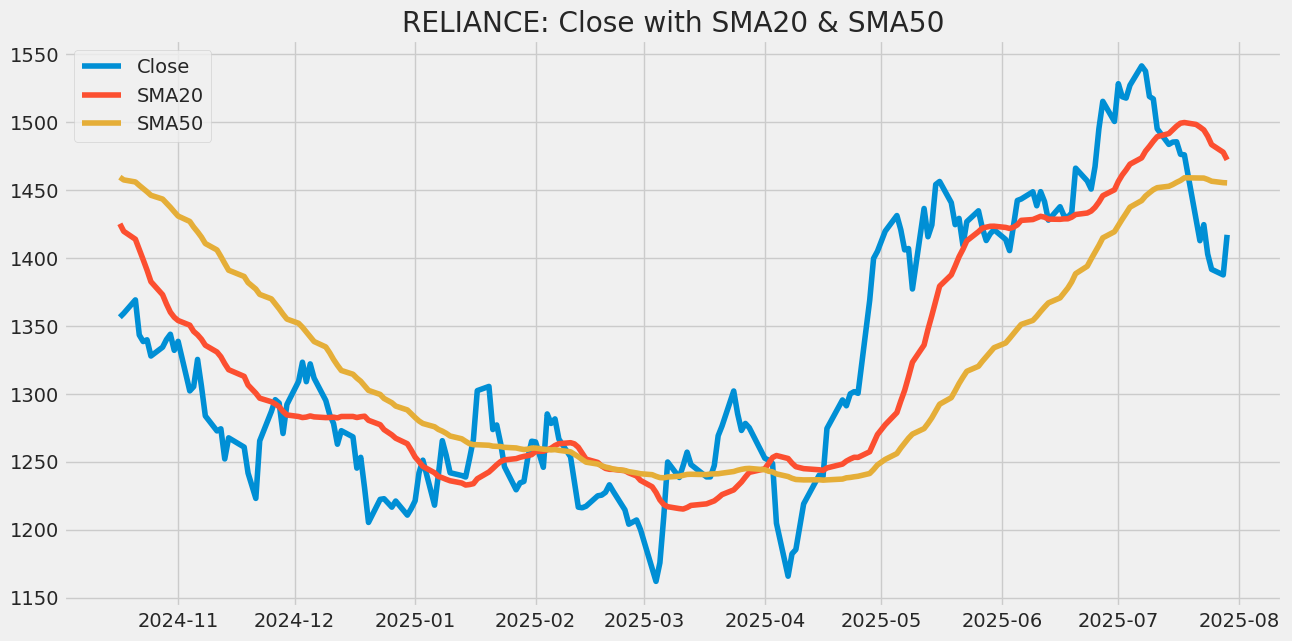

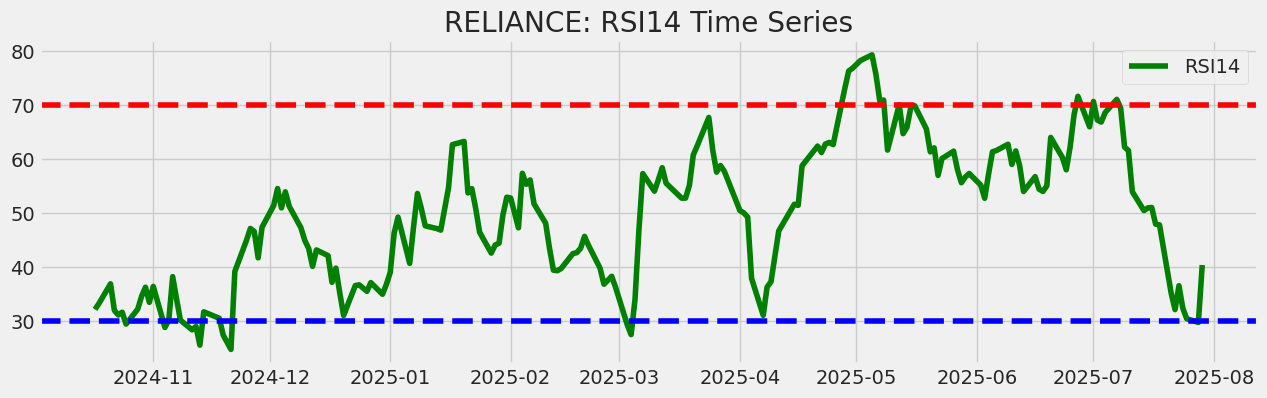

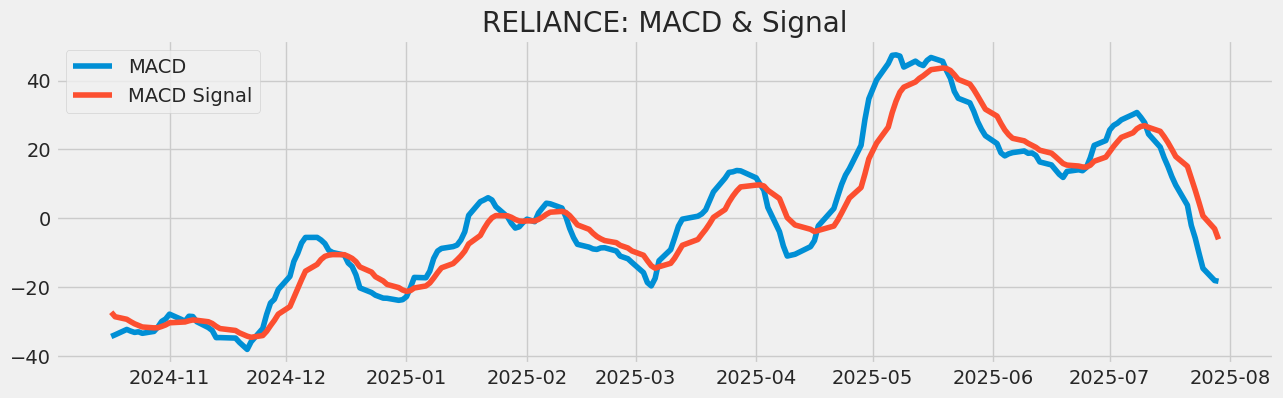

In [101]:
sample = ml_data[ml_data['ticker'] == 'RELIANCE.NS'].copy()
plt.figure(figsize=(14,7))
plt.plot(sample['Date'], sample['Close'], label='Close')
plt.plot(sample['Date'], sample['SMA20'], label='SMA20')
plt.plot(sample['Date'], sample['SMA50'], label='SMA50')
plt.title('RELIANCE: Close with SMA20 & SMA50')
plt.legend()
plt.show()

plt.figure(figsize=(14,4))
plt.plot(sample['Date'], sample['RSI14'], label='RSI14', color='green')
plt.axhline(70, linestyle='--', color='r')
plt.axhline(30, linestyle='--', color='b')
plt.title('RELIANCE: RSI14 Time Series')
plt.legend()
plt.show()

plt.figure(figsize=(14,4))
plt.plot(sample['Date'], sample['MACD'], label='MACD')
plt.plot(sample['Date'], sample['MACD_signal'], label='MACD Signal')
plt.title('RELIANCE: MACD & Signal')
plt.legend()
plt.show()


In [75]:
# Select features
features = [
    'Close', 'Volume', 'SMA20', 'SMA50', 'EMA20', 'EMA50',
    'RSI14', 'MACD', 'MACD_signal', 'MACD_hist',
    'SMA_crossover', 'RSI_oversold',
    'return_1d', 'volatility_5d', 'volatility_10d', 'volatility_20d',
       'volatility_30d', 'vol_ratio_5_20', 'vol_ratio_10_20', 'vol_rank_20',
       'vol_rank_50', 'return_lag_1', 'return_lag_2', 'return_lag_3',
       'return_lag_5', 'return_lag_10', 'rsi_lag_1', 'macd_lag_1', 'rsi_lag_2',
       'macd_lag_2', 'rsi_lag_3', 'macd_lag_3', 'volume_sma_10',
       'volume_sma_20', 'volume_sma_50', 'volume_ratio_10', 'volume_ratio_20',
       'volume_ratio_50', 'price_volume', 'pv_sma_5', 'volume_momentum_5',
       'momentum_3d', 'momentum_5d', 'momentum_10d', 'momentum_20d', 'roc_5d',
       'roc_10d', 'high_10d', 'low_10d', 'price_position_10', 'high_20d',
       'low_20d', 'price_position_20', 'high_50d', 'low_50d',
       'price_position_50', 'bb_upper', 'bb_lower', 'bb_position',
       'SMA_crossover', 'RSI_oversold', 'next_close'
]
target = 'target'

# Standardize features (recommended for LR)
X = ml_data[features]
y = ml_data[target]

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)


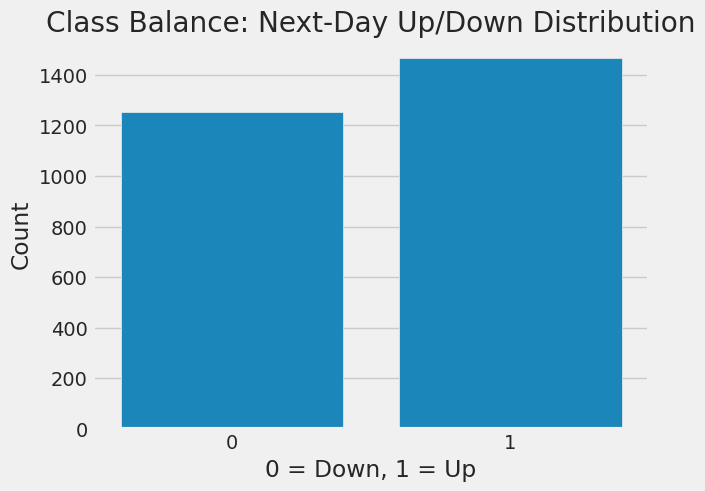

In [76]:
sns.countplot(x='target', data=ml_data)
plt.title("Class Balance: Next-Day Up/Down Distribution")
plt.xlabel("0 = Down, 1 = Up")
plt.ylabel("Count")
plt.show()


In [102]:
# # Sort by date (if multi-stock, by ticker as well)
# ml_data = ml_data.sort_values(['ticker', 'Date'])

# # Chronological split: 80% train, 20% test
# split_idx = int(0.8 * len(ml_data))
# X_train, X_test = X_scaled[:split_idx], X_scaled[split_idx:]
# y_train, y_test = y[:split_idx], y[split_idx:]

from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)

# Use only the last fold for final testing
for train_index, test_index in tscv.split(X_scaled):
    pass  # this will give you the last split

X_train, X_test = X_scaled[train_index], X_scaled[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]



In [103]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 7, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [104]:
# Decision Tree Classifier
dt_model = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=tscv, n_jobs=-1)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

# Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Performance
def print_metrics(model_name, y_true, y_pred):
    print(f"\n=== {model_name} ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred, target_names=['Down','Up']))

print_metrics("Decision Tree", y_test, dt_preds)
print_metrics("Logistic Regression", y_test, lr_preds)



=== Decision Tree ===
Accuracy: 0.5364238410596026
              precision    recall  f1-score   support

        Down       0.54      0.19      0.29       216
          Up       0.54      0.85      0.66       237

    accuracy                           0.54       453
   macro avg       0.54      0.52      0.47       453
weighted avg       0.54      0.54      0.48       453


=== Logistic Regression ===
Accuracy: 0.8035320088300221
              precision    recall  f1-score   support

        Down       0.92      0.64      0.76       216
          Up       0.75      0.95      0.83       237

    accuracy                           0.80       453
   macro avg       0.83      0.80      0.80       453
weighted avg       0.83      0.80      0.80       453



In [80]:
# Decision Tree feature importances
importances = pd.Series(dt_model.best_index_, index=features)
importances = importances.sort_values(ascending=False)
print("\nTop Feature Importances (Decision Tree):")
print(importances)


Top Feature Importances (Decision Tree):
Close            26
Volume           26
SMA20            26
SMA50            26
EMA20            26
                 ..
bb_lower         26
bb_position      26
SMA_crossover    26
RSI_oversold     26
next_close       26
Length: 62, dtype: int64


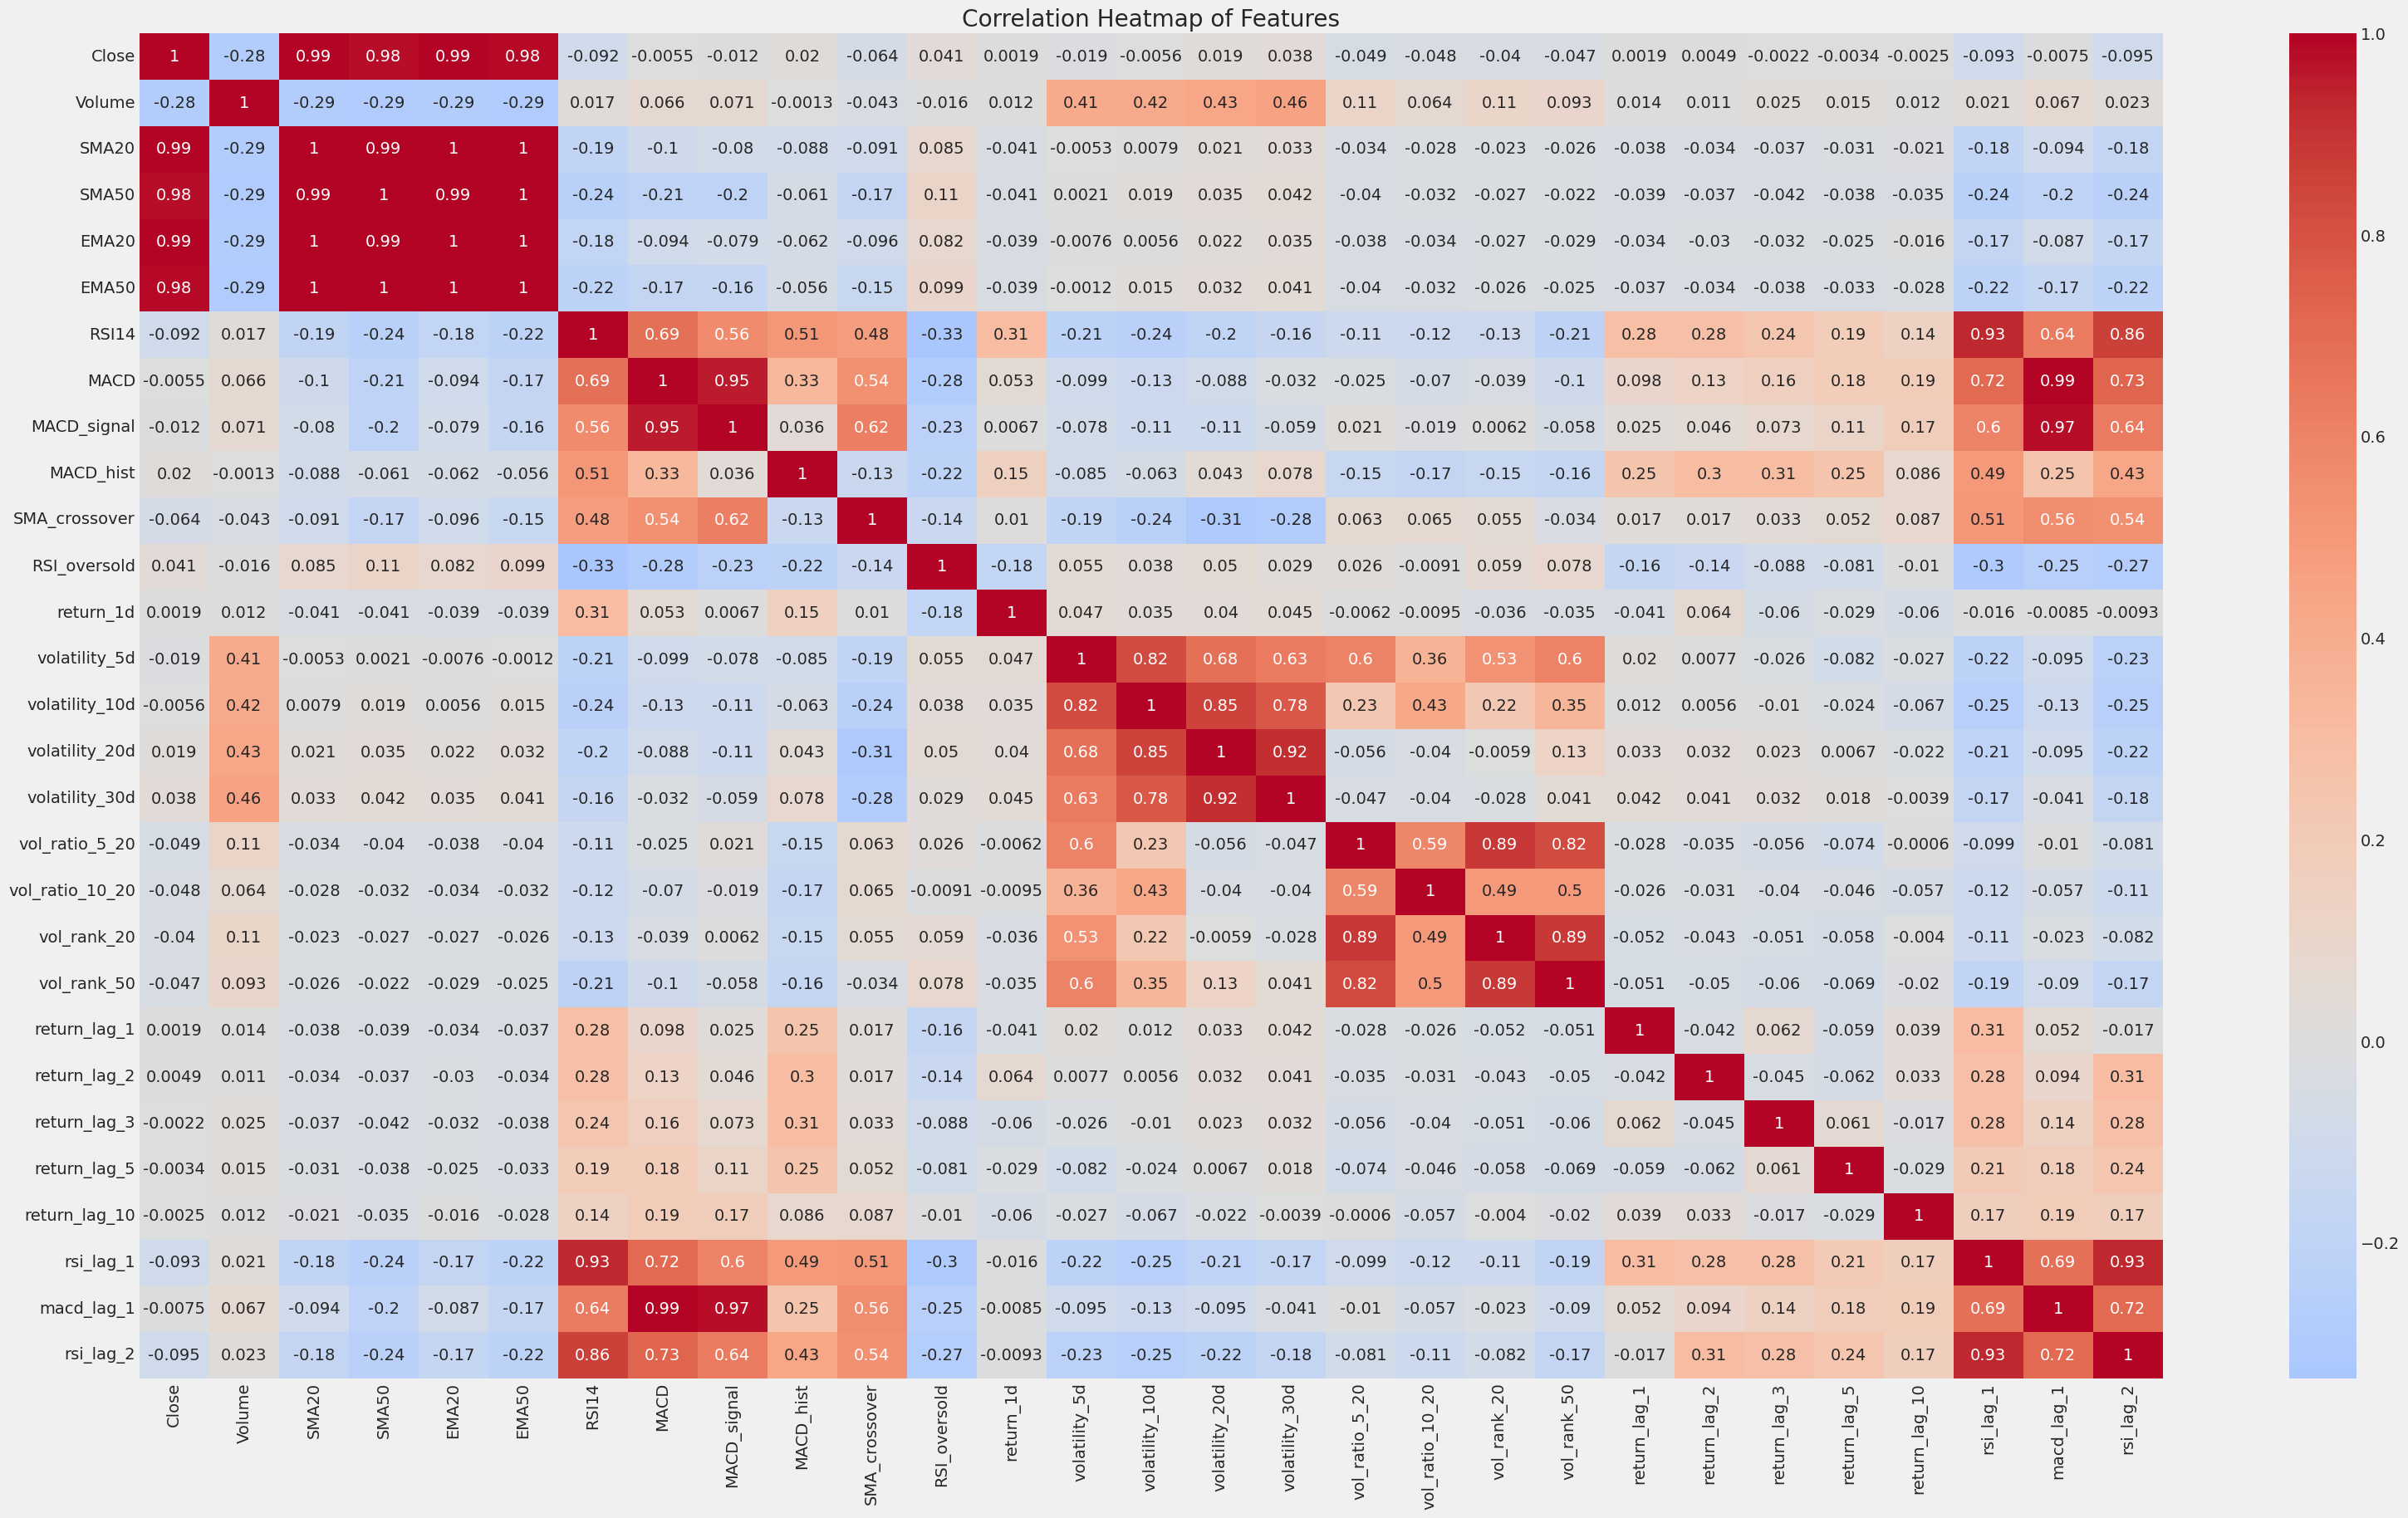

In [81]:
plt.figure(figsize=(35,20))
corr = ml_data[[
    'Close', 'Volume', 'SMA20', 'SMA50', 'EMA20', 'EMA50',
    'RSI14', 'MACD', 'MACD_signal', 'MACD_hist',
    'SMA_crossover', 'RSI_oversold',
    'return_1d', 'volatility_5d', 'volatility_10d', 'volatility_20d',
    'volatility_30d', 'vol_ratio_5_20', 'vol_ratio_10_20', 'vol_rank_20',
    'vol_rank_50', 'return_lag_1', 'return_lag_2', 'return_lag_3',
    'return_lag_5', 'return_lag_10', 'rsi_lag_1', 'macd_lag_1', 'rsi_lag_2',
]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Features")
plt.show()


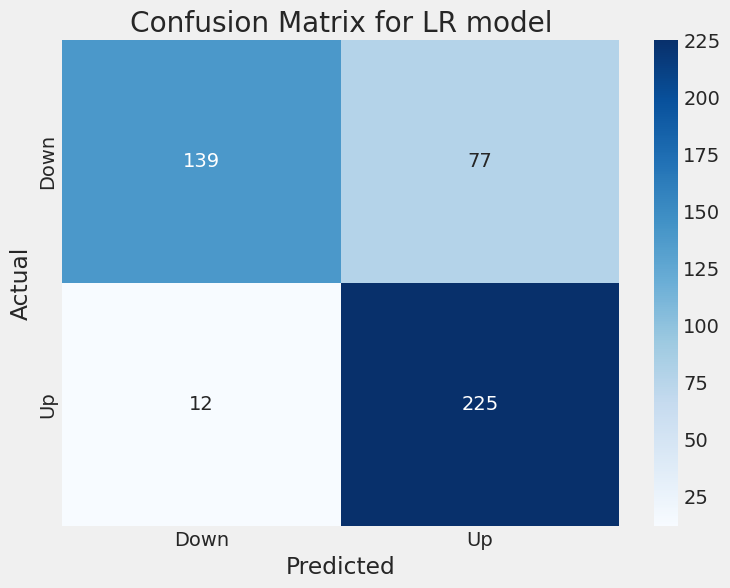


=======Confusion Matrix========

[[139  77]
 [ 12 225]]


In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, lr_preds)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for LR model')
plt.show()

print("\n=======Confusion Matrix========\n")
print(cm)

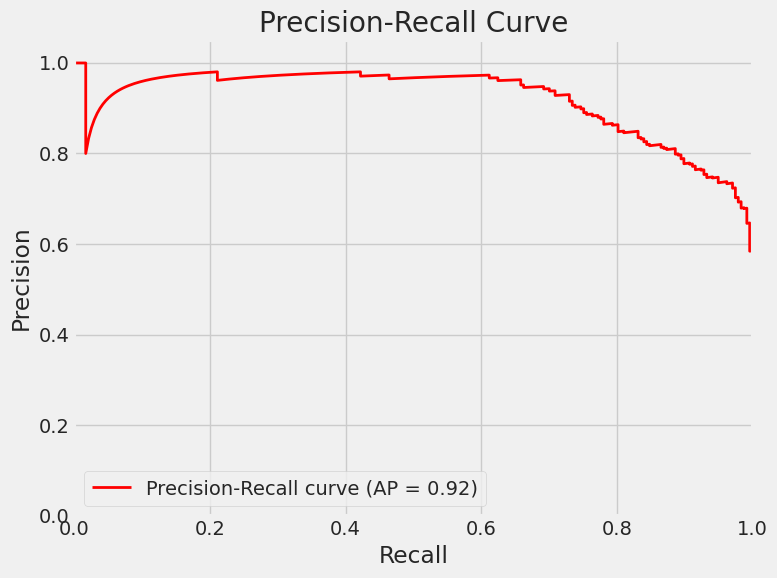


Average Precision (AP) for Logistic Regression: 0.9208


In [105]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Get predicted probabilities for the positive class
y_scores = lr_model.predict_proba(X_test)[:, 1]

# Calculate precision and recall for different thresholds
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Calculate the Average Precision (AP) score
average_precision = average_precision_score(y_test, y_scores)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='red', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

print(f"\nAverage Precision (AP) for Logistic Regression: {average_precision:.4f}")

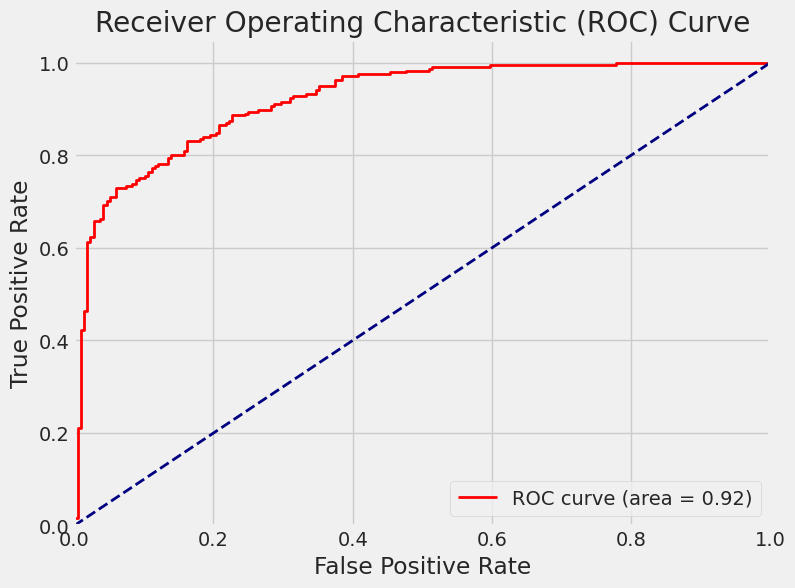


AUC for Logistic Regression: 0.9219


In [106]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"\nAUC for Logistic Regression: {roc_auc:.4f}")

In [107]:
from sklearn.metrics import f1_score, classification_report

# Calculate F1 score
f1 = f1_score(y_test, lr_preds)
print(f"\nF1 Score for Logistic Regression: {f1:.4f}")

# Print classification report
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, lr_preds, target_names=['Down', 'Up']))


F1 Score for Logistic Regression: 0.8349

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

        Down       0.92      0.64      0.76       216
          Up       0.75      0.95      0.83       237

    accuracy                           0.80       453
   macro avg       0.83      0.80      0.80       453
weighted avg       0.83      0.80      0.80       453



In [108]:
# Calculate training accuracy for Logistic Regression
lr_train_accuracy = lr_model.score(X_train, y_train)
print(f"\nLogistic Regression Training Accuracy: {lr_train_accuracy:.4f}")
print(f"Logistic Regression Test Accuracy: {accuracy_score(y_test, lr_preds):.4f}")


Logistic Regression Training Accuracy: 0.8236
Logistic Regression Test Accuracy: 0.8035


In [109]:
import pickle

# Save the Logistic Regression model
filename = 'logistic_regression_model.pkl'
pickle.dump(lr_model, open(filename, 'wb'))

print(f"Logistic Regression model saved to {filename}")

Logistic Regression model saved to logistic_regression_model.pkl


In [110]:
import pickle

# Load the saved Logistic Regression model
filename = 'logistic_regression_model.pkl'
loaded_model = pickle.load(open(filename, 'rb'))

print(f"Logistic Regression model loaded from {filename}")

Logistic Regression model loaded from logistic_regression_model.pkl


In [135]:
# Test the loaded model
loaded_preds = loaded_model.predict(X_test)

# Evaluate the loaded model's performance
print("\n=== Loaded Logistic Regression Model Performance ===")
print("\n Accuracy:", accuracy_score(y_test, loaded_preds)," \n")
print(classification_report(y_test, loaded_preds, target_names=['Down','Up']))


=== Loaded Logistic Regression Model Performance ===

 Accuracy: 0.8035320088300221  

              precision    recall  f1-score   support

        Down       0.92      0.64      0.76       216
          Up       0.75      0.95      0.83       237

    accuracy                           0.80       453
   macro avg       0.83      0.80      0.80       453
weighted avg       0.83      0.80      0.80       453

